# <span align="center">Quantifying The World Case Study Unit 10 - Neural Networks</span>
### <span align="right">Ryan Bass and Brett Benefield </span>
### <span align="right">April 4, 2019</span>

# Introduction

With advances in computational load distribution neural networks have become an extremely powerful machine learning algorithm. We will focus on the arguably the simplest type of neural network, the multilayer perceptron (MLP). Neural networks architectures are inspired by our brain's architecture made of neurons. Neurons in our brain accept information (neurotransmitters) at their dendrites until a certain threshold is met, then an electrical impulse is sent up the axon where its own neurotransmitters are excreted for the next neuron to receive. Neurons in a neural newtork use an initial input, weighted values on that input, and bias values as total input and using matrix multiplication along with activation functions output a new value. Like our actual brain, these neurons can pass on information to several other neurons and have several layers deep of neurons until a decision is made by the algorithm. These added layers in a neural network are called hidden layers, and we can add as many as we'd like but there is a trade off between performance and the speed of the algorithm. However, unlike our brain, when the algorithm reaches its intial decision on what it predicts, this is not where the process ends. Neural networks adjust their weights repeatedly to optimize them for the training data it is given to try to improve its prediction. It can do this by using partial derivatives to minimize the loss of a function it is trying to approximate.

Even more so than other machine learning algorithms, neural networks are very experimentative on how to optimize their architecture. But understanding their parameters can help guide initial decisions in the network to ensure not too much time is wasted computational brute force. There is still a lot to learn on how neural networks actually learn and how best to apply them outside of very specific problems without experimenting first.

We will be building a neural network based upon data from the large hadron collider (LHC) at CERN to classify the relatively newly found Higgs Boson as it either tau tau decays or the measurement was just background. The LHC yields an unfathomable amount of data and accordingly this data set is so large that it is not optimal to try to load it all into memory at once. At 2.75 gigabytes with 11 million rows of data, instead of loading the entire dataset into memory we will subset it and create our neural network from 2.5 millions rows of input.

# Methods

To attempt to find an optimal neural network for this data we will build our neural network architecture one portion at a time. First, we will find an optimal neural network with just one hidden layer. This allows us to focus on the parameters of how many nodes we'll use, and which activation function works best for this problem. Thereafter, using a systematic approach we will expand the amount of hidden layers, vary the activation functions further, adjust batch sizes, utilize different kernel initializers and optimizers to find how all of these aspects influence our model.

### Hidden Layers and Nodes

Hidden layers receive input from a previous layer (if it is the first hidden layer, input would be the input layer, if not it would be the previous hidden layer) and outputs until the next layer (whether it be the next hidden layer or the final output layer). Hidden layers are made up of neurons/nodes that receive input values from a bias value and all of the previous layer's neurons that are multiplied by their associated weights. These neurons take this matrix math and apply an activation function to yield an output for each of the neurons at the next layer. The more hidden layers added to the model can give the model more power but this comes at the cost of computational time by increasing the amount of math needed to compute during each epoch.

### Activation Functions
Activation functions are mathematical functions that map an input value into an output value. The variation in each activation function allows the mapping of outputs to different values to accomplish different results. This allows for the contruction of both linear and non-linear models. For our purposes, we will only focus on the non-linear functions.

#### Sigmoid Function
The Sigmoid function takes in as input any real number and outputs a value between [0,1]. It is commonly used in models to predict the probability as an output since the output falls between 0 and 1.

$\phi(z) = \frac{1}{(1+e^{-z})}$

#### Tanh Function
The Tanh function is very similar to the Sigmoid function but instead maps the output results to [-1, 1]. This allows inputs that are negative to maintain their negativity. The Tanh and Sigmoid function can be used as binary classification functions.

$\phi(z) = \frac{sinh(z)}{cosh(z)}$

#### ReLU Function
The ReLU function provides an output between [0, inf]. If the input value is less than zero then its output is a zero. If the input is a postitive value then the value is passed through. The ReLU function also avoids the vanishing gradient problem.

$\phi(z) = x: x > 0$

$\phi(z) = 0: x < 0$

#### ELU/SELU
The ELU function is vary similar to the ReLU activation function except instead of the negative values being mapped to zero, the values are mapped to a value very close to zero. The difference between ELU and SELU is the scaling factor $a$. If $a$ is zero, then it is simply refered to as ELU.

$\phi(z) = x: x > 0$

$\phi(z) = a(e^{x}-1): x < 0$

### Kernel Initialization Functions
The kernel initialization functions are used to assign initial weights to each layer. As the model steps through each iteration, these weights are adjusted accordingly. The inital values chosen will effect how quickly the model will (if possible) converge on a minimization of the loss function.

- Random Normal: Values randomly selected from a normal distribution
- Random Uniform: Values randomly selected from a uniform distribution
- Variance Scaling: Values randomly selected from a normal distribution with a variance adjusted based input/output node count
- Lucen Uniform: Values randomly selected from a uniform distribution within [-x, x] where $x = \sqrt\frac{3}{InputNodes}$
- Glorot Normal: Values randomly selected from a truncated normal distribution centered on $0$ with a standard deviation of $std = \sqrt\frac{2}{InputNodes + OutputNodes}$
- Glorot Uniform: Values randomly selected from a uniform distribution within [-x, x] where $x = \sqrt\frac{6}{InputNodes + OutputNodes}$

### Optimization Functions
The purpose of the optimization function is to determine how the weights at each layer should be adjusted (increased/decreased) to continue to minimize the loss function. The most basic tuning parameter is the learning rate.

#### Learning Rate
The learning rate is how much it should increase/decrease the weight at each iteration. If the increase/decrease is too large then it may result in the value of the loss function increasing. If the increase/decreate is too small then the model will have to perform many interations before it reaches the minimization of the loss function. The proper balance is a learning rate that reaches the minimum value of the loss function in the least amount of time/iterations.

The following optimization functions are evaluated:

- Adagrad: Instead of one learning rate, adagrad adapts the learning rate for each individual feature
- Adadelta: An extension of Adagrad that updates learning rates on a moving window, instead of an accumulation of past gradient calculations
- Adam: Adam uses past gradient results to calculate current gradient results. As well as adding a percentage from the previous gradient
- Nadam: Nadam is a combination of Adam and Nesterov accelerated gradient (NAG). NAG allows us to take the gradient of the future step instead of the current step to minimize passing the minima.

### Batch Size
The batch size determines the number of data points that will be propogated through the neural network at a given time. Eventually all data points will be fed through the network (completing one epoch). The advantage of using a smaller batch size allows us to work with large data sets in chunks that would otherwise not fit into memory. In some instances, this also allows the neural network to train faster. The disadvantage is that we are looking at a much smaller portion of the data and therefore are sacrificing accuracy of the true gradient.

#### 1 Hidden Layer Model

First we will look at how a neural network is effected if we alter the numer of neurons in one hidden layer. We will do this with several different activation functions as well to see if this effects each activation function differently as well.

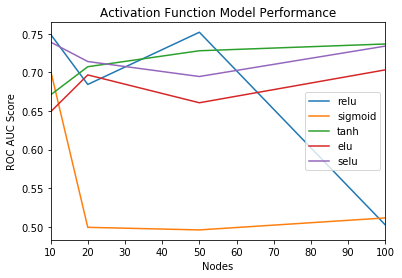

In [4]:
plotActFunction()

Figure 1 - Single Hidden Layer Model. Holding the hidden layer constant, neurons of 10, 20, 50, and 100 were used for different activation functions.

ReLu had a the most varied accuracy for the range of neurons used in the hidden layer. Neurons of 10 and 50 were approximately equal while we saw a decrease in accuracy at 20 neurons and a stark decrease in accuracy when 100 neurons were used. For the sigmoid activation function there was a drastic loss in accuracy after 10 neurons. For tanh there was diminishing returns on accuracy after adding 20 neurons although it did have a constant increase in accuracy as neurons were added. Elu increased its accuracy at 10 neurons from 65% to 70% at 20 neurons. It than dipped to 66% at 50 neurons but then back to 70% at 100 neurons. SeLu experienced a dip in accuracy after 10 neurons and did not recover until 100 neurons were used.

This shows how in one hidden layer that adding neurons is not always a cure to increase accuracy in a neural network and it has various results depending on which activation function is used.

#### 2 Hidden Layer Model

We will now test the same question as before but hold our hidden layers constant at two while we vary the nodes and activation functions.

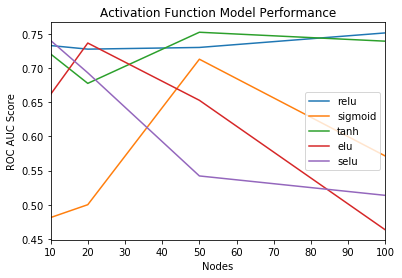

In [6]:
plotActNodeFunction()

Figure 2 - Two Hidden Layer Model. Holding the hidden layer constant, neurons of 10, 20, 50, and 100 were used for different activation functions.

Compared to a one hidden layer model, two hidden layer models seem to be detrimental to accuracy as neurons increase for the majority of activation functions. ReLu had a very constant accuracy as neurons increased. Sigmoid had the most varied response to the different amount of neurons by dramatically increasing its accuracy by 21% from 20 to 50 neurons. Accuracy then dropped almost as drastically once neurons increased to 100. Tanh had a fairly constant accuracy score as well with a slight decrease in accuracy at 20 neurons. Elu increased its accuracy by 7% when neurons increased to 20 from 10, but then lost accuracy thereafter with 50 and 100 neurons. Selu's best accuracy was with 10 neurons and dropped drastically as neurons increased.

Like with one hidden layer neural networks, increasing the amount of neurons is not a sure fire way to increase the accuracy of your model and it is depedent on your activation functions as well. Now we can plot each activation function to compare whether one or two hidden layers, and how many neurons improves the model score.

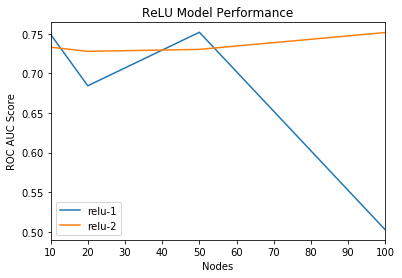

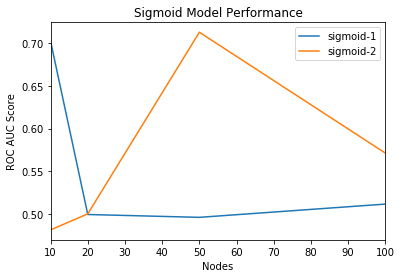

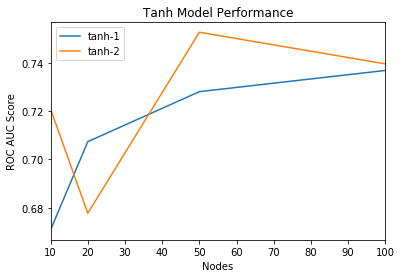

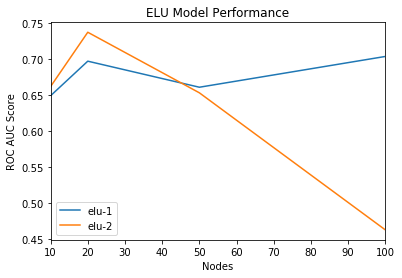

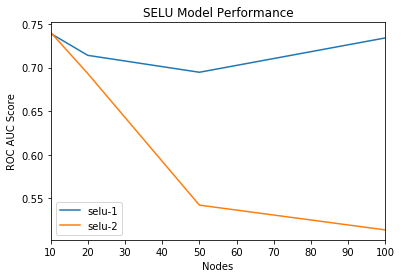

In [9]:
plotRelu()
plotSigmoid()
plotTanh()
plotELU()
plotSELU()

Figure 3 - Comparing 1 and 2 hidden layer neural networks with various neuron amounts.

When we hold constant the amount of neurons and activation functions to compare the effect of increasing the amount of hidden layers from one to two we can see there is not a constant increase in accuracy. ReLu holds a near constant accuracy with two hidden layers, while with one accuracy drastically drops off once it approaches 100 neurons. Sigmoid has by far its best accuracy at 10 neurons for one hidden layer and 50 neurons for two hidden layers. Tanh has a similar accuracy trend with one and two hidden layers except for 20 neurons in the two hidden layer model. Elu's accuracy score for one and two hidden layers are fairly similar until 100 neurons while one hidden layer excels while two hidden layer plummets in accuracy. Lastly, selu showed a massive drop in accuracy with two layers compared to one after neurons increased.

#### Varying Batch Size

Next we wanted to take one of the best models we created so far and varied the batch size to see how that would effect our accuruacy score. The model we chose was a two layer neural network with 100 neurons on each layer, and using ReLu as our activation function. We wanted chose batch sizes of 500, 1000, 10000, and 100000.

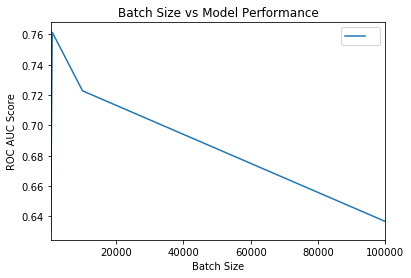

In [11]:
plotBatch()

Figure 4 - Varying batch sizes for our previous best model. Batch sizes used were: 500, 1000, 10000, 100000.

We found our optimal batch size for this model to be 1000, which is 0.0004% of our data that is loaded at a time into our model. It was outperformed our next best batch size by nearly 4%.

#### Altering Kernel Initializers

Since kernel initializers alter how initial weights are created. Whichever creates the best weights initially will give that model a 'head start' in converging to the best possible score that model can yield. We'll be using random_normal, lecun_normal, and glorot_normal.

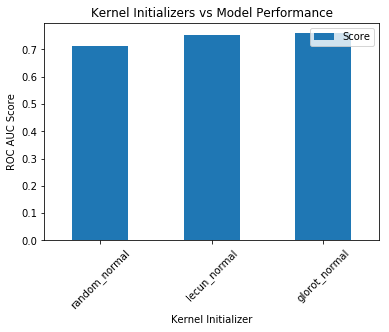

In [13]:
plotKernel()

Figure 5 - Varying Kernel Initializers. Holding all other parameters constant, we tested our models accuracy for random_normal, lecun_normal, and glorot_normal.

The difference in accuracy between lecun_normal (75.25%) and glorot_normal (75.91%) was farily small with a 0.66 difference. Behind those was random_normal with 71.28% accuracy.

#### Using Three Different Optimizers

Our last test will feature optimizers that alter the learning rate as batch sizes complete. We'll be using the best model we've found so far and test out the adaGrad, adaDelta, Adam, and Nadam optimizers.

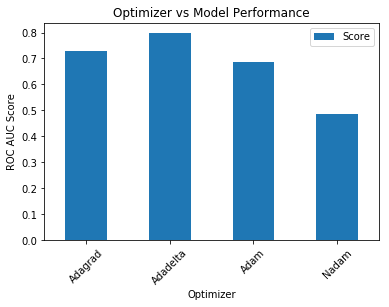

In [15]:
plotOptimizer()

Figure 6 - Varying Optimizers. Holding all other parameters constant, we ran models for the adaGrad, adaDelta, Adam, and Nadam optimizers.

Out of the optimizers we tested adaDelta performed the best (79.82% accuracy) for our data. It was better than the next best optimizer (adaGrad, 73.00% accuracy) by 6.82%. Adam and nAdam produced 68.47% and 48.70% accuracy respectively.

# Results

Using the results that we've gathered so far we will try to build the best model we can. We will be using a two hidden layer neural network with 100 neurons, the ReLu activation function, glorot nomral kernel initializer, a batch size of 1000, and adaDelta as our optimizer for our learning rate. Also now that we've chosen our parameters we will bring in more data (10.5 million rows) and increase our epochs to let our neural network run longer with the most amount of data that we can give it currently.

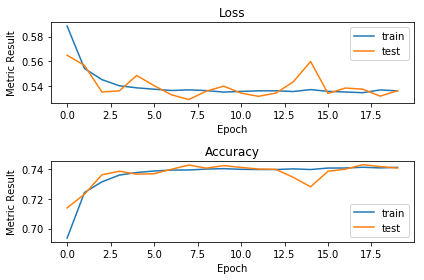

In [5]:
plotMetric(history)

In [11]:
for key, val in bestResult.items():
    print(f"{key}: {val}")

Node: 100
Activation: relu
Initializer: glorot_normal
Optimizer: Adadelta
Batch: 1000
Score: 0.83107673875398


Figure 7 - Building our optimal model.

By loading in more data and increasing our epochs to 20, we found that our optimal model yielded at 83.11% accuracy. Both of these increased our previous highest accuracy by 3.29%.

# Discussion

One of the main questions we wanted to answer was what was the effect of adding more hidden layers and/or neurons to our neural network? We tried to tackle both of these issues by holding hidden layers constant and increasing our neurons, and the inverse as well. We did this for several different activation functions and found that there was not a clear trend across all activation functions that increasing the amount of neurons nor the amount of hidden layers yielded a better model. It seems that changing neuron and hidden layer amounts are also very sensitve to other parameters as well. Further analysis can be conducted by increasing the epochs of the tests we ran and/or increasing the amount of data to validate those results.

Next we wanted to see which parameters gave us the best result and why we think this is true.

- Nodes: 100
- Activation: relu
- Initializer: 'glorot_normal'
- Optimizer: 'Adadelta' 
- Batch: 1000

With a node value of 100, we believe this allowed the model to be sufficiently complex without overly fitting the data. The ReLU function seemed to perform the best across all test cases. Sources suggest this is because of its linear nature it doesn't suffer from the vanishing gradient problem. As well as a sparse matrix which tends to perform better than denser matrices. The glorot_normal matricy initializer randomly selects values from a truncated normal distribution that takes into account the number of input and output nodes which indicates that the value are at least partially correlated with our model. The Adadelta optimizer uses a varying learning rate to calculate the gradient which allows it against its step size as it gets closer to the minima. In addition, Adadelta builds upon Adagrad by limiting the window to which it can look back at previous gradient calculations. This results in a more localized gradient around that input instead of an accumulation of gradient values that are further away from the current input. A batch size of 1000 allowed the weights to be updated more frequently with sufficient amount of data points to calculate the gradient. A smaller value would have resulted in an insufficient amount of data to calculate an accurate gradient, and a larger batch size would prohibit the model from updating more frequently. If we would have increased the number of epochs we might have seen a higher number of points perform better but with our parameters, 1000 was the ideal compromise.

Lastly, how we made our decision that our model was done. We made this decision after altering one parameter at a time while holding all others constant to find ones that seemingly worked best for our model. This led us down a path to find the parameters that we thought would yield the optimal model when all put together in one model. With that we could increase the amount of data fed into our model and the amount of epochs to get the most accuracy we could. Further code should later be implemented to increase the epoch size drastically and stop the model when the accuracy change per epoch becomes neglible or the accuracy begins to decrease. In another real world setting, time contraints can be a major factor when to decide when a neural network model is complete. Training very complex neural networks with enormous amounts of data can be costly in computational time and actual money if using cloud services to help with the computational load. This potentially impacts its return on investment (ROI) to the company by taking so long to fully optimize.

# Sources

- https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network
- https://medium.com/explorations-in-language-and-learning/a-short-note-on-gradient-descent-optimization-algorithms-335546c5a896
- http://ruder.io/optimizing-gradient-descent/
- https://blog.algorithmia.com/introduction-to-optimizers/
- https://datascience.stackexchange.com/questions/37378/what-are-kernel-initializers-and-what-is-their-significance
- https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- https://datascience.stackexchange.com/questions/23493/why-relu-is-better-than-the-other-activation-functions
- https://stats.stackexchange.com/questions/176794/how-does-rectilinear-activation-function-solve-the-vanishing-gradient-problem-in/176905#176905
- https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

# Code

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import multi_gpu_model
from keras.optimizers import SGD
from keras.initializers import random_normal, random_uniform, VarianceScaling, lecun_normal, lecun_uniform
from keras.initializers import glorot_normal, glorot_uniform
from sklearn.metrics import roc_auc_score


#Read in 2.5 Million rows. Split into train and test data set
N=2500000. #Change this line adjust the number of rows.
data=pd.read_csv("HIGGS.csv", nrows=N, header=None)
test_data=pd.read_csv("HIGGS.csv", nrows=500000, header=None, skiprows=10500000)

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

#global functions
def plotMetric(history):
    # plot loss during training
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.xlabel('Epoch')
    pyplot.ylabel('Metric Result')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()

    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.xlabel('Epoch')
    pyplot.ylabel('Metric Result')
    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.tight_layout()
    pyplot.show()

Using TensorFlow backend.


In [3]:
def plotActFunction():
    q1 = pd.DataFrame({
    'relu': [0.7494714761165963, 0.6844046501901166, 0.7520676569834632, 0.5022345157624841],
    'sigmoid': [0.702603151005859, 0.4992187222113161, 0.49587507436517203, 0.5114362046742831],
    'tanh': [0.6708376844572501, 0.7073781358798696, 0.7280739489592952, 0.7368565712655764],
    'elu': [0.6488802924075708, 0.6967709503111617, 0.6606804661843719, 0.7033196371850748],
    'selu': [0.739319745642502, 0.7141225114864298, 0.6946993338631965, 0.734129602507341],
    }, index=[10, 20, 50, 100])
    lines1 = q1.plot.line(title = 'Activation Function Model Performance')
    lines1.set_xlabel("Nodes")
    lines1.set_ylabel("ROC AUC Score")
    
def plotActNodeFunction():
    q1b = pd.DataFrame({
    'relu': [0.7331820375082503, 0.7279145670888859, 0.7303996319364721, 0.7517170416945581],
    'sigmoid': [0.48112367787929267, 0.4999891272367009, 0.713154187089281, 0.5712550765297988],
    'tanh': [0.7208538403453445, 0.6777523198749522, 0.7526727166338352, 0.7395697262052479],
    'elu': [0.6616180458323012, 0.7368514242944441, 0.6529415325334464, 0.4630253523627044],
    'selu': [0.7406490611946785, 0.6932305203868041, 0.5421163972915666, 0.5136491201753131],
    }, index=[10, 20, 50, 100])
    lines2 = q1b.plot.line(title = 'Activation Function Model Performance')
    lines2.set_xlabel("Nodes")
    lines2.set_ylabel("ROC AUC Score")

def plotRelu():
    q2relu = pd.DataFrame({
        'relu-1': [0.7494714761165963, 0.6844046501901166, 0.7520676569834632, 0.5022345157624841],
        'relu-2': [0.7331820375082503, 0.7279145670888859, 0.7303996319364721, 0.7517170416945581],
        }, index=[10, 20, 50, 100])
    ax = q2relu.plot.line(title = 'ReLU Model Performance')
    ax.set_xlabel("Nodes")
    ax.set_ylabel("ROC AUC Score")

def plotSigmoid():
    q2sigmoid = pd.DataFrame({
    'sigmoid-1': [0.702603151005859, 0.4992187222113161, 0.49587507436517203, 0.5114362046742831],
    'sigmoid-2': [0.48112367787929267, 0.4999891272367009, 0.713154187089281, 0.5712550765297988],
    }, index=[10, 20, 50, 100])
    ax = q2sigmoid.plot.line(title = 'Sigmoid Model Performance')
    ax.set_xlabel("Nodes")
    ax.set_ylabel("ROC AUC Score")

def plotTanh():
    q2tanh = pd.DataFrame({
    'tanh-1': [0.6708376844572501, 0.7073781358798696, 0.7280739489592952, 0.7368565712655764],
    'tanh-2': [0.7208538403453445, 0.6777523198749522, 0.7526727166338352, 0.7395697262052479],
    }, index=[10, 20, 50, 100])
    ax = q2tanh.plot.line(title = 'Tanh Model Performance')
    ax.set_xlabel("Nodes")
    ax.set_ylabel("ROC AUC Score")

def plotELU():
    q2elu = pd.DataFrame({
    'elu-1': [0.6488802924075708, 0.6967709503111617, 0.6606804661843719, 0.7033196371850748],
    'elu-2': [0.6616180458323012, 0.7368514242944441, 0.6529415325334464, 0.4630253523627044],
    }, index=[10, 20, 50, 100])
    ax = q2elu.plot.line(title = 'ELU Model Performance')
    ax.set_xlabel("Nodes")
    ax.set_ylabel("ROC AUC Score")

def plotSELU():
    q2selu = pd.DataFrame({
    'selu-1': [0.739319745642502, 0.7141225114864298, 0.6946993338631965, 0.734129602507341],
    'selu-2': [0.7406490611946785, 0.6932305203868041, 0.5421163972915666, 0.5136491201753131],
    }, index=[10, 20, 50, 100])
    ax = q2selu.plot.line(title = 'SELU Model Performance')
    ax.set_xlabel("Nodes")
    ax.set_ylabel("ROC AUC Score")
    
def plotBatch():
    q3 = pd.DataFrame({
    ' ': [0.631143945362551, 0.7614658650320869, 0.7228425873031199, 0.6366954934942467],
    }, index=[500, 1000, 10000, 100000])
    ax = q3.plot.line(title='Batch Size vs Model Performance')
    ax.set_xlabel("Batch Size")
    ax.set_ylabel("ROC AUC Score")
    
def plotKernel():
    q4 = pd.DataFrame({
    'Score': [0.7128371162649332, 0.7524838324457825, 0.7591295447725338],
    'Kernel_Initializers': ['random_normal', 'lecun_normal', 'glorot_normal']})

    ax = q4.plot.bar(x='Kernel_Initializers', y='Score', rot=45, title='Kernel Initializers vs Model Performance')
    ax.set_xlabel("Kernel Initializer")
    ax.set_ylabel("ROC AUC Score")
    
def plotOptimizer():
    q5 = pd.DataFrame({
    'Score': [0.7299848975104806, 0.7981572106570257, 0.6846821732954556, 0.48695086234710605],
    'Optimizer': ['Adagrad', 'Adadelta', 'Adam', 'Nadam']})

    ax = q5.plot.bar(x='Optimizer', y='Score', rot=45, title='Optimizer vs Model Performance')
    ax.set_xlabel("Optimizer")
    ax.set_ylabel("ROC AUC Score")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6737 - acc: 0.5882 - val_loss: 0.6438 - val_acc: 0.6289
Epoch 2/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6243 - acc: 0.6508 - val_loss: 0.6054 - val_acc: 0.6711
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6103 - acc: 0.6685 - val_loss: 0.5966 - val_acc: 0.6814
Epoch 4/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6110 - acc: 0.6683 - val_loss: 0.6165 - val_acc: 0.6652
Epoch 5/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6194 - acc: 0.6642 - val_loss: 0.5984 - val_acc: 0.6765


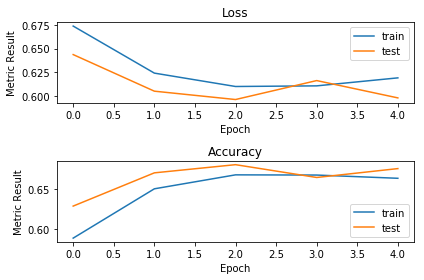

Nodes: 10
Activation: relu
Score: 0.7494714761165963
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6685 - acc: 0.5998 - val_loss: 0.6504 - val_acc: 0.6217
Epoch 2/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6446 - acc: 0.6283 - val_loss: 0.6251 - val_acc: 0.6511
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6236 - acc: 0.6538 - val_loss: 0.6275 - val_acc: 0.6584
Epoch 4/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6114 - acc: 0.6663 - val_loss: 0.6025 - val_acc: 0.6746
Epoch 5/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6359 - acc: 0.6435 - val_loss: 0.6470 - val_acc: 0.6395


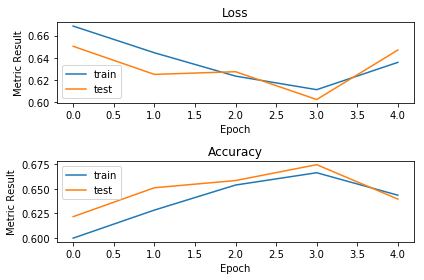

Nodes: 20
Activation: relu
Score: 0.6844046501901166
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6870 - acc: 0.6225 - val_loss: 0.6555 - val_acc: 0.6133
Epoch 2/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.7604 - acc: 0.6261 - val_loss: 0.6289 - val_acc: 0.6487
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6323 - acc: 0.6541 - val_loss: 0.7616 - val_acc: 0.5805
Epoch 4/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6145 - acc: 0.6641 - val_loss: 0.6021 - val_acc: 0.6749
Epoch 5/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6090 - acc: 0.6706 - val_loss: 0.5958 - val_acc: 0.6809


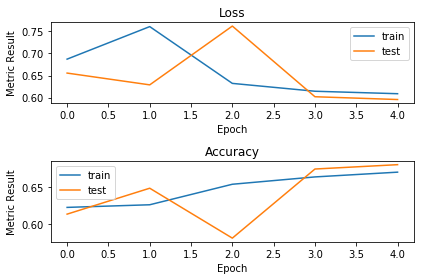

Nodes: 50
Activation: relu
Score: 0.7520676569834632
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.7054 - acc: 0.6333 - val_loss: 7.9250 - val_acc: 0.1243
Epoch 2/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 7.4923 - acc: 0.0021 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 9s 4us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


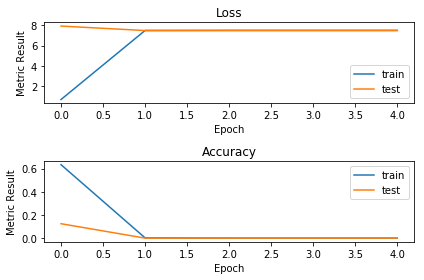

Nodes: 100
Activation: relu
Score: 0.5022345157624841
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6556 - acc: 0.6119 - val_loss: 0.6444 - val_acc: 0.6323
Epoch 2/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6562 - acc: 0.6204 - val_loss: 0.6474 - val_acc: 0.6262
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6429 - acc: 0.6311 - val_loss: 0.6421 - val_acc: 0.6338
Epoch 4/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6422 - acc: 0.6333 - val_loss: 0.6410 - val_acc: 0.6365
Epoch 5/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6392 - acc: 0.6378 - val_loss: 0.6318 - val_acc: 0.6464


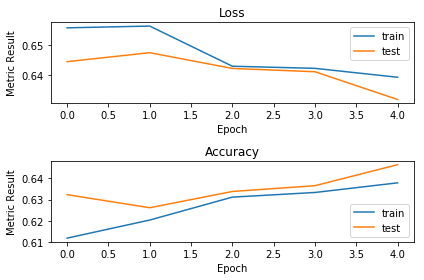

Nodes: 10
Activation: sigmoid
Score: 0.702603151005859
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


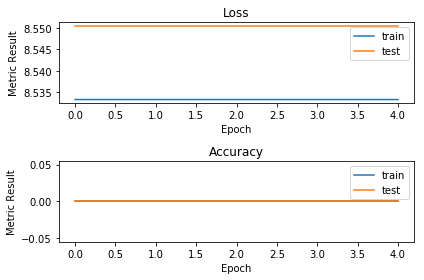

Nodes: 20
Activation: sigmoid
Score: 0.4992187222113161
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


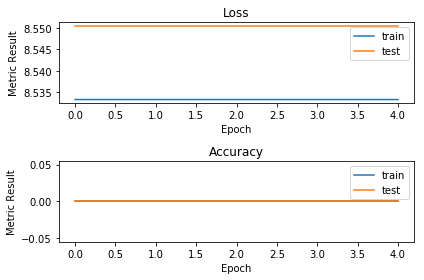

Nodes: 50
Activation: sigmoid
Score: 0.49587507436517203
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 8.5334 - acc: 0.4295 - val_loss: 8.5504 - val_acc: 0.4284
Epoch 2/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.4295 - val_loss: 8.5504 - val_acc: 0.4284
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.4295 - val_loss: 8.5504 - val_acc: 0.4284
Epoch 4/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.4295 - val_loss: 8.5504 - val_acc: 0.4284
Epoch 5/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 8.5334 - acc: 0.4295 - val_loss: 8.5504 - val_acc: 0.4284


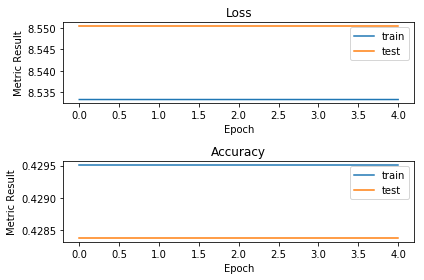

Nodes: 100
Activation: sigmoid
Score: 0.5114362046742831
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6711 - acc: 0.6058 - val_loss: 0.6466 - val_acc: 0.6297
Epoch 2/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6517 - acc: 0.6224 - val_loss: 0.6435 - val_acc: 0.6338
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6490 - acc: 0.6287 - val_loss: 0.6457 - val_acc: 0.6299
Epoch 4/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6397 - acc: 0.6386 - val_loss: 0.6365 - val_acc: 0.6446
Epoch 5/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6345 - acc: 0.6467 - val_loss: 0.6481 - val_acc: 0.6227


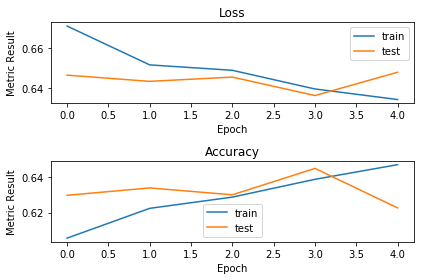

Nodes: 10
Activation: tanh
Score: 0.6708376844572501
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6608 - acc: 0.6133 - val_loss: 0.6437 - val_acc: 0.6375
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6456 - acc: 0.6338 - val_loss: 0.6379 - val_acc: 0.6445
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6594 - acc: 0.6372 - val_loss: 0.7058 - val_acc: 0.5543
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6518 - acc: 0.6231 - val_loss: 0.6381 - val_acc: 0.6421
Epoch 5/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6347 - acc: 0.6482 - val_loss: 0.6306 - val_acc: 0.6516


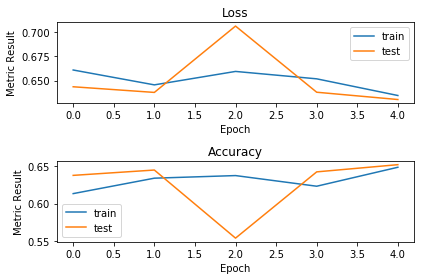

Nodes: 20
Activation: tanh
Score: 0.7073781358798696
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6484 - acc: 0.6271 - val_loss: 0.6347 - val_acc: 0.6502
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6404 - acc: 0.6444 - val_loss: 0.6233 - val_acc: 0.6544
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6137 - acc: 0.6677 - val_loss: 0.6020 - val_acc: 0.6789
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6035 - acc: 0.6773 - val_loss: 0.5956 - val_acc: 0.6842
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6266 - acc: 0.6637 - val_loss: 0.6160 - val_acc: 0.6620


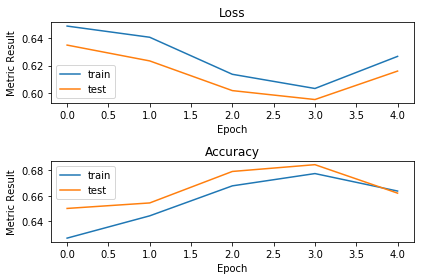

Nodes: 50
Activation: tanh
Score: 0.7280739489592952
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6568 - acc: 0.6205 - val_loss: 0.6387 - val_acc: 0.6411
Epoch 2/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.7348 - acc: 0.6260 - val_loss: 0.6373 - val_acc: 0.6454
Epoch 3/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.7417 - acc: 0.6226 - val_loss: 0.6332 - val_acc: 0.6479
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6389 - acc: 0.6441 - val_loss: 0.6318 - val_acc: 0.6472
Epoch 5/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6257 - acc: 0.6565 - val_loss: 0.6100 - val_acc: 0.6684


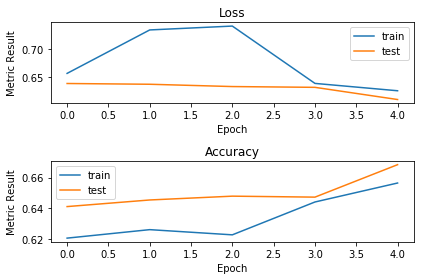

Nodes: 100
Activation: tanh
Score: 0.7368565712655764
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.7773 - acc: 0.5592 - val_loss: 0.6714 - val_acc: 0.5891
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6582 - acc: 0.6092 - val_loss: 0.6495 - val_acc: 0.6211
Epoch 3/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6524 - acc: 0.6222 - val_loss: 0.6460 - val_acc: 0.6302
Epoch 4/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6501 - acc: 0.6254 - val_loss: 0.6457 - val_acc: 0.6306
Epoch 5/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6484 - acc: 0.6291 - val_loss: 0.6580 - val_acc: 0.6006


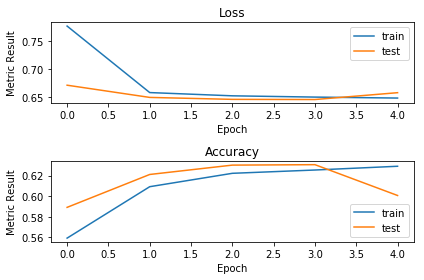

Nodes: 10
Activation: elu
Score: 0.6488802924075708
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6860 - acc: 0.5814 - val_loss: 0.6492 - val_acc: 0.6241
Epoch 2/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6774 - acc: 0.6128 - val_loss: 0.6550 - val_acc: 0.6205
Epoch 3/5
2250000/2250000 [==============================] - 10s 4us/step - loss: 0.6520 - acc: 0.6255 - val_loss: 0.6630 - val_acc: 0.6158
Epoch 4/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6603 - acc: 0.6267 - val_loss: 0.6416 - val_acc: 0.6349
Epoch 5/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6413 - acc: 0.6396 - val_loss: 0.6356 - val_acc: 0.6433


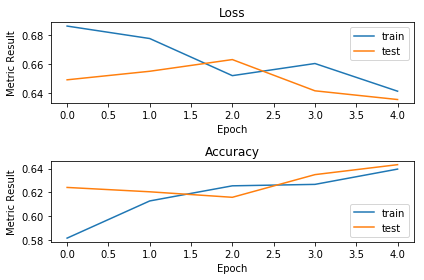

Nodes: 20
Activation: elu
Score: 0.6967709503111617
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6573 - acc: 0.6206 - val_loss: 0.6550 - val_acc: 0.6265
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6544 - acc: 0.6283 - val_loss: 0.6418 - val_acc: 0.6424
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6463 - acc: 0.6396 - val_loss: 0.6383 - val_acc: 0.6469
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 2.3652 - acc: 0.4518 - val_loss: 0.7113 - val_acc: 0.5420
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6789 - acc: 0.5789 - val_loss: 0.6534 - val_acc: 0.6207


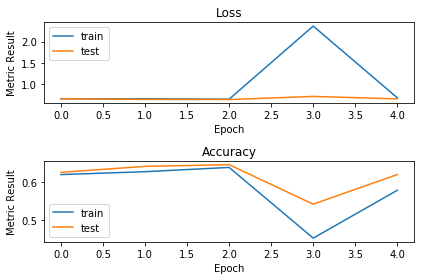

Nodes: 50
Activation: elu
Score: 0.6606804661843719
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6711 - acc: 0.6153 - val_loss: 0.6430 - val_acc: 0.6381
Epoch 2/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.8102 - acc: 0.6040 - val_loss: 0.6631 - val_acc: 0.6083
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6411 - acc: 0.6388 - val_loss: 0.6373 - val_acc: 0.6430
Epoch 4/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6590 - acc: 0.6339 - val_loss: 0.6373 - val_acc: 0.6427
Epoch 5/5
2250000/2250000 [==============================] - 10s 5us/step - loss: 0.6448 - acc: 0.6404 - val_loss: 0.6320 - val_acc: 0.6493


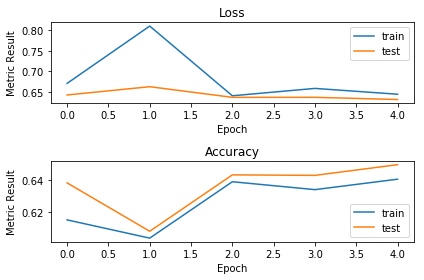

Nodes: 100
Activation: elu
Score: 0.7033196371850748
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6608 - acc: 0.6118 - val_loss: 0.6328 - val_acc: 0.6512
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6583 - acc: 0.6320 - val_loss: 0.6384 - val_acc: 0.6417
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6296 - acc: 0.6491 - val_loss: 0.6228 - val_acc: 0.6547
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6192 - acc: 0.6627 - val_loss: 0.6179 - val_acc: 0.6699
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6175 - acc: 0.6662 - val_loss: 0.6105 - val_acc: 0.6721


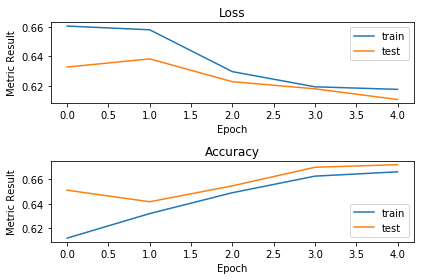

Nodes: 10
Activation: selu
Score: 0.739319745642502
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6733 - acc: 0.6114 - val_loss: 0.6426 - val_acc: 0.6358
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6393 - acc: 0.6416 - val_loss: 0.6258 - val_acc: 0.6537
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6283 - acc: 0.6587 - val_loss: 0.6171 - val_acc: 0.6644
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6159 - acc: 0.6680 - val_loss: 0.6070 - val_acc: 0.6707
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6386 - acc: 0.6460 - val_loss: 0.6275 - val_acc: 0.6568


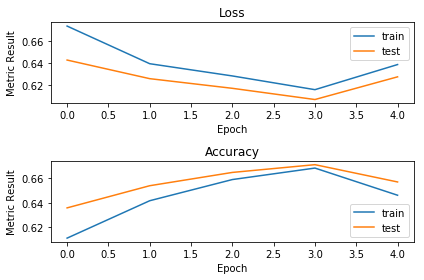

Nodes: 20
Activation: selu
Score: 0.7141225114864298
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 1.5634 - acc: 0.5323 - val_loss: 0.6497 - val_acc: 0.6271
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 1.4876 - acc: 0.5397 - val_loss: 0.6640 - val_acc: 0.5951
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.7193 - acc: 0.6088 - val_loss: 0.6467 - val_acc: 0.6293
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.7362 - acc: 0.6045 - val_loss: 0.6500 - val_acc: 0.6276
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6471 - acc: 0.6318 - val_loss: 0.6427 - val_acc: 0.6418


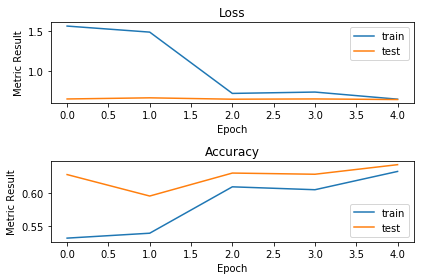

Nodes: 50
Activation: selu
Score: 0.6946993338631965
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.7847 - acc: 0.5591 - val_loss: 0.6557 - val_acc: 0.6145
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6594 - acc: 0.6166 - val_loss: 0.6474 - val_acc: 0.6260
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6487 - acc: 0.6281 - val_loss: 0.6407 - val_acc: 0.6398
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6515 - acc: 0.6372 - val_loss: 0.6303 - val_acc: 0.6516
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6353 - acc: 0.6486 - val_loss: 0.6114 - val_acc: 0.6687


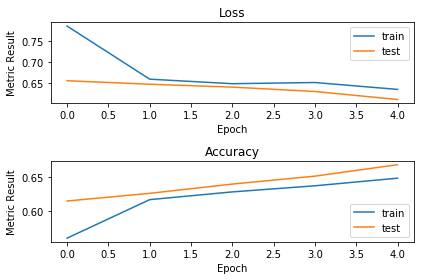

Nodes: 100
Activation: selu
Score: 0.734129602507341
{'Node': 50, 'Activation': 'relu', 'Score': 0.7520676569834632}



In [12]:
bestResult = {}
bestScore = -1

nodes = [10, 20, 50, 100]
activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']

for activate in activation:
    for node in nodes:
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))
        
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

        history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
        plotMetric(history)
        
        score = roc_auc_score(y_test,model.predict(x_test))
        
        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")
        
        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Score'] = score
            
            bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.7447 - acc: 0.5164 - val_loss: 0.6799 - val_acc: 0.5773
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6676 - acc: 0.5965 - val_loss: 0.6870 - val_acc: 0.5423
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6486 - acc: 0.6253 - val_loss: 0.6437 - val_acc: 0.6270
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6295 - acc: 0.6448 - val_loss: 0.6186 - val_acc: 0.6562
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6145 - acc: 0.6629 - val_loss: 0.6106 - val_acc: 0.6675


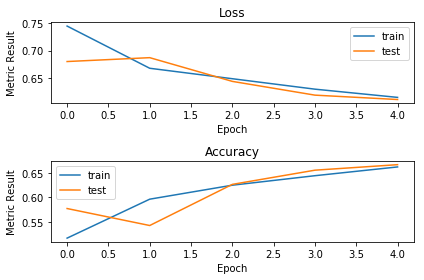

Nodes: 10
Activation: relu
Score: 0.7331820375082503
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6621 - acc: 0.6054 - val_loss: 0.6392 - val_acc: 0.6358
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6217 - acc: 0.6554 - val_loss: 0.6096 - val_acc: 0.6704
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6147 - acc: 0.6625 - val_loss: 0.5985 - val_acc: 0.6749
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6064 - acc: 0.6720 - val_loss: 0.5887 - val_acc: 0.6866
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6022 - acc: 0.6742 - val_loss: 0.6151 - val_acc: 0.6632


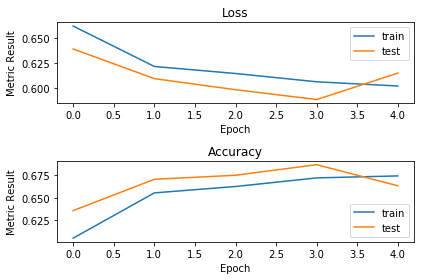

Nodes: 20
Activation: relu
Score: 0.7279145670888859
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6376 - acc: 0.6392 - val_loss: 0.6141 - val_acc: 0.6648
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6100 - acc: 0.6693 - val_loss: 0.6177 - val_acc: 0.6589
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.5971 - acc: 0.6806 - val_loss: 0.5845 - val_acc: 0.6914
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6761 - acc: 0.6165 - val_loss: 0.6301 - val_acc: 0.6483
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6368 - acc: 0.6505 - val_loss: 0.6145 - val_acc: 0.6675


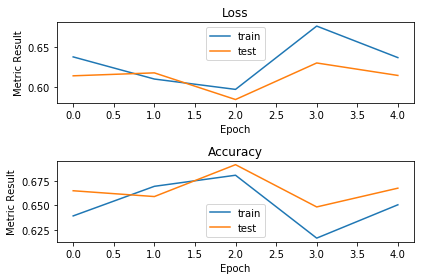

Nodes: 50
Activation: relu
Score: 0.7303996319364721
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6491 - acc: 0.6341 - val_loss: 0.6109 - val_acc: 0.6671
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6247 - acc: 0.6584 - val_loss: 0.6524 - val_acc: 0.6199
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6212 - acc: 0.6611 - val_loss: 0.6216 - val_acc: 0.6629
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6181 - acc: 0.6639 - val_loss: 0.5942 - val_acc: 0.6830
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6237 - acc: 0.6575 - val_loss: 0.5960 - val_acc: 0.6801


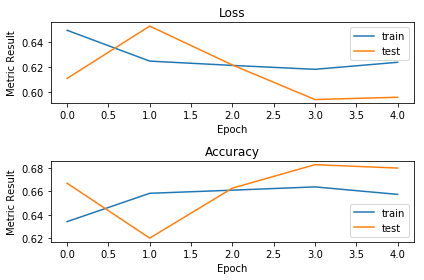

Nodes: 100
Activation: relu
Score: 0.7517170416945581
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 7.5020 - acc: 0.5294 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 0.5294 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 0.5294 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 0.5294 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 0.5294 - val_loss: 7.4852 - val_acc: 0.5305


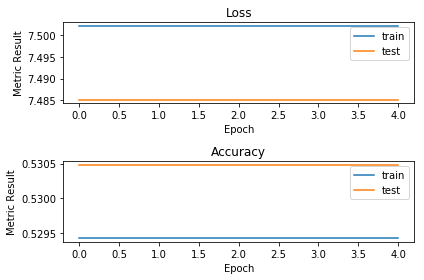

Nodes: 10
Activation: sigmoid
Score: 0.48112367787929267
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


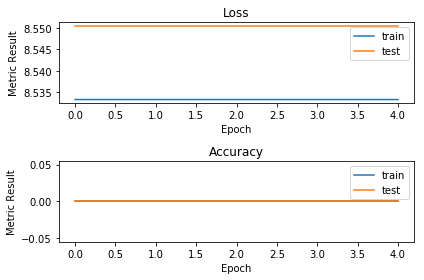

Nodes: 20
Activation: sigmoid
Score: 0.4999891272367009
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6623 - acc: 0.5990 - val_loss: 0.6482 - val_acc: 0.6230
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6587 - acc: 0.6190 - val_loss: 0.6441 - val_acc: 0.6263
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6384 - acc: 0.6339 - val_loss: 0.6272 - val_acc: 0.6502
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6267 - acc: 0.6533 - val_loss: 0.6149 - val_acc: 0.6583
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6432 - acc: 0.6454 - val_loss: 0.6246 - val_acc: 0.6532


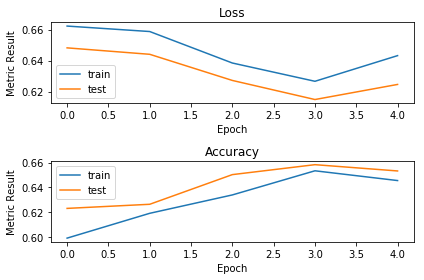

Nodes: 50
Activation: sigmoid
Score: 0.713154187089281
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 5.3945 - acc: 0.2418 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


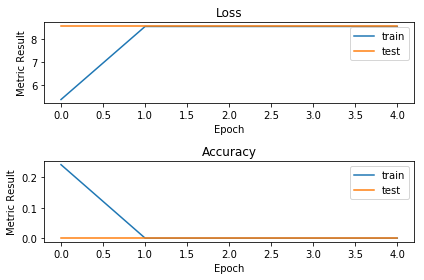

Nodes: 100
Activation: sigmoid
Score: 0.5712550765297988
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6779 - acc: 0.5889 - val_loss: 0.6526 - val_acc: 0.6225
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6437 - acc: 0.6304 - val_loss: 0.6387 - val_acc: 0.6380
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6305 - acc: 0.6451 - val_loss: 0.6212 - val_acc: 0.6523
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6371 - acc: 0.6368 - val_loss: 0.6804 - val_acc: 0.5790
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6405 - acc: 0.6348 - val_loss: 0.6199 - val_acc: 0.6586


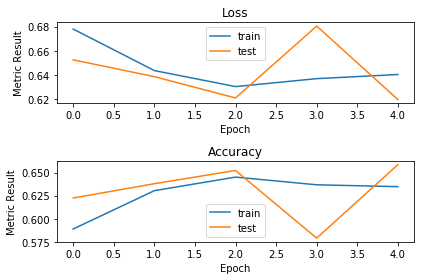

Nodes: 10
Activation: tanh
Score: 0.7208538403453445
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6575 - acc: 0.6128 - val_loss: 0.6367 - val_acc: 0.6430
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6457 - acc: 0.6325 - val_loss: 0.6141 - val_acc: 0.6608
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6465 - acc: 0.6304 - val_loss: 0.6569 - val_acc: 0.6148
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6354 - acc: 0.6364 - val_loss: 0.6108 - val_acc: 0.6614
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6107 - acc: 0.6682 - val_loss: 0.6485 - val_acc: 0.6395


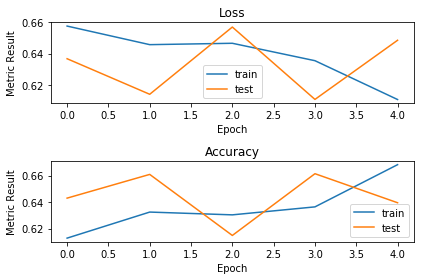

Nodes: 20
Activation: tanh
Score: 0.6777523198749522
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.7086 - acc: 0.6002 - val_loss: 0.6636 - val_acc: 0.6144
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6481 - acc: 0.6296 - val_loss: 0.6718 - val_acc: 0.5913
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6600 - acc: 0.6198 - val_loss: 0.6655 - val_acc: 0.5998
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6268 - acc: 0.6515 - val_loss: 0.6031 - val_acc: 0.6725
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6014 - acc: 0.6754 - val_loss: 0.5931 - val_acc: 0.6827


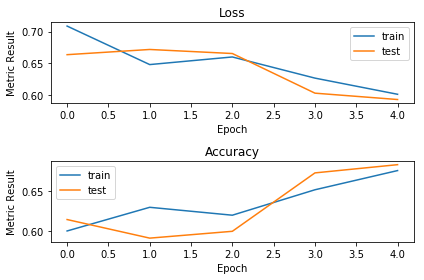

Nodes: 50
Activation: tanh
Score: 0.7526727166338352
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6651 - acc: 0.6144 - val_loss: 0.6452 - val_acc: 0.6330
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6462 - acc: 0.6355 - val_loss: 0.6106 - val_acc: 0.6640
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6525 - acc: 0.6304 - val_loss: 0.6183 - val_acc: 0.6525
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6213 - acc: 0.6609 - val_loss: 0.6080 - val_acc: 0.6746
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.7183 - acc: 0.6407 - val_loss: 0.6135 - val_acc: 0.6556


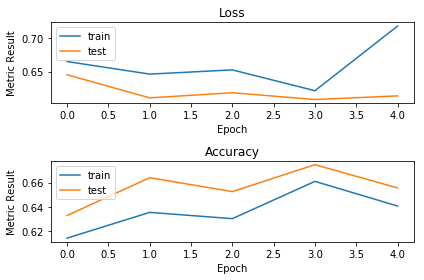

Nodes: 100
Activation: tanh
Score: 0.7395697262052479
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6835 - acc: 0.5844 - val_loss: 0.6648 - val_acc: 0.5992
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6773 - acc: 0.6163 - val_loss: 0.6743 - val_acc: 0.5889
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6544 - acc: 0.6195 - val_loss: 0.6446 - val_acc: 0.6315
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6541 - acc: 0.6247 - val_loss: 0.6414 - val_acc: 0.6364
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6511 - acc: 0.6340 - val_loss: 0.6572 - val_acc: 0.6162


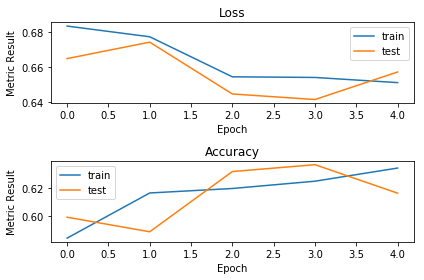

Nodes: 10
Activation: elu
Score: 0.6616180458323012
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6770 - acc: 0.5967 - val_loss: 0.6551 - val_acc: 0.6164
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6462 - acc: 0.6310 - val_loss: 0.6533 - val_acc: 0.6169
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6400 - acc: 0.6389 - val_loss: 0.6359 - val_acc: 0.6428
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6283 - acc: 0.6486 - val_loss: 0.6356 - val_acc: 0.6357
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6129 - acc: 0.6639 - val_loss: 0.6091 - val_acc: 0.6718


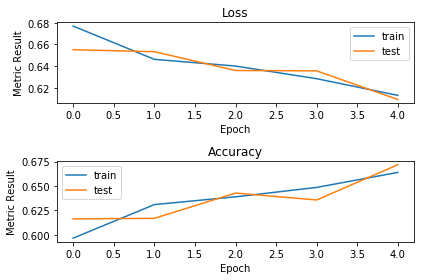

Nodes: 20
Activation: elu
Score: 0.7368514242944441
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 15s 6us/step - loss: 0.6622 - acc: 0.6124 - val_loss: 0.6437 - val_acc: 0.6345
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6471 - acc: 0.6309 - val_loss: 0.6378 - val_acc: 0.6427
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6441 - acc: 0.6398 - val_loss: 0.6327 - val_acc: 0.6426
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 1.3146 - acc: 0.5731 - val_loss: 7.4466 - val_acc: 0.0053
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 2.2973 - acc: 0.4506 - val_loss: 0.6590 - val_acc: 0.6172


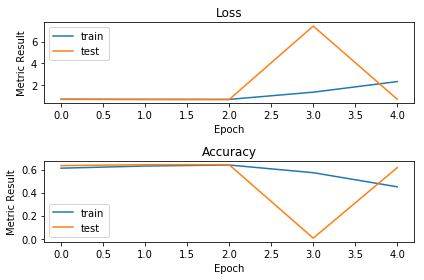

Nodes: 50
Activation: elu
Score: 0.6529415325334464
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6638 - acc: 0.6251 - val_loss: 0.6366 - val_acc: 0.6455
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 5.9646 - acc: 0.2084 - val_loss: 8.5504 - val_acc: 2.8000e-05
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 7.9140 - acc: 0.0012 - val_loss: 7.4850 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4850 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4850 - val_acc: 0.0000e+00


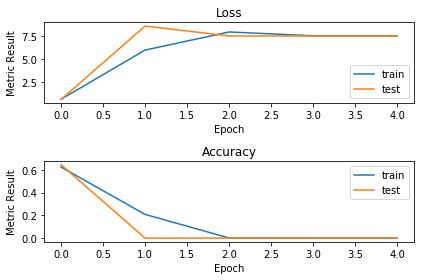

Nodes: 100
Activation: elu
Score: 0.4630253523627044
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6740 - acc: 0.6085 - val_loss: 0.6425 - val_acc: 0.6336
Epoch 2/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6516 - acc: 0.6237 - val_loss: 0.6357 - val_acc: 0.6430
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6281 - acc: 0.6491 - val_loss: 0.6136 - val_acc: 0.6636
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6098 - acc: 0.6722 - val_loss: 0.7566 - val_acc: 0.5504
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6259 - acc: 0.6502 - val_loss: 0.6054 - val_acc: 0.6705


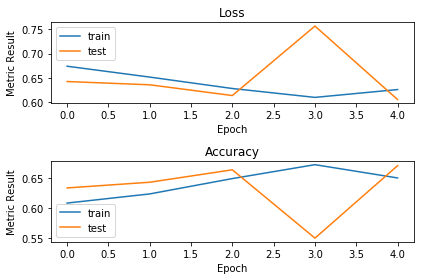

Nodes: 10
Activation: selu
Score: 0.7406490611946785
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.7108 - acc: 0.5225 - val_loss: 0.6737 - val_acc: 0.5827
Epoch 2/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6560 - acc: 0.6115 - val_loss: 0.6528 - val_acc: 0.6192
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6545 - acc: 0.6198 - val_loss: 1.0022 - val_acc: 0.5478
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6756 - acc: 0.6144 - val_loss: 0.6432 - val_acc: 0.6348
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6423 - acc: 0.6360 - val_loss: 0.6363 - val_acc: 0.6407


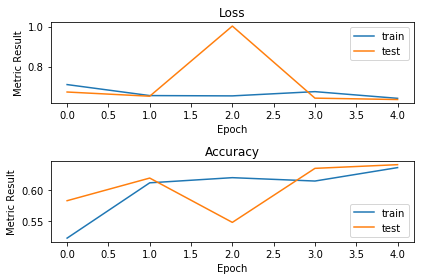

Nodes: 20
Activation: selu
Score: 0.6932305203868041
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6793 - acc: 0.6152 - val_loss: 0.7920 - val_acc: 0.4659
Epoch 2/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6419 - acc: 0.6387 - val_loss: 0.6180 - val_acc: 0.6651
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6247 - acc: 0.6593 - val_loss: 0.6398 - val_acc: 0.6410
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6298 - acc: 0.6510 - val_loss: 0.6026 - val_acc: 0.6745
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 5.8534 - acc: 0.1847 - val_loss: 1.2999 - val_acc: 0.5418


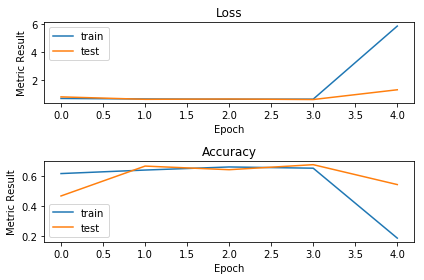

Nodes: 50
Activation: selu
Score: 0.5421163972915666
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 4.3258 - acc: 0.3234 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00


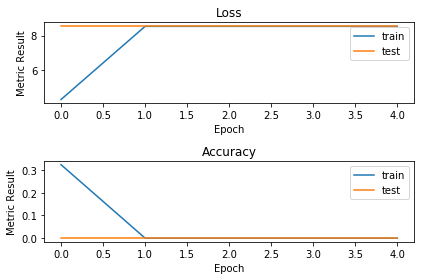

Nodes: 100
Activation: selu
Score: 0.5136491201753131
{'Node': 50, 'Activation': 'tanh', 'Score': 0.7526727166338352}



In [13]:
bestResult = {}
bestScore = -1

nodes = [10, 20, 50, 100]
activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']

for activate in activation:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))
            
            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)

            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6639 - acc: 0.6279 - val_loss: 0.6239 - val_acc: 0.6595
Epoch 2/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6137 - acc: 0.6642 - val_loss: 0.6294 - val_acc: 0.6530
Epoch 3/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.5989 - acc: 0.6796 - val_loss: 0.5862 - val_acc: 0.6943
Epoch 4/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6088 - acc: 0.6712 - val_loss: 0.5837 - val_acc: 0.6945
Epoch 5/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6107 - acc: 0.6683 - val_loss: 1.4489 - val_acc: 0.5381


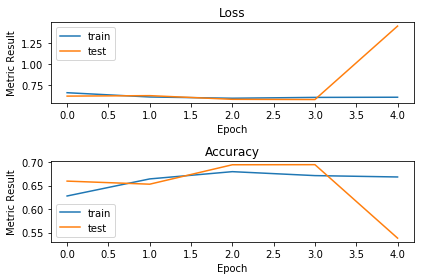

Nodes: 100
Activation: relu
Score: 0.631143945362551
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6090 - acc: 0.6661 - val_loss: 0.5869 - val_acc: 0.6909
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6489 - acc: 0.6394 - val_loss: 0.6692 - val_acc: 0.6086
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6078 - acc: 0.6734 - val_loss: 0.5952 - val_acc: 0.6817
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6409 - acc: 0.6507 - val_loss: 0.6481 - val_acc: 0.6279
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6118 - acc: 0.6687 - val_loss: 0.5862 - val_acc: 0.6899


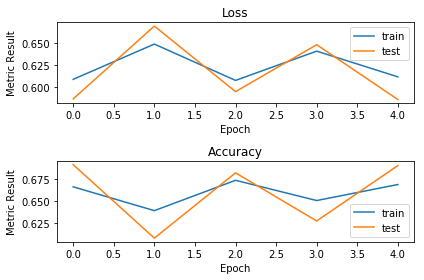

Nodes: 100
Activation: relu
Score: 0.7614658650320869
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 4s 2us/step - loss: 0.6669 - acc: 0.5967 - val_loss: 0.6340 - val_acc: 0.6418
Epoch 2/5
2250000/2250000 [==============================] - 3s 1us/step - loss: 0.6287 - acc: 0.6459 - val_loss: 0.6051 - val_acc: 0.6700
Epoch 3/5
2250000/2250000 [==============================] - 3s 1us/step - loss: 0.5999 - acc: 0.6755 - val_loss: 0.5911 - val_acc: 0.6824
Epoch 4/5
2250000/2250000 [==============================] - 3s 1us/step - loss: 0.6642 - acc: 0.6180 - val_loss: 0.6417 - val_acc: 0.6327
Epoch 5/5
2250000/2250000 [==============================] - 3s 1us/step - loss: 0.6325 - acc: 0.6433 - val_loss: 0.6169 - val_acc: 0.6588


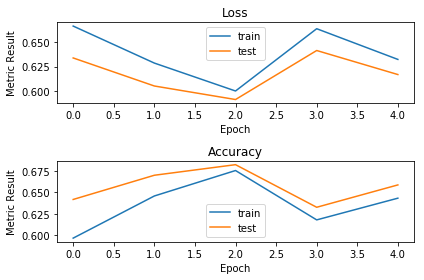

Nodes: 100
Activation: relu
Score: 0.7228425873031199
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 3s 1us/step - loss: 1.0047 - acc: 0.4887 - val_loss: 0.7357 - val_acc: 0.4663
Epoch 2/5
2250000/2250000 [==============================] - 2s 1us/step - loss: 0.7155 - acc: 0.4899 - val_loss: 0.7031 - val_acc: 0.5008
Epoch 3/5
2250000/2250000 [==============================] - 2s 1us/step - loss: 0.6969 - acc: 0.5184 - val_loss: 0.6887 - val_acc: 0.5399
Epoch 4/5
2250000/2250000 [==============================] - 2s 1us/step - loss: 0.6801 - acc: 0.5641 - val_loss: 0.6702 - val_acc: 0.5908
Epoch 5/5
2250000/2250000 [==============================] - 2s 1us/step - loss: 0.6656 - acc: 0.5958 - val_loss: 0.6628 - val_acc: 0.5999


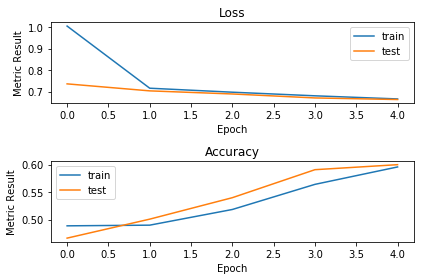

Nodes: 100
Activation: relu
Score: 0.6366954934942467
{'Node': 100, 'Activation': 'relu', 'Optimization': 'Adam', 'Batch': 1000, 'Score': 0.7614658650320869}



In [2]:
bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
optimize = 'Adam'
batchSize = [500, 1000, 10000, 100000]


for size in batchSize:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
        model.add(Dense(node, activation=activate))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=size, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Optimization'] = optimize
            bestResult['Batch'] = size
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.7265 - acc: 0.5987 - val_loss: 0.6356 - val_acc: 0.6452
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6146 - acc: 0.6636 - val_loss: 0.6021 - val_acc: 0.6746
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6178 - acc: 0.6630 - val_loss: 0.6094 - val_acc: 0.6752
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.5921 - acc: 0.6863 - val_loss: 0.5939 - val_acc: 0.6899
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6205 - acc: 0.6620 - val_loss: 0.6334 - val_acc: 0.6543


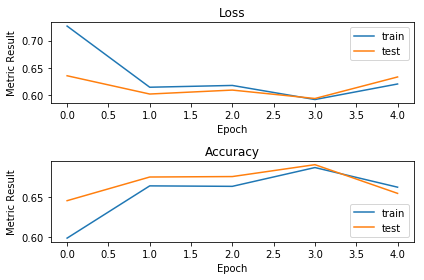

Nodes: 100
Activation: relu
Score: 0.7128371162649332
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.7043 - acc: 0.6065 - val_loss: 0.6826 - val_acc: 0.5713
Epoch 2/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6437 - acc: 0.6320 - val_loss: 0.6132 - val_acc: 0.6671
Epoch 3/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6101 - acc: 0.6700 - val_loss: 0.6064 - val_acc: 0.6711
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6251 - acc: 0.6628 - val_loss: 0.6216 - val_acc: 0.6577
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6211 - acc: 0.6629 - val_loss: 0.5979 - val_acc: 0.6833


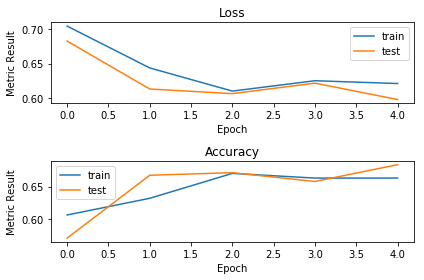

Nodes: 100
Activation: relu
Score: 0.7524838324457825
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6450 - acc: 0.6370 - val_loss: 0.6064 - val_acc: 0.6743
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6458 - acc: 0.6416 - val_loss: 0.6049 - val_acc: 0.6780
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6080 - acc: 0.6738 - val_loss: 0.5833 - val_acc: 0.6920
Epoch 4/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6434 - acc: 0.6454 - val_loss: 0.6190 - val_acc: 0.6700
Epoch 5/5
2250000/2250000 [==============================] - 11s 5us/step - loss: 0.6100 - acc: 0.6705 - val_loss: 0.5904 - val_acc: 0.6874


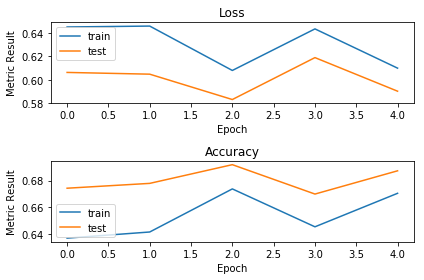

Nodes: 100
Activation: relu
Score: 0.7591295447725338
{'Node': 100, 'Activation': 'relu', 'Initializer': 'glorot_normal', 'Batch': 1000, 'Score': 0.7591295447725338}



In [5]:
initializers = ['random_normal', 'lecun_normal', 'glorot_normal']

bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
optimize = 'Adam'
size = 1000
initializers = ['random_normal', 'lecun_normal', 'glorot_normal']


for initiate in initializers:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
        model.add(Dense(node, activation=activate))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=size, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Initializer'] = initiate
            bestResult['Batch'] = size
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 4.4501 - acc: 0.3147 - val_loss: 0.6519 - val_acc: 0.6238
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6461 - acc: 0.6333 - val_loss: 0.6378 - val_acc: 0.6419
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6359 - acc: 0.6442 - val_loss: 0.6310 - val_acc: 0.6499
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6358 - acc: 0.6509 - val_loss: 0.6473 - val_acc: 0.6249
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6211 - acc: 0.6601 - val_loss: 0.6153 - val_acc: 0.6673


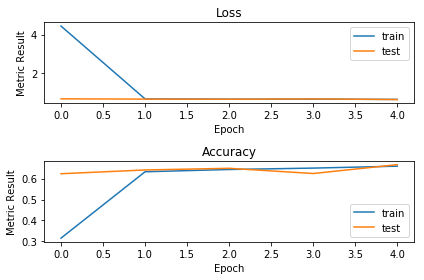

Nodes: 100
Activation: relu
Score: 0.7299848975104806
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6425 - acc: 0.6453 - val_loss: 0.5969 - val_acc: 0.6819
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.5851 - acc: 0.6948 - val_loss: 0.5747 - val_acc: 0.7054
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.5705 - acc: 0.7089 - val_loss: 0.5672 - val_acc: 0.7132
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.5642 - acc: 0.7146 - val_loss: 0.5559 - val_acc: 0.7186
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.5585 - acc: 0.7193 - val_loss: 0.5643 - val_acc: 0.7160


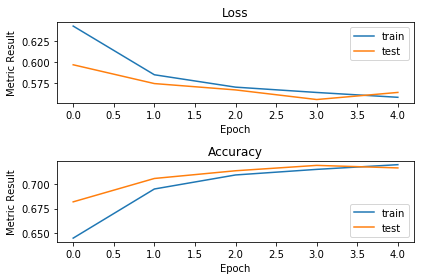

Nodes: 100
Activation: relu
Score: 0.7981572106570257
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6748 - acc: 0.6145 - val_loss: 0.6373 - val_acc: 0.6422
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.8170 - acc: 0.6067 - val_loss: 0.6440 - val_acc: 0.6384
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.8312 - acc: 0.6135 - val_loss: 0.6721 - val_acc: 0.5896
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6317 - acc: 0.6508 - val_loss: 0.6116 - val_acc: 0.6727
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 0.6400 - acc: 0.6521 - val_loss: 0.6471 - val_acc: 0.6361


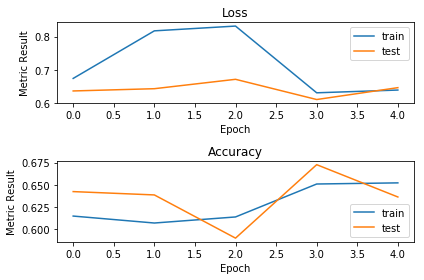

Nodes: 100
Activation: relu
Score: 0.6846821732954556
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 6.0040 - acc: 0.1330 - val_loss: 7.4852 - val_acc: 2.0400e-04
Epoch 2/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 1.7733e-04 - val_loss: 7.4852 - val_acc: 2.0400e-04
Epoch 3/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 1.7733e-04 - val_loss: 7.4852 - val_acc: 2.0400e-04
Epoch 4/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 1.7733e-04 - val_loss: 7.4852 - val_acc: 2.0400e-04
Epoch 5/5
2250000/2250000 [==============================] - 12s 5us/step - loss: 7.5020 - acc: 1.7733e-04 - val_loss: 7.4852 - val_acc: 2.0400e-04


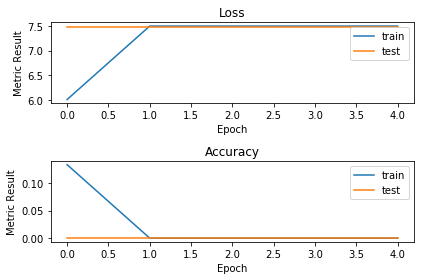

Nodes: 100
Activation: relu
Score: 0.48695086234710605
{'Node': 100, 'Activation': 'relu', 'Initializer': 'glorot_normal', 'Optimizer': 'Adadelta', 'Batch': 1000, 'Score': 0.7981572106570257}



In [7]:
bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
initiate = 'glorot_normal'
size = 1000
optimization = ['Adagrad', 'Adadelta', 'Adam', 'Nadam']


for optimize in optimization:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
        model.add(Dense(node, activation=activate))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=size, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Initializer'] = initiate
            bestResult['Optimizer'] = optimize
            bestResult['Batch'] = size
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

In [12]:
#Read in 2.5 Million rows. Split into train and test data set
N=2500000. #Change this line adjust the number of rows.
data=pd.read_csv("HIGGS.csv", nrows=N, header=None)
test_data=pd.read_csv("HIGGS.csv", nrows=500000, header=None, skiprows=10500000)

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
initiate = 'glorot_normal'
size = 1000
optimize = 'Adadelta'
epoch = 5


with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(1))

    model = multi_gpu_model(model, gpus=2)
    model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

    history = model.fit(x, y, epochs=epoch, batch_size=size, validation_split=.1)

    plotMetric(history)

    score = roc_auc_score(y_test,model.predict(x_test))

    print(f"Nodes: {node}")
    print(f"Activation: {activate}")
    print(f"Score: {score}")

    if score > bestScore:
        bestResult['Node'] = node
        bestResult['Activation'] = activate
        bestResult['Initializer'] = initiate
        bestResult['Optimizer'] = optimize
        bestResult['Batch'] = size
        bestResult['Score'] = score

        bestScore = score

print(f"{bestResult}\n")

bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
initiate = 'glorot_normal'
size = 1000
optimize = 'Adadelta'
epoch = 20


with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(1))

    model = multi_gpu_model(model, gpus=2)
    model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

    history = model.fit(x, y, epochs=epoch, batch_size=size, validation_split=.1)

    plotMetric(history)

    score = roc_auc_score(y_test,model.predict(x_test))

    print(f"Nodes: {node}")
    print(f"Activation: {activate}")
    print(f"Score: {score}")

    if score > bestScore:
        bestResult['Node'] = node
        bestResult['Activation'] = activate
        bestResult['Initializer'] = initiate
        bestResult['Optimizer'] = optimize
        bestResult['Batch'] = size
        bestResult['Score'] = score

        bestScore = score

print(f"{bestResult}\n")

bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
initiate = 'glorot_normal'
size = 1000
optimize = 'Adadelta'
epoch = 50


with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(1))

    model = multi_gpu_model(model, gpus=2)
    model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

    history = model.fit(x, y, epochs=epoch, batch_size=size, validation_split=.1)

    plotMetric(history)

    score = roc_auc_score(y_test,model.predict(x_test))

    print(f"Nodes: {node}")
    print(f"Activation: {activate}")
    print(f"Score: {score}")

    if score > bestScore:
        bestResult['Node'] = node
        bestResult['Activation'] = activate
        bestResult['Initializer'] = initiate
        bestResult['Optimizer'] = optimize
        bestResult['Batch'] = size
        bestResult['Score'] = score

        bestScore = score

print(f"{bestResult}\n")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 9450000 samples, validate on 1050000 samples
Epoch 1/20
9450000/9450000 [==============================] - 54s 6us/step - loss: 0.5885 - acc: 0.6935 - val_loss: 0.5650 - val_acc: 0.7140
Epoch 2/20
9450000/9450000 [==============================] - 51s 5us/step - loss: 0.5542 - acc: 0.7244 - val_loss: 0.5567 - val_acc: 0.7232
Epoch 3/20
9450000/9450000 [==============================] - 50s 5us/step - loss: 0.5453 - acc: 0.7316 - val_loss: 0.5353 - val_acc: 0.7363
Epoch 4/20
9450000/9450000 [==============================] - 50s 5us/step - loss: 0.5403 - acc: 0.7361 - val_loss: 0.5361 - val_acc: 0.7388
Epoch 5/20
9450000/9450000 [==============================] - 52s 6us/step - loss: 0.5386 - acc: 0.7379 - val_loss: 0.5486 - val_acc: 0.7368
Epoch 6/20
9450000/9450000 [==============================] - 51s 5us/step - loss: 0.5375 - acc: 0.7389 - val_loss: 0.540

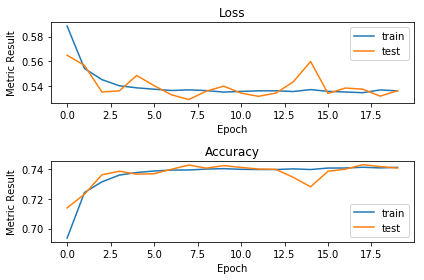

Nodes: 100
Activation: relu
Score: 0.8233727697497184
{'Node': 100, 'Activation': 'relu', 'Initializer': 'glorot_normal', 'Optimizer': 'Adadelta', 'Batch': 1000, 'Score': 0.8233727697497184}



In [4]:
#Read in 10.5 Million rows. Split into train and test data set
N=10500000. #Change this line adjust the number of rows.
data=pd.read_csv("HIGGS.csv", nrows=N, header=None)
test_data=pd.read_csv("HIGGS.csv", nrows=500000, header=None, skiprows=10500000)

y = np.array(data.loc[:,0])
x = np.array(data.loc[:,1:])
x_test = np.array(test_data.loc[:,1:])
y_test = np.array(test_data.loc[:,0])

bestResult = {}
bestScore = -1

node = 100
activate = 'relu'
initiate = 'glorot_normal'
size = 1000
optimize = 'Adadelta'
epoch = 20


with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(node, activation=activate))
    model.add(Dense(1))

    model = multi_gpu_model(model, gpus=2)
    model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

    history = model.fit(x, y, epochs=epoch, batch_size=size, validation_split=.1)

    plotMetric(history)

    score = roc_auc_score(y_test,model.predict(x_test))

    print(f"Nodes: {node}")
    print(f"Activation: {activate}")
    print(f"Score: {score}")

    if score > bestScore:
        bestResult['Node'] = node
        bestResult['Activation'] = activate
        bestResult['Initializer'] = initiate
        bestResult['Optimizer'] = optimize
        bestResult['Batch'] = size
        bestResult['Score'] = score
        

        bestScore = score

print(f"{bestResult}\n")

In [6]:
bestResult['Score'] = 0.83107673875398
print(f"{bestResult}\n")

{'Node': 100, 'Activation': 'relu', 'Initializer': 'glorot_normal', 'Optimizer': 'Adadelta', 'Batch': 1000, 'Score': 0.83107673875398}



Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6971 - acc: 0.5427 - val_loss: 0.6811 - val_acc: 0.5749
Epoch 2/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6409 - acc: 0.6277 - val_loss: 0.6098 - val_acc: 0.6651
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6184 - acc: 0.6600 - val_loss: 0.6105 - val_acc: 0.6680
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6283 - acc: 0.6464 - val_loss: 0.6319 - val_acc: 0.6391
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6155 - acc: 0.6593 - val_loss: 0.5930 - val_acc: 0.6826


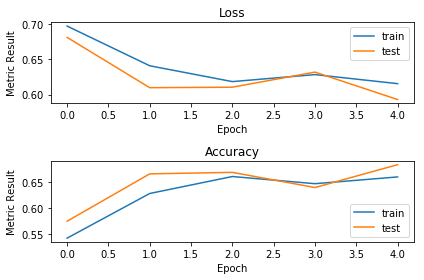

Nodes: 10
Activation: relu
Score: 0.7500093323643926
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.7294 - acc: 0.5540 - val_loss: 0.6458 - val_acc: 0.6248
Epoch 2/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6437 - acc: 0.6245 - val_loss: 0.6210 - val_acc: 0.6576
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6364 - acc: 0.6414 - val_loss: 0.6131 - val_acc: 0.6643
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6150 - acc: 0.6652 - val_loss: 0.6017 - val_acc: 0.6757
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6127 - acc: 0.6643 - val_loss: 0.5925 - val_acc: 0.6811


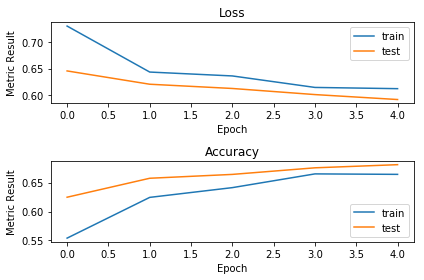

Nodes: 20
Activation: relu
Score: 0.7494903604006788
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6682 - acc: 0.5982 - val_loss: 0.6226 - val_acc: 0.6522
Epoch 2/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6527 - acc: 0.6194 - val_loss: 0.6162 - val_acc: 0.6592
Epoch 3/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6250 - acc: 0.6521 - val_loss: 0.6071 - val_acc: 0.6680
Epoch 4/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6286 - acc: 0.6484 - val_loss: 0.6081 - val_acc: 0.6704
Epoch 5/5
2250000/2250000 [==============================] - 13s 6us/step - loss: 0.6186 - acc: 0.6595 - val_loss: 0.6021 - val_acc: 0.6749


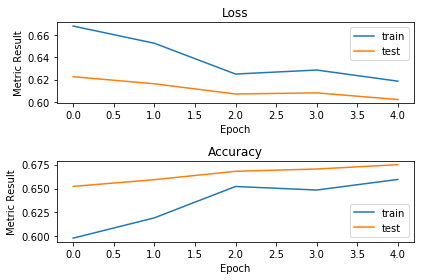

Nodes: 50
Activation: relu
Score: 0.7411250881277902
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6395 - acc: 0.6359 - val_loss: 0.5960 - val_acc: 0.6779
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5985 - acc: 0.6778 - val_loss: 0.5814 - val_acc: 0.6922
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5920 - acc: 0.6842 - val_loss: 0.5787 - val_acc: 0.6956
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5874 - acc: 0.6875 - val_loss: 0.5747 - val_acc: 0.6956
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5734 - acc: 0.6990 - val_loss: 0.5610 - val_acc: 0.7099


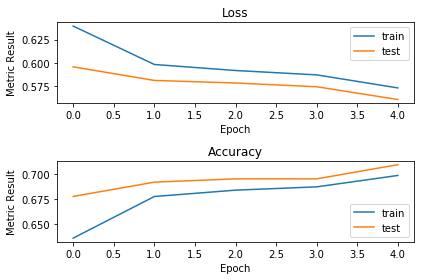

Nodes: 100
Activation: relu
Score: 0.7844673898726362
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


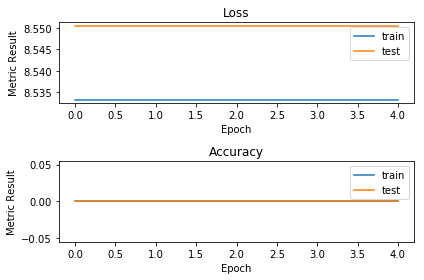

Nodes: 10
Activation: sigmoid
Score: 0.4832454776108587
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6476 - acc: 0.6179 - val_loss: 0.6325 - val_acc: 0.6353
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6198 - acc: 0.6531 - val_loss: 0.6053 - val_acc: 0.6724
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6039 - acc: 0.6711 - val_loss: 0.5956 - val_acc: 0.6775
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5977 - acc: 0.6766 - val_loss: 0.5923 - val_acc: 0.6807
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5947 - acc: 0.6795 - val_loss: 0.5903 - val_acc: 0.6824


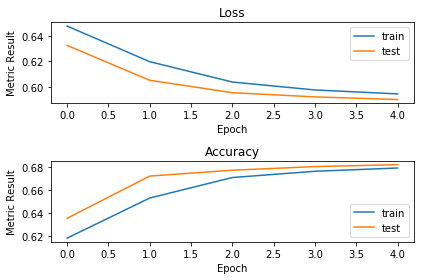

Nodes: 20
Activation: sigmoid
Score: 0.7496833160021935
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.6501 - acc: 0.6170 - val_loss: 0.6388 - val_acc: 0.6359
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6311 - acc: 0.6424 - val_loss: 0.6124 - val_acc: 0.6622
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6093 - acc: 0.6666 - val_loss: 0.5970 - val_acc: 0.6758
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5952 - acc: 0.6805 - val_loss: 0.5849 - val_acc: 0.6880
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5856 - acc: 0.6882 - val_loss: 0.5799 - val_acc: 0.6936


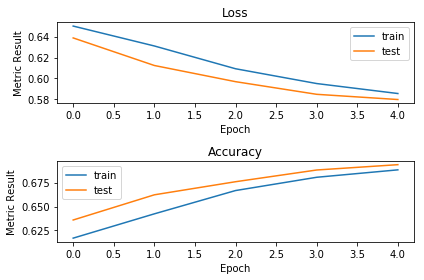

Nodes: 50
Activation: sigmoid
Score: 0.7657219332646675
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 17s 8us/step - loss: 7.5020 - acc: 0.5234 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 7.5020 - acc: 0.5233 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 7.5020 - acc: 0.5232 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 7.5020 - acc: 0.5233 - val_loss: 7.4852 - val_acc: 0.5305
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 7.5020 - acc: 0.5233 - val_loss: 7.4852 - val_acc: 0.5305


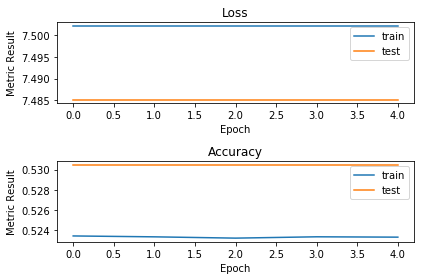

Nodes: 100
Activation: sigmoid
Score: 0.4906998226611648
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.6736 - acc: 0.5937 - val_loss: 0.6439 - val_acc: 0.6326
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6453 - acc: 0.6324 - val_loss: 0.6356 - val_acc: 0.6421
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6419 - acc: 0.6351 - val_loss: 0.6302 - val_acc: 0.6497
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6309 - acc: 0.6466 - val_loss: 0.6142 - val_acc: 0.6622
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6204 - acc: 0.6577 - val_loss: 0.6621 - val_acc: 0.6288


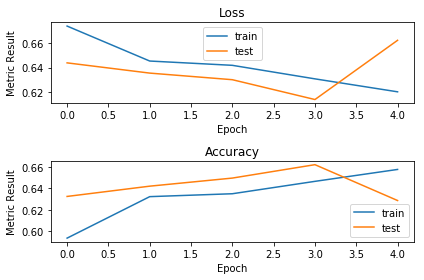

Nodes: 10
Activation: tanh
Score: 0.6642426883847444
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6642 - acc: 0.6061 - val_loss: 0.6635 - val_acc: 0.5992
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6517 - acc: 0.6221 - val_loss: 0.6236 - val_acc: 0.6507
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6218 - acc: 0.6536 - val_loss: 0.6081 - val_acc: 0.6671
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6172 - acc: 0.6582 - val_loss: 0.6633 - val_acc: 0.6007
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6107 - acc: 0.6651 - val_loss: 0.5960 - val_acc: 0.6797


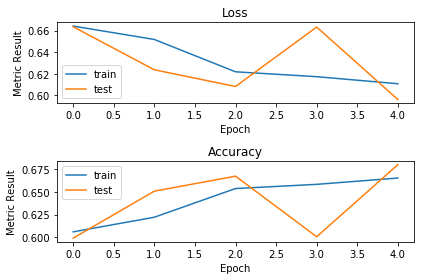

Nodes: 20
Activation: tanh
Score: 0.7470033428016929
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6608 - acc: 0.6132 - val_loss: 0.6437 - val_acc: 0.6324
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6184 - acc: 0.6591 - val_loss: 0.6119 - val_acc: 0.6646
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6019 - acc: 0.6761 - val_loss: 0.5945 - val_acc: 0.6843
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6108 - acc: 0.6670 - val_loss: 0.5994 - val_acc: 0.6727
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.5983 - acc: 0.6786 - val_loss: 0.5829 - val_acc: 0.6891


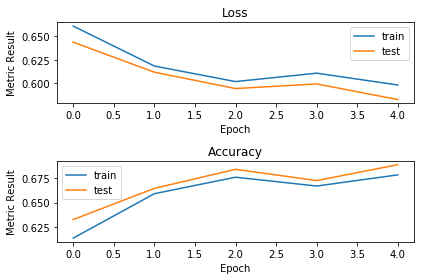

Nodes: 50
Activation: tanh
Score: 0.7598864277698861
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6693 - acc: 0.6067 - val_loss: 0.6537 - val_acc: 0.6184
Epoch 2/5
2250000/2250000 [==============================] - 15s 6us/step - loss: 7.6446 - acc: 0.0718 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 15s 6us/step - loss: 8.5334 - acc: 8.8889e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00


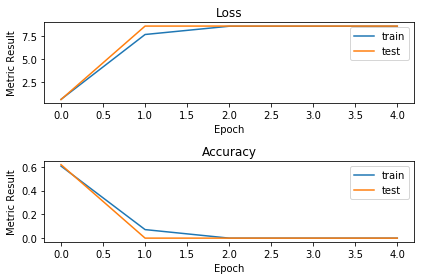

Nodes: 100
Activation: tanh
Score: 0.47386329371153235
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6855 - acc: 0.5893 - val_loss: 0.6833 - val_acc: 0.5604
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6570 - acc: 0.6121 - val_loss: 0.6449 - val_acc: 0.6296
Epoch 3/5
2250000/2250000 [==============================] - 15s 6us/step - loss: 0.6539 - acc: 0.6193 - val_loss: 0.6398 - val_acc: 0.6419
Epoch 4/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6362 - acc: 0.6424 - val_loss: 0.6303 - val_acc: 0.6453
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6225 - acc: 0.6548 - val_loss: 0.6596 - val_acc: 0.6198


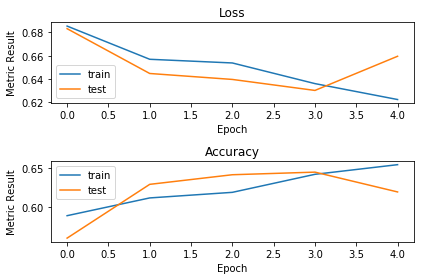

Nodes: 10
Activation: elu
Score: 0.6569890871528165
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6796 - acc: 0.5831 - val_loss: 0.6494 - val_acc: 0.6215
Epoch 2/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6654 - acc: 0.6002 - val_loss: 0.6524 - val_acc: 0.6202
Epoch 3/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6498 - acc: 0.6230 - val_loss: 0.6454 - val_acc: 0.6284
Epoch 4/5
2250000/2250000 [==============================] - 15s 6us/step - loss: 0.6502 - acc: 0.6246 - val_loss: 0.6736 - val_acc: 0.6000
Epoch 5/5
2250000/2250000 [==============================] - 14s 6us/step - loss: 0.6500 - acc: 0.6261 - val_loss: 0.6397 - val_acc: 0.6412


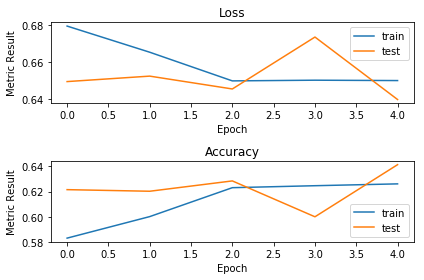

Nodes: 20
Activation: elu
Score: 0.6912936983371126
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6725 - acc: 0.5993 - val_loss: 0.6468 - val_acc: 0.6249
Epoch 2/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6599 - acc: 0.6180 - val_loss: 0.6440 - val_acc: 0.6324
Epoch 3/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6572 - acc: 0.6245 - val_loss: 0.6690 - val_acc: 0.5967
Epoch 4/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6591 - acc: 0.6148 - val_loss: 0.6363 - val_acc: 0.6437
Epoch 5/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6496 - acc: 0.6272 - val_loss: 0.6445 - val_acc: 0.6382


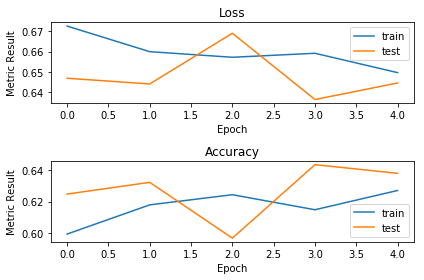

Nodes: 50
Activation: elu
Score: 0.6827549283422304
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 19s 9us/step - loss: 2.3506 - acc: 0.4435 - val_loss: 7.4840 - val_acc: 3.0800e-04
Epoch 2/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 6.2635 - acc: 0.1159 - val_loss: 0.7053 - val_acc: 0.5010
Epoch 3/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6772 - acc: 0.5714 - val_loss: 0.6628 - val_acc: 0.6025
Epoch 4/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.7040 - acc: 0.5976 - val_loss: 0.6488 - val_acc: 0.6283
Epoch 5/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6516 - acc: 0.6277 - val_loss: 0.6374 - val_acc: 0.6473


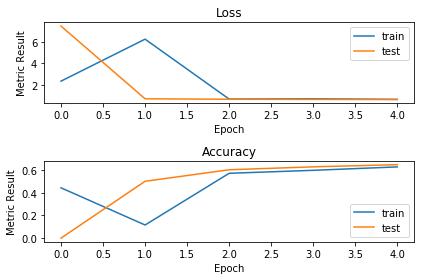

Nodes: 100
Activation: elu
Score: 0.6988031861789162
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.7426 - acc: 0.5893 - val_loss: 0.6490 - val_acc: 0.6226
Epoch 2/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6548 - acc: 0.6207 - val_loss: 0.6392 - val_acc: 0.6382
Epoch 3/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6628 - acc: 0.6128 - val_loss: 0.6418 - val_acc: 0.6418
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6603 - acc: 0.6100 - val_loss: 0.6396 - val_acc: 0.6366
Epoch 5/5
2250000/2250000 [==============================] - 15s 7us/step - loss: 0.6337 - acc: 0.6433 - val_loss: 0.6158 - val_acc: 0.6660


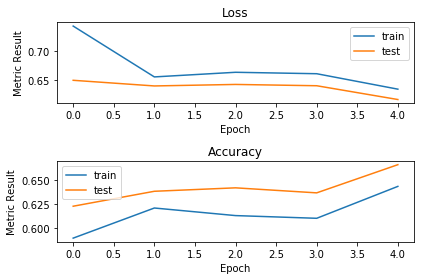

Nodes: 10
Activation: selu
Score: 0.7284995821401059
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6720 - acc: 0.6020 - val_loss: 0.6402 - val_acc: 0.6377
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6509 - acc: 0.6224 - val_loss: 0.6304 - val_acc: 0.6481
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6318 - acc: 0.6467 - val_loss: 0.6208 - val_acc: 0.6496
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6216 - acc: 0.6579 - val_loss: 0.6006 - val_acc: 0.6796
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6415 - acc: 0.6424 - val_loss: 0.6466 - val_acc: 0.6305


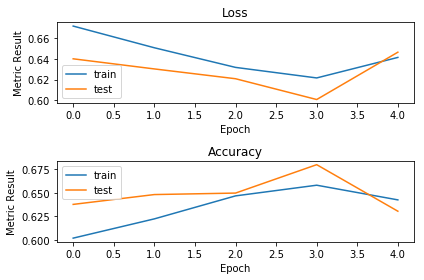

Nodes: 20
Activation: selu
Score: 0.679429115294289
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.7151 - acc: 0.5881 - val_loss: 0.6439 - val_acc: 0.6321
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6497 - acc: 0.6246 - val_loss: 0.6244 - val_acc: 0.6533
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 5.0225 - acc: 0.2920 - val_loss: 8.5504 - val_acc: 4.0000e-06
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 8.5334 - acc: 4.0000e-06 - val_loss: 8.5504 - val_acc: 4.0000e-06
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 8.5334 - acc: 2.6667e-06 - val_loss: 8.5504 - val_acc: 4.0000e-06


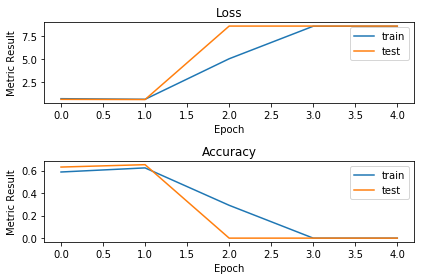

Nodes: 50
Activation: selu
Score: 0.5050201244639969
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.7752 - acc: 0.5912 - val_loss: 7.5814 - val_acc: 0.1139
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 7.5842 - acc: 0.0040 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 7.5020 - acc: 4.4444e-07 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 7.5020 - acc: 4.4444e-07 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 7.5020 - acc: 4.4444e-07 - val_loss: 7.4852 - val_acc: 0.0000e+00


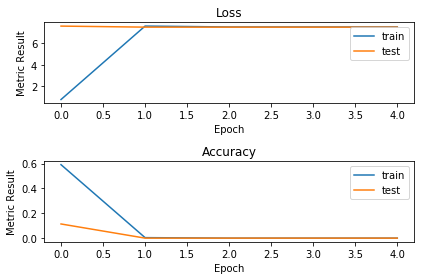

Nodes: 100
Activation: selu
Score: 0.48546245107205005
{'Node': 100, 'Activation': 'relu', 'Score': 0.7844673898726362}



In [14]:
bestResult = {}
bestScore = -1

nodes = [10, 20, 50, 100]
activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']

for activate in activation:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))
            
            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)

            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6932 - acc: 0.5668 - val_loss: 0.6352 - val_acc: 0.6369
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6381 - acc: 0.6325 - val_loss: 0.6260 - val_acc: 0.6488
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6302 - acc: 0.6442 - val_loss: 0.6202 - val_acc: 0.6586
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6306 - acc: 0.6465 - val_loss: 0.6124 - val_acc: 0.6662
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6080 - acc: 0.6718 - val_loss: 0.6364 - val_acc: 0.6499


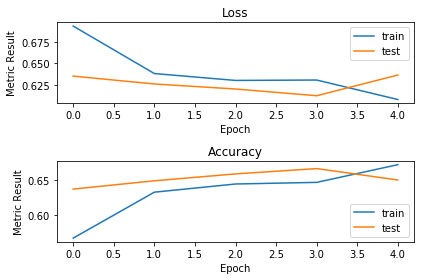

Nodes: 10
Activate 1: relu
Activate 2: relu
Score: 0.6883290624545418
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6344 - acc: 0.6402 - val_loss: 0.6097 - val_acc: 0.6640
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6142 - acc: 0.6623 - val_loss: 0.6007 - val_acc: 0.6729
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6071 - acc: 0.6701 - val_loss: 0.5939 - val_acc: 0.6816
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6017 - acc: 0.6757 - val_loss: 0.5890 - val_acc: 0.6875
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.5959 - acc: 0.6808 - val_loss: 0.5860 - val_acc: 0.6890


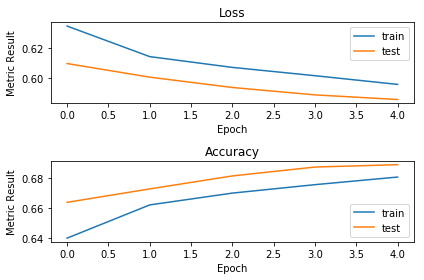

Nodes: 10
Activate 1: relu
Activate 2: sigmoid
Score: 0.759180555185284
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6767 - acc: 0.5851 - val_loss: 0.6495 - val_acc: 0.6312
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6523 - acc: 0.6212 - val_loss: 0.6340 - val_acc: 0.6424
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6272 - acc: 0.6475 - val_loss: 0.6151 - val_acc: 0.6630
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6153 - acc: 0.6622 - val_loss: 0.6053 - val_acc: 0.6731
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6157 - acc: 0.6621 - val_loss: 0.6241 - val_acc: 0.6481


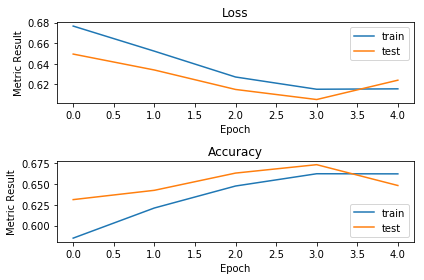

Nodes: 10
Activate 1: relu
Activate 2: tanh
Score: 0.7124734055845869
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.7716 - acc: 0.5087 - val_loss: 0.6830 - val_acc: 0.5574
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6722 - acc: 0.5859 - val_loss: 0.6476 - val_acc: 0.6215
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6946 - acc: 0.5565 - val_loss: 0.6544 - val_acc: 0.6196
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6546 - acc: 0.6169 - val_loss: 0.6406 - val_acc: 0.6356
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6491 - acc: 0.6229 - val_loss: 0.6347 - val_acc: 0.6411


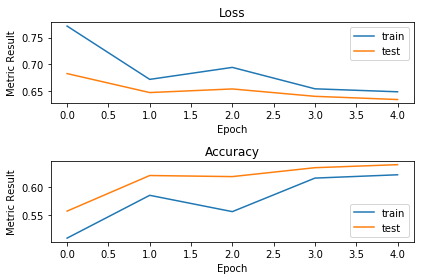

Nodes: 10
Activate 1: relu
Activate 2: elu
Score: 0.6923880886535748
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6836 - acc: 0.5792 - val_loss: 0.6420 - val_acc: 0.6312
Epoch 2/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6441 - acc: 0.6294 - val_loss: 0.6219 - val_acc: 0.6536
Epoch 3/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6502 - acc: 0.6260 - val_loss: 0.6338 - val_acc: 0.6426
Epoch 4/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6487 - acc: 0.6200 - val_loss: 0.6416 - val_acc: 0.6322
Epoch 5/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6643 - acc: 0.5998 - val_loss: 0.6396 - val_acc: 0.6408


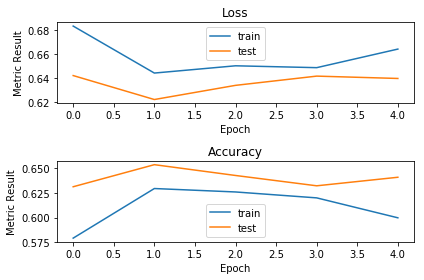

Nodes: 10
Activate 1: relu
Activate 2: selu
Score: 0.6917725806128732
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6562 - acc: 0.6074 - val_loss: 0.6550 - val_acc: 0.5988
Epoch 2/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6271 - acc: 0.6474 - val_loss: 0.6176 - val_acc: 0.6655
Epoch 3/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6129 - acc: 0.6654 - val_loss: 0.6087 - val_acc: 0.6730
Epoch 4/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6118 - acc: 0.6673 - val_loss: 0.6054 - val_acc: 0.6764
Epoch 5/5
2250000/2250000 [==============================] - 16s 7us/step - loss: 0.6074 - acc: 0.6709 - val_loss: 0.5991 - val_acc: 0.6792


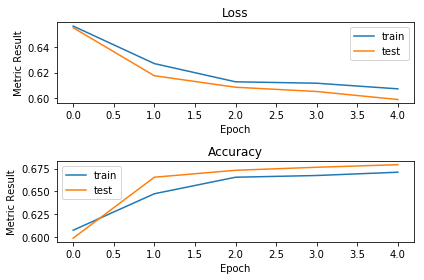

Nodes: 10
Activate 1: sigmoid
Activate 2: relu
Score: 0.7453777636723462
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.7499 - acc: 0.5358 - val_loss: 0.6544 - val_acc: 0.6157
Epoch 2/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6509 - acc: 0.6148 - val_loss: 0.6403 - val_acc: 0.6318
Epoch 3/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6405 - acc: 0.6309 - val_loss: 0.6338 - val_acc: 0.6387
Epoch 4/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6336 - acc: 0.6373 - val_loss: 0.6240 - val_acc: 0.6496
Epoch 5/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6241 - acc: 0.6489 - val_loss: 0.6155 - val_acc: 0.6588


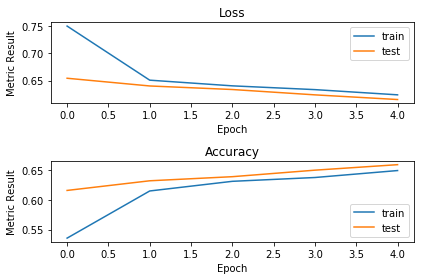

Nodes: 10
Activate 1: sigmoid
Activate 2: sigmoid
Score: 0.7193868180202042
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6599 - acc: 0.6008 - val_loss: 0.6363 - val_acc: 0.6335
Epoch 2/5
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.6211 - acc: 0.6523 - val_loss: 0.6059 - val_acc: 0.6666
Epoch 3/5
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.6076 - acc: 0.6684 - val_loss: 0.5985 - val_acc: 0.6760
Epoch 4/5
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.6037 - acc: 0.6722 - val_loss: 0.5962 - val_acc: 0.6785
Epoch 5/5
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.5992 - acc: 0.6765 - val_loss: 0.5907 - val_acc: 0.6835


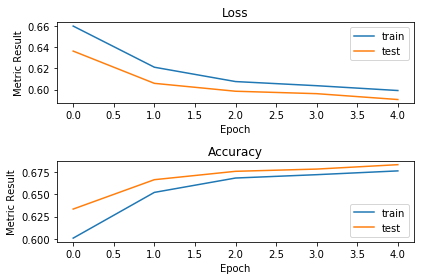

Nodes: 10
Activate 1: sigmoid
Activate 2: tanh
Score: 0.7522277155564987
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6551 - acc: 0.6061 - val_loss: 0.6369 - val_acc: 0.6337
Epoch 2/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6322 - acc: 0.6378 - val_loss: 0.6186 - val_acc: 0.6540
Epoch 3/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6138 - acc: 0.6644 - val_loss: 0.6019 - val_acc: 0.6734
Epoch 4/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.6047 - acc: 0.6736 - val_loss: 0.5953 - val_acc: 0.6826
Epoch 5/5
2250000/2250000 [==============================] - 17s 7us/step - loss: 0.5990 - acc: 0.6779 - val_loss: 0.5906 - val_acc: 0.6831


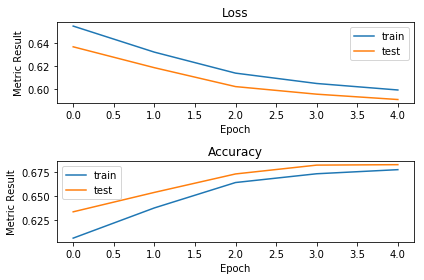

Nodes: 10
Activate 1: sigmoid
Activate 2: elu
Score: 0.7527795322044354
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.8222 - acc: 0.5312 - val_loss: 0.6667 - val_acc: 0.6030
Epoch 2/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6612 - acc: 0.6021 - val_loss: 0.6473 - val_acc: 0.6225
Epoch 3/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6436 - acc: 0.6247 - val_loss: 0.6339 - val_acc: 0.6374
Epoch 4/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6251 - acc: 0.6480 - val_loss: 0.6118 - val_acc: 0.6641
Epoch 5/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6133 - acc: 0.6627 - val_loss: 0.6066 - val_acc: 0.6727


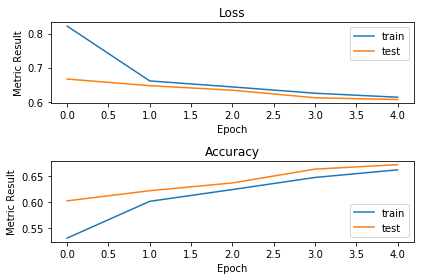

Nodes: 10
Activate 1: sigmoid
Activate 2: selu
Score: 0.735646264991246
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.7571 - acc: 0.5567 - val_loss: 0.6478 - val_acc: 0.6225
Epoch 2/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.7094 - acc: 0.5375 - val_loss: 0.6701 - val_acc: 0.5969
Epoch 3/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6605 - acc: 0.6010 - val_loss: 0.6443 - val_acc: 0.6270
Epoch 4/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6576 - acc: 0.6095 - val_loss: 0.6460 - val_acc: 0.6290
Epoch 5/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6661 - acc: 0.5929 - val_loss: 0.6488 - val_acc: 0.6217


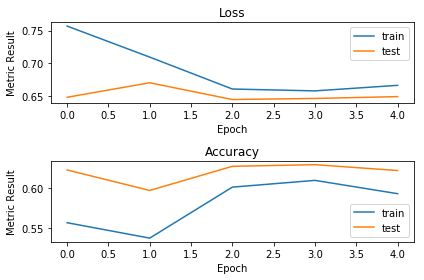

Nodes: 10
Activate 1: tanh
Activate 2: relu
Score: 0.6679336236741092
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 7.5020 - acc: 0.0139 - val_loss: 7.4852 - val_acc: 0.0059
Epoch 2/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 7.5020 - acc: 0.0140 - val_loss: 7.4852 - val_acc: 0.0059
Epoch 3/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 7.5020 - acc: 0.0140 - val_loss: 7.4852 - val_acc: 0.0059
Epoch 4/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 7.5020 - acc: 0.0139 - val_loss: 7.4852 - val_acc: 0.0059
Epoch 5/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 7.5020 - acc: 0.0140 - val_loss: 7.4852 - val_acc: 0.0059


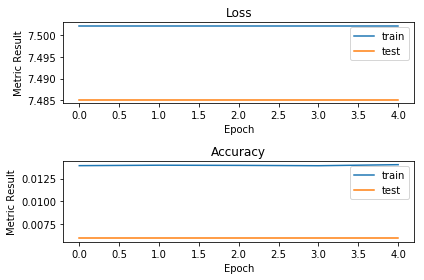

Nodes: 10
Activate 1: tanh
Activate 2: sigmoid
Score: 0.5013771599280932
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6890 - acc: 0.5701 - val_loss: 0.6522 - val_acc: 0.6189
Epoch 2/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6694 - acc: 0.6014 - val_loss: 0.6578 - val_acc: 0.6159
Epoch 3/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6656 - acc: 0.6045 - val_loss: 0.6503 - val_acc: 0.6236
Epoch 4/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6506 - acc: 0.6230 - val_loss: 0.6448 - val_acc: 0.6305
Epoch 5/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6411 - acc: 0.6340 - val_loss: 0.7161 - val_acc: 0.4837


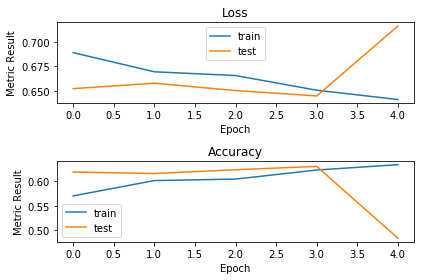

Nodes: 10
Activate 1: tanh
Activate 2: tanh
Score: 0.5944727772563374
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6943 - acc: 0.5570 - val_loss: 0.6501 - val_acc: 0.6241
Epoch 2/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6565 - acc: 0.6127 - val_loss: 0.6458 - val_acc: 0.6292
Epoch 3/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6490 - acc: 0.6245 - val_loss: 0.6414 - val_acc: 0.6351
Epoch 4/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6530 - acc: 0.6206 - val_loss: 0.6608 - val_acc: 0.6219
Epoch 5/5
2250000/2250000 [==============================] - 18s 8us/step - loss: 0.6402 - acc: 0.6357 - val_loss: 0.6275 - val_acc: 0.6505


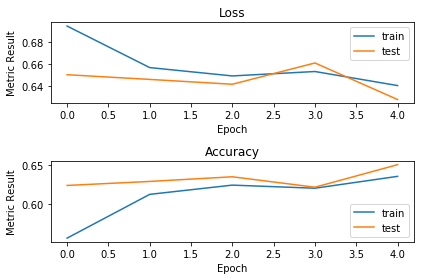

Nodes: 10
Activate 1: tanh
Activate 2: elu
Score: 0.7123555371321841
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6873 - acc: 0.5762 - val_loss: 0.6875 - val_acc: 0.5468
Epoch 2/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6610 - acc: 0.6053 - val_loss: 0.6475 - val_acc: 0.6257
Epoch 3/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6665 - acc: 0.6054 - val_loss: 0.6571 - val_acc: 0.6185
Epoch 4/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6548 - acc: 0.6162 - val_loss: 0.6436 - val_acc: 0.6318
Epoch 5/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6582 - acc: 0.6102 - val_loss: 0.6319 - val_acc: 0.6439


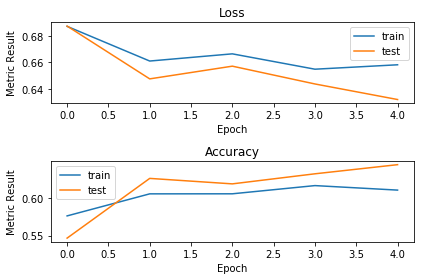

Nodes: 10
Activate 1: tanh
Activate 2: selu
Score: 0.7024857459939756
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6822 - acc: 0.5765 - val_loss: 0.6841 - val_acc: 0.5589
Epoch 2/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6605 - acc: 0.6044 - val_loss: 0.6451 - val_acc: 0.6286
Epoch 3/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6463 - acc: 0.6271 - val_loss: 0.6335 - val_acc: 0.6388
Epoch 4/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6385 - acc: 0.6320 - val_loss: 0.6556 - val_acc: 0.6173
Epoch 5/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 0.6305 - acc: 0.6412 - val_loss: 0.6079 - val_acc: 0.6667


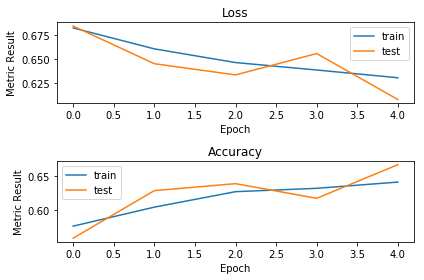

Nodes: 10
Activate 1: elu
Activate 2: relu
Score: 0.7336850859013402
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 8.5334 - acc: 0.4654 - val_loss: 8.5504 - val_acc: 0.4670
Epoch 2/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 8.5334 - acc: 0.4643 - val_loss: 8.5504 - val_acc: 0.4670
Epoch 3/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 8.5334 - acc: 0.4643 - val_loss: 8.5504 - val_acc: 0.4670
Epoch 4/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 8.5334 - acc: 0.4643 - val_loss: 8.5504 - val_acc: 0.4670
Epoch 5/5
2250000/2250000 [==============================] - 19s 8us/step - loss: 8.5334 - acc: 0.4643 - val_loss: 8.5504 - val_acc: 0.4670


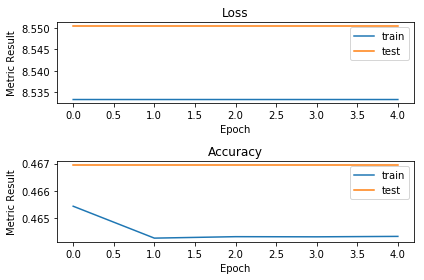

Nodes: 10
Activate 1: elu
Activate 2: sigmoid
Score: 0.5127123224483059
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6767 - acc: 0.5957 - val_loss: 0.6440 - val_acc: 0.6328
Epoch 2/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6417 - acc: 0.6334 - val_loss: 0.6193 - val_acc: 0.6528
Epoch 3/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6236 - acc: 0.6531 - val_loss: 0.6123 - val_acc: 0.6618
Epoch 4/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6179 - acc: 0.6597 - val_loss: 0.6086 - val_acc: 0.6669
Epoch 5/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6192 - acc: 0.6580 - val_loss: 0.6082 - val_acc: 0.6691


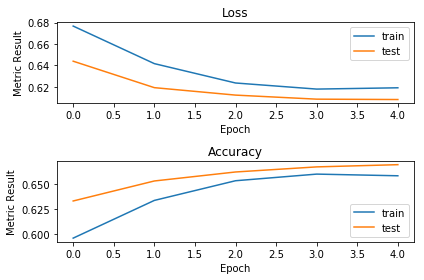

Nodes: 10
Activate 1: elu
Activate 2: tanh
Score: 0.7345851496800044
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6731 - acc: 0.5870 - val_loss: 0.6481 - val_acc: 0.6228
Epoch 2/5
2250000/2250000 [==============================] - 19s 9us/step - loss: 0.6490 - acc: 0.6248 - val_loss: 0.6397 - val_acc: 0.6380
Epoch 3/5
2250000/2250000 [==============================] - 19s 9us/step - loss: 0.6467 - acc: 0.6309 - val_loss: 0.6383 - val_acc: 0.6437
Epoch 4/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6398 - acc: 0.6431 - val_loss: 0.6283 - val_acc: 0.6539
Epoch 5/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6501 - acc: 0.6293 - val_loss: 0.6486 - val_acc: 0.6215


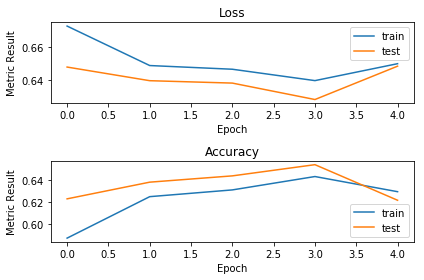

Nodes: 10
Activate 1: elu
Activate 2: elu
Score: 0.6704802179786848
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6999 - acc: 0.5778 - val_loss: 0.6497 - val_acc: 0.6225
Epoch 2/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6666 - acc: 0.6015 - val_loss: 0.6546 - val_acc: 0.6211
Epoch 3/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6455 - acc: 0.6305 - val_loss: 0.6603 - val_acc: 0.6044
Epoch 4/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6320 - acc: 0.6463 - val_loss: 0.6119 - val_acc: 0.6634
Epoch 5/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6229 - acc: 0.6563 - val_loss: 0.6307 - val_acc: 0.6527


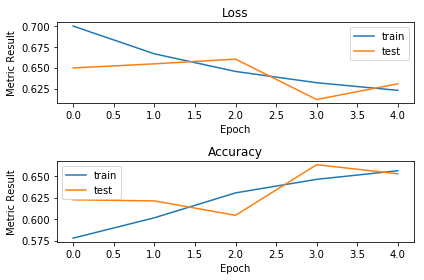

Nodes: 10
Activate 1: elu
Activate 2: selu
Score: 0.7085745793547055
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.7191 - acc: 0.5626 - val_loss: 0.6504 - val_acc: 0.6182
Epoch 2/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6572 - acc: 0.6117 - val_loss: 0.6423 - val_acc: 0.6316
Epoch 3/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6287 - acc: 0.6473 - val_loss: 0.6110 - val_acc: 0.6648
Epoch 4/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6204 - acc: 0.6579 - val_loss: 0.6063 - val_acc: 0.6697
Epoch 5/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6173 - acc: 0.6613 - val_loss: 0.6122 - val_acc: 0.6688


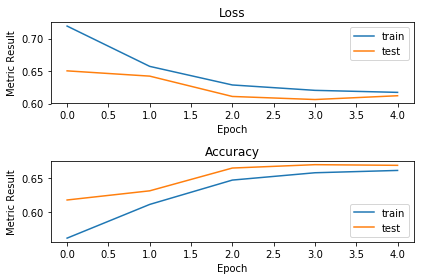

Nodes: 10
Activate 1: selu
Activate 2: relu
Score: 0.7346571499468155
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6528 - acc: 0.6159 - val_loss: 0.6603 - val_acc: 0.6063
Epoch 2/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6509 - acc: 0.6190 - val_loss: 0.6424 - val_acc: 0.6290
Epoch 3/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6406 - acc: 0.6293 - val_loss: 0.6337 - val_acc: 0.6390
Epoch 4/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6286 - acc: 0.6464 - val_loss: 0.6125 - val_acc: 0.6665
Epoch 5/5
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6121 - acc: 0.6677 - val_loss: 0.6062 - val_acc: 0.6726


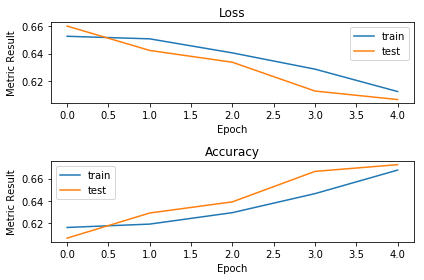

Nodes: 10
Activate 1: selu
Activate 2: sigmoid
Score: 0.7346394362443723
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6685 - acc: 0.6011 - val_loss: 0.6431 - val_acc: 0.6319
Epoch 2/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6532 - acc: 0.6149 - val_loss: 0.6835 - val_acc: 0.5584
Epoch 3/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6367 - acc: 0.6353 - val_loss: 0.6178 - val_acc: 0.6565
Epoch 4/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6180 - acc: 0.6598 - val_loss: 0.6057 - val_acc: 0.6715
Epoch 5/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6045 - acc: 0.6730 - val_loss: 0.5951 - val_acc: 0.6789


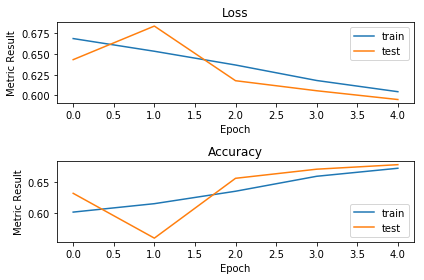

Nodes: 10
Activate 1: selu
Activate 2: tanh
Score: 0.7483217986826549
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6874 - acc: 0.5873 - val_loss: 0.6475 - val_acc: 0.6241
Epoch 2/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6634 - acc: 0.6065 - val_loss: 0.6449 - val_acc: 0.6294
Epoch 3/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6593 - acc: 0.6109 - val_loss: 0.6503 - val_acc: 0.6307
Epoch 4/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6447 - acc: 0.6326 - val_loss: 0.6330 - val_acc: 0.6479
Epoch 5/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6324 - acc: 0.6467 - val_loss: 0.6123 - val_acc: 0.6633


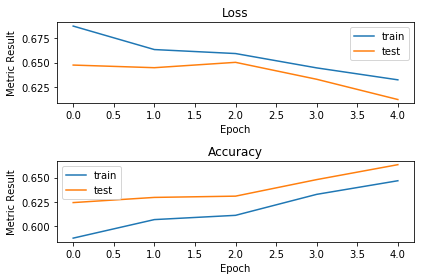

Nodes: 10
Activate 1: selu
Activate 2: elu
Score: 0.7286912942585032
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.7467 - acc: 0.5351 - val_loss: 0.6606 - val_acc: 0.6065
Epoch 2/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6959 - acc: 0.5812 - val_loss: 0.6834 - val_acc: 0.5536
Epoch 3/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6817 - acc: 0.5617 - val_loss: 0.6625 - val_acc: 0.6052
Epoch 4/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6572 - acc: 0.6094 - val_loss: 0.6455 - val_acc: 0.6271
Epoch 5/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6439 - acc: 0.6313 - val_loss: 0.6310 - val_acc: 0.6503


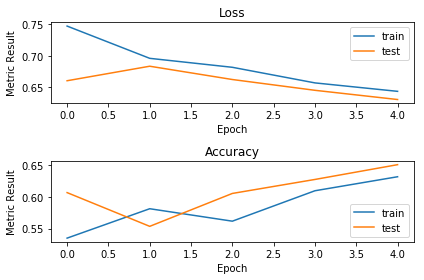

Nodes: 10
Activate 1: selu
Activate 2: selu
Score: 0.7083899561384047
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6614 - acc: 0.6011 - val_loss: 0.6287 - val_acc: 0.6469
Epoch 2/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6223 - acc: 0.6548 - val_loss: 0.6026 - val_acc: 0.6705
Epoch 3/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.5953 - acc: 0.6799 - val_loss: 0.5883 - val_acc: 0.6848
Epoch 4/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6016 - acc: 0.6752 - val_loss: 0.5919 - val_acc: 0.6865
Epoch 5/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6061 - acc: 0.6721 - val_loss: 0.6382 - val_acc: 0.6542


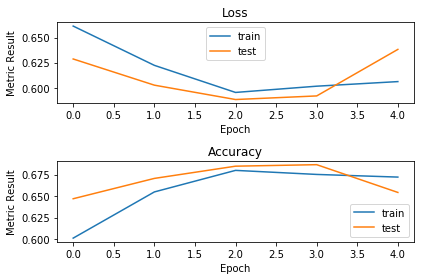

Nodes: 20
Activate 1: relu
Activate 2: relu
Score: 0.6960943519642007
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6364 - acc: 0.6398 - val_loss: 0.6117 - val_acc: 0.6653
Epoch 2/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6120 - acc: 0.6639 - val_loss: 0.5980 - val_acc: 0.6773
Epoch 3/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6101 - acc: 0.6669 - val_loss: 0.6439 - val_acc: 0.6291
Epoch 4/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6170 - acc: 0.6600 - val_loss: 0.5923 - val_acc: 0.6831
Epoch 5/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.5998 - acc: 0.6764 - val_loss: 0.5835 - val_acc: 0.6907


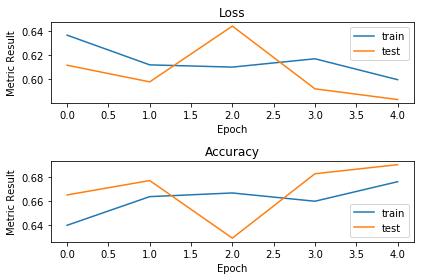

Nodes: 20
Activate 1: relu
Activate 2: sigmoid
Score: 0.7599566347342015
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6404 - acc: 0.6343 - val_loss: 0.6153 - val_acc: 0.6640
Epoch 2/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6269 - acc: 0.6497 - val_loss: 0.6045 - val_acc: 0.6743
Epoch 3/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6122 - acc: 0.6673 - val_loss: 0.6021 - val_acc: 0.6766
Epoch 4/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6246 - acc: 0.6498 - val_loss: 0.6045 - val_acc: 0.6696
Epoch 5/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6109 - acc: 0.6657 - val_loss: 0.5950 - val_acc: 0.6788


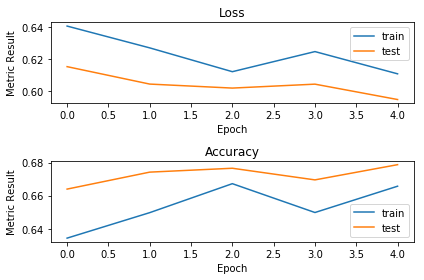

Nodes: 20
Activate 1: relu
Activate 2: tanh
Score: 0.7487049757110377
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6994 - acc: 0.5638 - val_loss: 0.6476 - val_acc: 0.6244
Epoch 2/5
2250000/2250000 [==============================] - 21s 10us/step - loss: 0.6495 - acc: 0.6200 - val_loss: 0.6279 - val_acc: 0.6467
Epoch 3/5
2250000/2250000 [==============================] - 21s 9us/step - loss: 0.6307 - acc: 0.6470 - val_loss: 0.6136 - val_acc: 0.6610
Epoch 4/5
2250000/2250000 [==============================] - 21s 10us/step - loss: 0.6198 - acc: 0.6637 - val_loss: 0.6890 - val_acc: 0.5897
Epoch 5/5
2250000/2250000 [==============================] - 21s 10us/step - loss: 0.6839 - acc: 0.5854 - val_loss: 0.6431 - val_acc: 0.6340


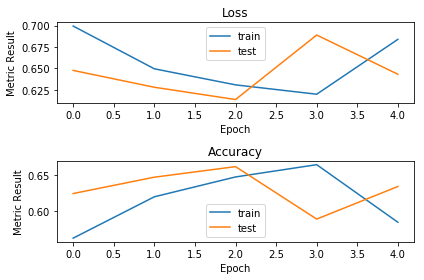

Nodes: 20
Activate 1: relu
Activate 2: elu
Score: 0.6902165978879347
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6618 - acc: 0.6125 - val_loss: 0.6238 - val_acc: 0.6559
Epoch 2/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6273 - acc: 0.6519 - val_loss: 0.6063 - val_acc: 0.6681
Epoch 3/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6342 - acc: 0.6445 - val_loss: 0.6097 - val_acc: 0.6643
Epoch 4/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6151 - acc: 0.6649 - val_loss: 0.6005 - val_acc: 0.6766
Epoch 5/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6148 - acc: 0.6656 - val_loss: 0.5996 - val_acc: 0.6814


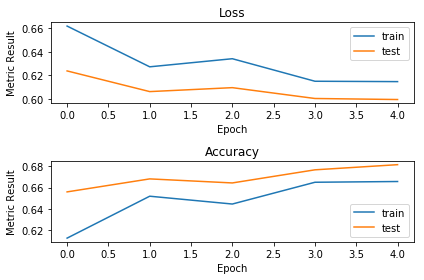

Nodes: 20
Activate 1: relu
Activate 2: selu
Score: 0.7470186248441318
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6607 - acc: 0.6012 - val_loss: 0.6406 - val_acc: 0.6310
Epoch 2/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6428 - acc: 0.6265 - val_loss: 0.6314 - val_acc: 0.6469
Epoch 3/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6285 - acc: 0.6442 - val_loss: 0.6164 - val_acc: 0.6548
Epoch 4/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6159 - acc: 0.6588 - val_loss: 0.6040 - val_acc: 0.6702
Epoch 5/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6102 - acc: 0.6649 - val_loss: 0.6005 - val_acc: 0.6783


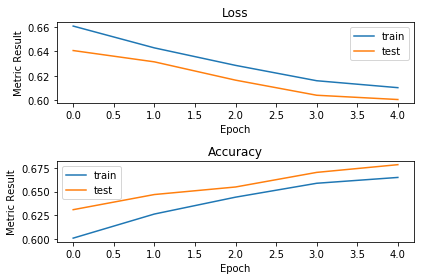

Nodes: 20
Activate 1: sigmoid
Activate 2: relu
Score: 0.7434933395876386
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6507 - acc: 0.6141 - val_loss: 0.6410 - val_acc: 0.6298
Epoch 2/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6379 - acc: 0.6330 - val_loss: 0.6304 - val_acc: 0.6397
Epoch 3/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6204 - acc: 0.6519 - val_loss: 0.6050 - val_acc: 0.6705
Epoch 4/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6055 - acc: 0.6693 - val_loss: 0.5975 - val_acc: 0.6772
Epoch 5/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6015 - acc: 0.6737 - val_loss: 0.5951 - val_acc: 0.6794


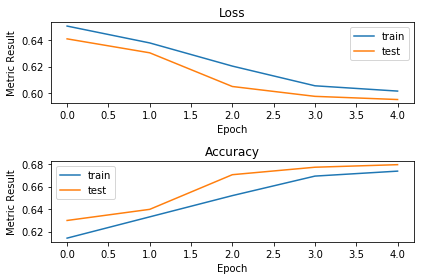

Nodes: 20
Activate 1: sigmoid
Activate 2: sigmoid
Score: 0.7447647444360685
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 0.6674 - acc: 0.5905 - val_loss: 0.6389 - val_acc: 0.6314
Epoch 2/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6229 - acc: 0.6500 - val_loss: 0.6061 - val_acc: 0.6685
Epoch 3/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6028 - acc: 0.6731 - val_loss: 0.5934 - val_acc: 0.6816
Epoch 4/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.5941 - acc: 0.6811 - val_loss: 0.6001 - val_acc: 0.6779
Epoch 5/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.5979 - acc: 0.6775 - val_loss: 0.5909 - val_acc: 0.6820


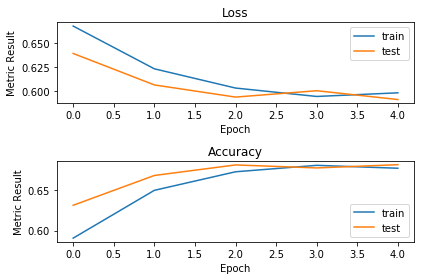

Nodes: 20
Activate 1: sigmoid
Activate 2: tanh
Score: 0.7498860023535637
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6713 - acc: 0.5861 - val_loss: 0.6449 - val_acc: 0.6275
Epoch 2/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6359 - acc: 0.6359 - val_loss: 0.6141 - val_acc: 0.6561
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6157 - acc: 0.6611 - val_loss: 0.6040 - val_acc: 0.6695
Epoch 4/5
2250000/2250000 [==============================] - 22s 10us/step - loss: 0.6073 - acc: 0.6689 - val_loss: 0.6081 - val_acc: 0.6739
Epoch 5/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6004 - acc: 0.6753 - val_loss: 0.5918 - val_acc: 0.6815


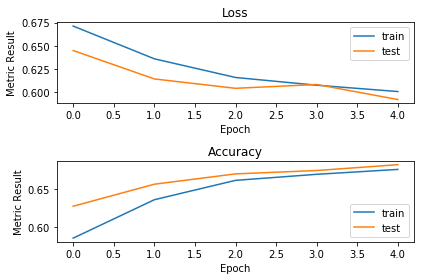

Nodes: 20
Activate 1: sigmoid
Activate 2: elu
Score: 0.7495406281446786
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.8103 - acc: 0.5158 - val_loss: 0.6843 - val_acc: 0.5678
Epoch 2/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6813 - acc: 0.5631 - val_loss: 0.6581 - val_acc: 0.6104
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6558 - acc: 0.6087 - val_loss: 0.6465 - val_acc: 0.6277
Epoch 4/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6437 - acc: 0.6246 - val_loss: 0.6362 - val_acc: 0.6336
Epoch 5/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6276 - acc: 0.6446 - val_loss: 0.6138 - val_acc: 0.6607


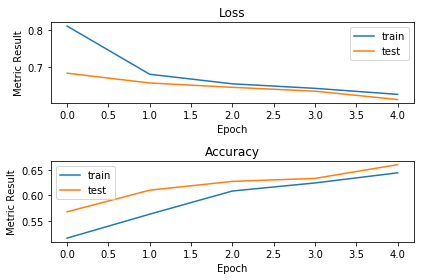

Nodes: 20
Activate 1: sigmoid
Activate 2: selu
Score: 0.7234365569868149
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6622 - acc: 0.6054 - val_loss: 0.6247 - val_acc: 0.6544
Epoch 2/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6508 - acc: 0.6209 - val_loss: 0.6217 - val_acc: 0.6493
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6157 - acc: 0.6617 - val_loss: 0.6019 - val_acc: 0.6722
Epoch 4/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6061 - acc: 0.6709 - val_loss: 0.5897 - val_acc: 0.6829
Epoch 5/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6007 - acc: 0.6760 - val_loss: 0.5885 - val_acc: 0.6853


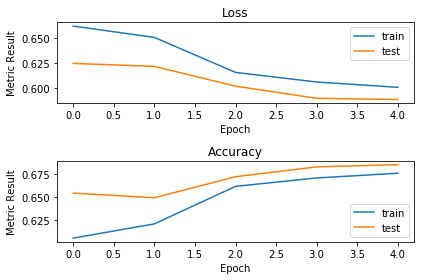

Nodes: 20
Activate 1: tanh
Activate 2: relu
Score: 0.7560304257477661
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6534 - acc: 0.6166 - val_loss: 0.6416 - val_acc: 0.6317
Epoch 2/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6333 - acc: 0.6393 - val_loss: 0.6182 - val_acc: 0.6606
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6054 - acc: 0.6703 - val_loss: 0.5948 - val_acc: 0.6797
Epoch 4/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.5911 - acc: 0.6829 - val_loss: 0.5824 - val_acc: 0.6898
Epoch 5/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.5834 - acc: 0.6894 - val_loss: 0.5762 - val_acc: 0.6935


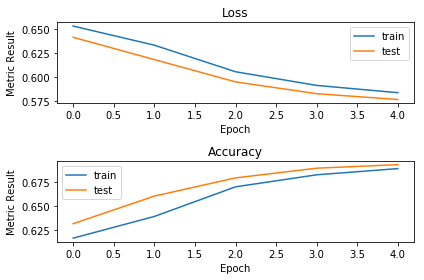

Nodes: 20
Activate 1: tanh
Activate 2: sigmoid
Score: 0.766997459494815
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6719 - acc: 0.5957 - val_loss: 0.6434 - val_acc: 0.6335
Epoch 2/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6647 - acc: 0.6048 - val_loss: 0.6453 - val_acc: 0.6271
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6684 - acc: 0.6113 - val_loss: 0.6618 - val_acc: 0.6154
Epoch 4/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6529 - acc: 0.6170 - val_loss: 0.6381 - val_acc: 0.6368
Epoch 5/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6281 - acc: 0.6459 - val_loss: 0.6112 - val_acc: 0.6631


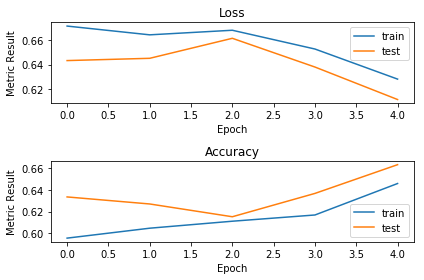

Nodes: 20
Activate 1: tanh
Activate 2: tanh
Score: 0.7276225790605526
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6799 - acc: 0.5932 - val_loss: 0.6553 - val_acc: 0.6132
Epoch 2/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6558 - acc: 0.6146 - val_loss: 0.6429 - val_acc: 0.6352
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6618 - acc: 0.6127 - val_loss: 0.6734 - val_acc: 0.5784
Epoch 4/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6579 - acc: 0.6123 - val_loss: 0.6713 - val_acc: 0.5919
Epoch 5/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6565 - acc: 0.6174 - val_loss: 0.6402 - val_acc: 0.6381


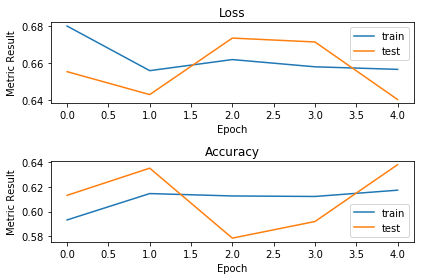

Nodes: 20
Activate 1: tanh
Activate 2: elu
Score: 0.686183925564959
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6852 - acc: 0.5875 - val_loss: 0.6507 - val_acc: 0.6206
Epoch 2/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6507 - acc: 0.6215 - val_loss: 0.6407 - val_acc: 0.6349
Epoch 3/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6354 - acc: 0.6416 - val_loss: 0.6095 - val_acc: 0.6648
Epoch 4/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6081 - acc: 0.6702 - val_loss: 0.6021 - val_acc: 0.6777
Epoch 5/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6160 - acc: 0.6641 - val_loss: 0.5946 - val_acc: 0.6804


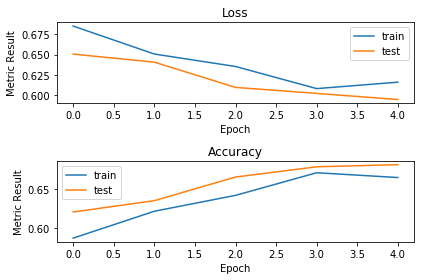

Nodes: 20
Activate 1: tanh
Activate 2: selu
Score: 0.7480921979037111
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6844 - acc: 0.5827 - val_loss: 0.6466 - val_acc: 0.6223
Epoch 2/5
2250000/2250000 [==============================] - 24s 10us/step - loss: 0.6498 - acc: 0.6184 - val_loss: 0.6245 - val_acc: 0.6461
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6278 - acc: 0.6469 - val_loss: 0.6186 - val_acc: 0.6571
Epoch 4/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 0.6642 - acc: 0.5920 - val_loss: 0.6416 - val_acc: 0.6325
Epoch 5/5
2250000/2250000 [==============================] - 24s 10us/step - loss: 0.6347 - acc: 0.6417 - val_loss: 0.6449 - val_acc: 0.6330


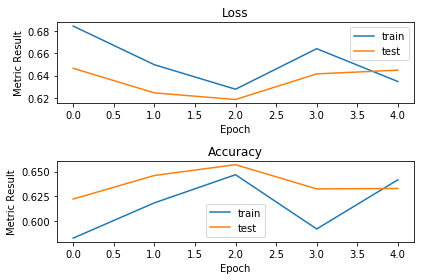

Nodes: 20
Activate 1: elu
Activate 2: relu
Score: 0.6714100885963915
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 8.5334 - acc: 0.4706 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 2/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 8.5334 - acc: 0.4706 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 3/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 8.5334 - acc: 0.4706 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 4/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 8.5334 - acc: 0.4706 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 5/5
2250000/2250000 [==============================] - 23s 10us/step - loss: 8.5334 - acc: 0.4706 - val_loss: 8.5504 - val_acc: 0.4695


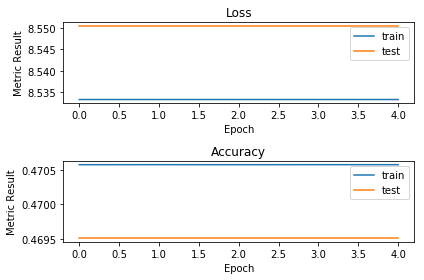

Nodes: 20
Activate 1: elu
Activate 2: sigmoid
Score: 0.5244133993011099
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 33s 15us/step - loss: 0.6777 - acc: 0.5934 - val_loss: 0.6436 - val_acc: 0.6333
Epoch 2/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6392 - acc: 0.6357 - val_loss: 0.6282 - val_acc: 0.6426
Epoch 3/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6225 - acc: 0.6541 - val_loss: 0.6163 - val_acc: 0.6616
Epoch 4/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6088 - acc: 0.6696 - val_loss: 0.5966 - val_acc: 0.6812
Epoch 5/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6336 - acc: 0.6470 - val_loss: 0.6081 - val_acc: 0.6642


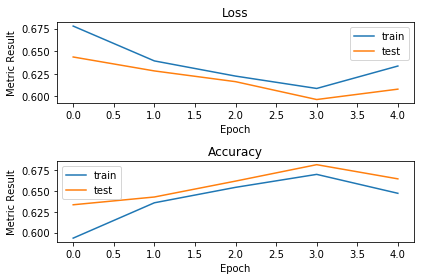

Nodes: 20
Activate 1: elu
Activate 2: tanh
Score: 0.7334465543542784
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 34s 15us/step - loss: 0.6850 - acc: 0.5834 - val_loss: 0.6492 - val_acc: 0.6232
Epoch 2/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6538 - acc: 0.6187 - val_loss: 0.6442 - val_acc: 0.6338
Epoch 3/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6554 - acc: 0.6180 - val_loss: 0.6407 - val_acc: 0.6394
Epoch 4/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6477 - acc: 0.6263 - val_loss: 0.6297 - val_acc: 0.6482
Epoch 5/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6269 - acc: 0.6547 - val_loss: 0.6158 - val_acc: 0.6630


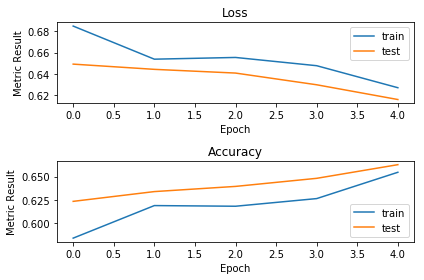

Nodes: 20
Activate 1: elu
Activate 2: elu
Score: 0.7274717174399441
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.6663 - acc: 0.6045 - val_loss: 0.6362 - val_acc: 0.6397
Epoch 2/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6390 - acc: 0.6353 - val_loss: 0.6172 - val_acc: 0.6575
Epoch 3/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6361 - acc: 0.6366 - val_loss: 0.6380 - val_acc: 0.6436
Epoch 4/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6219 - acc: 0.6567 - val_loss: 0.6092 - val_acc: 0.6678
Epoch 5/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6132 - acc: 0.6645 - val_loss: 0.6070 - val_acc: 0.6709


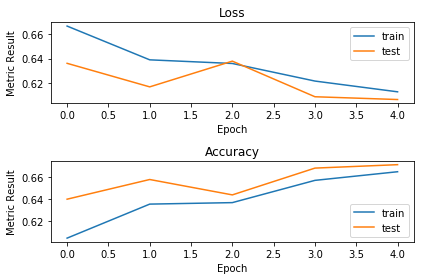

Nodes: 20
Activate 1: elu
Activate 2: selu
Score: 0.735316286310936
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 34s 15us/step - loss: 0.6790 - acc: 0.5932 - val_loss: 0.7018 - val_acc: 0.5309
Epoch 2/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6471 - acc: 0.6239 - val_loss: 0.6296 - val_acc: 0.6445
Epoch 3/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6275 - acc: 0.6496 - val_loss: 0.6207 - val_acc: 0.6551
Epoch 4/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6214 - acc: 0.6582 - val_loss: 0.6201 - val_acc: 0.6576
Epoch 5/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 0.6049 - acc: 0.6735 - val_loss: 0.5985 - val_acc: 0.6728


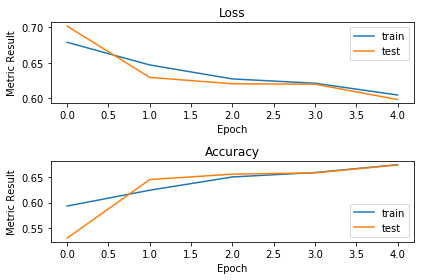

Nodes: 20
Activate 1: selu
Activate 2: relu
Score: 0.7508290448683248
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 35s 16us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 24s 11us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


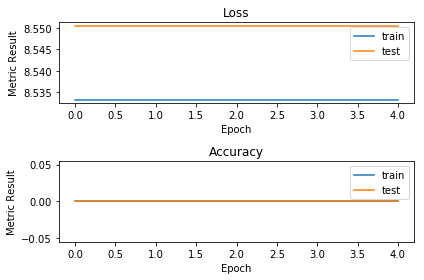

Nodes: 20
Activate 1: selu
Activate 2: sigmoid
Score: 0.4987090041839081
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.6640 - acc: 0.6099 - val_loss: 0.6538 - val_acc: 0.6214
Epoch 2/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6242 - acc: 0.6539 - val_loss: 0.6090 - val_acc: 0.6655
Epoch 3/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6106 - acc: 0.6688 - val_loss: 0.6566 - val_acc: 0.6077
Epoch 4/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6112 - acc: 0.6679 - val_loss: 0.5929 - val_acc: 0.6810
Epoch 5/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6017 - acc: 0.6758 - val_loss: 0.5876 - val_acc: 0.6848


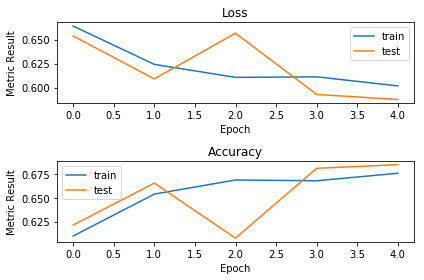

Nodes: 20
Activate 1: selu
Activate 2: tanh
Score: 0.7570601882543141
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 35s 16us/step - loss: 0.6779 - acc: 0.5991 - val_loss: 0.6577 - val_acc: 0.6112
Epoch 2/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6450 - acc: 0.6330 - val_loss: 0.6321 - val_acc: 0.6479
Epoch 3/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6354 - acc: 0.6475 - val_loss: 0.6339 - val_acc: 0.6497
Epoch 4/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6654 - acc: 0.6331 - val_loss: 0.6545 - val_acc: 0.6204
Epoch 5/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6214 - acc: 0.6592 - val_loss: 0.6095 - val_acc: 0.6663


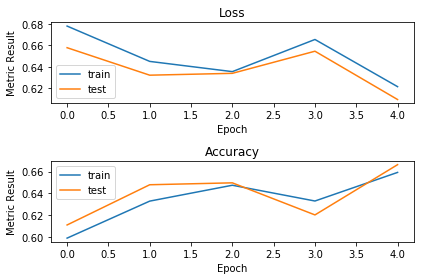

Nodes: 20
Activate 1: selu
Activate 2: elu
Score: 0.7367869284408596
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 36s 16us/step - loss: 0.6742 - acc: 0.5961 - val_loss: 0.6428 - val_acc: 0.6332
Epoch 2/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6357 - acc: 0.6416 - val_loss: 0.6108 - val_acc: 0.6615
Epoch 3/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6431 - acc: 0.6350 - val_loss: 0.6210 - val_acc: 0.6493
Epoch 4/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6280 - acc: 0.6518 - val_loss: 0.6097 - val_acc: 0.6671
Epoch 5/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6943 - acc: 0.6160 - val_loss: 0.6208 - val_acc: 0.6549


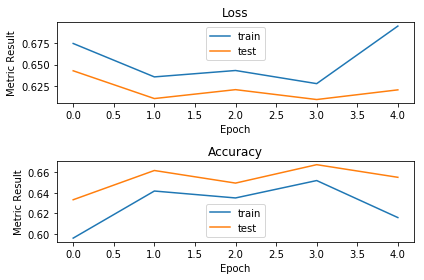

Nodes: 20
Activate 1: selu
Activate 2: selu
Score: 0.7188803981786084
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 36s 16us/step - loss: 0.6564 - acc: 0.6166 - val_loss: 0.6062 - val_acc: 0.6699
Epoch 2/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6023 - acc: 0.6738 - val_loss: 0.5874 - val_acc: 0.6852
Epoch 3/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6025 - acc: 0.6751 - val_loss: 0.5802 - val_acc: 0.6914
Epoch 4/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.5852 - acc: 0.6894 - val_loss: 0.5747 - val_acc: 0.6960
Epoch 5/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.5783 - acc: 0.6941 - val_loss: 0.5668 - val_acc: 0.7021


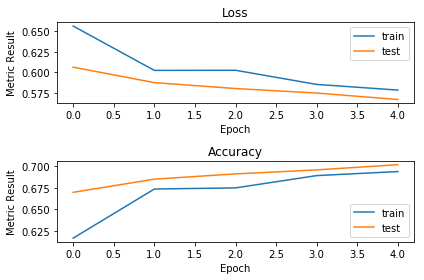

Nodes: 50
Activate 1: relu
Activate 2: relu
Score: 0.7777873318875087
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 36s 16us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


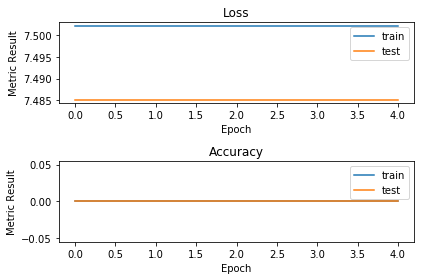

Nodes: 50
Activate 1: relu
Activate 2: sigmoid
Score: 0.509083468690904
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 37s 16us/step - loss: 0.6550 - acc: 0.6228 - val_loss: 0.6355 - val_acc: 0.6438
Epoch 2/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6505 - acc: 0.6256 - val_loss: 0.6769 - val_acc: 0.5690
Epoch 3/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6568 - acc: 0.6096 - val_loss: 0.6358 - val_acc: 0.6420
Epoch 4/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6420 - acc: 0.6362 - val_loss: 0.6369 - val_acc: 0.6451
Epoch 5/5
2250000/2250000 [==============================] - 25s 11us/step - loss: 0.6479 - acc: 0.6230 - val_loss: 0.6437 - val_acc: 0.6303


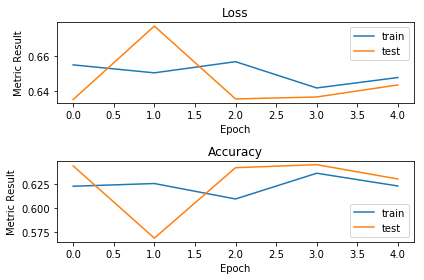

Nodes: 50
Activate 1: relu
Activate 2: tanh
Score: 0.678529002109261
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 36s 16us/step - loss: 0.6548 - acc: 0.6178 - val_loss: 0.6146 - val_acc: 0.6696
Epoch 2/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6292 - acc: 0.6508 - val_loss: 0.6137 - val_acc: 0.6684
Epoch 3/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6397 - acc: 0.6409 - val_loss: 0.6216 - val_acc: 0.6698
Epoch 4/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6216 - acc: 0.6589 - val_loss: 0.6048 - val_acc: 0.6766
Epoch 5/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6230 - acc: 0.6594 - val_loss: 0.6013 - val_acc: 0.6756


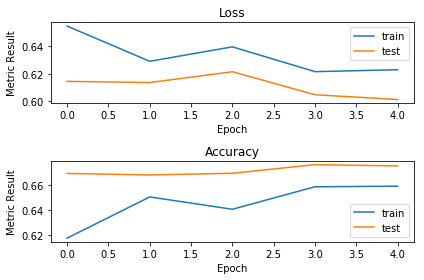

Nodes: 50
Activate 1: relu
Activate 2: elu
Score: 0.7412912953087181
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 38s 17us/step - loss: 0.6719 - acc: 0.6023 - val_loss: 0.6370 - val_acc: 0.6388
Epoch 2/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6380 - acc: 0.6367 - val_loss: 0.6092 - val_acc: 0.6662
Epoch 3/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6188 - acc: 0.6585 - val_loss: 0.5962 - val_acc: 0.6793
Epoch 4/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6082 - acc: 0.6720 - val_loss: 0.5923 - val_acc: 0.6835
Epoch 5/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6031 - acc: 0.6752 - val_loss: 0.5905 - val_acc: 0.6826


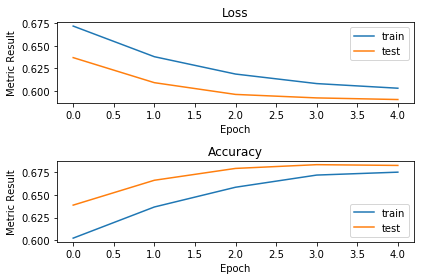

Nodes: 50
Activate 1: relu
Activate 2: selu
Score: 0.7541083634297631
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 37s 16us/step - loss: 0.6593 - acc: 0.6060 - val_loss: 0.6494 - val_acc: 0.6119
Epoch 2/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6243 - acc: 0.6534 - val_loss: 0.5947 - val_acc: 0.6821
Epoch 3/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6041 - acc: 0.6743 - val_loss: 0.5887 - val_acc: 0.6863
Epoch 4/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6032 - acc: 0.6740 - val_loss: 0.6069 - val_acc: 0.6693
Epoch 5/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.5980 - acc: 0.6779 - val_loss: 0.5885 - val_acc: 0.6855


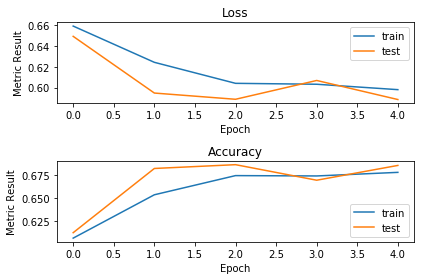

Nodes: 50
Activate 1: sigmoid
Activate 2: relu
Score: 0.7563208469642542
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 38s 17us/step - loss: 1.3858 - acc: 0.5758 - val_loss: 0.6479 - val_acc: 0.6211
Epoch 2/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6434 - acc: 0.6261 - val_loss: 0.6271 - val_acc: 0.6473
Epoch 3/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6174 - acc: 0.6585 - val_loss: 0.6174 - val_acc: 0.6594
Epoch 4/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6164 - acc: 0.6613 - val_loss: 0.5983 - val_acc: 0.6758
Epoch 5/5
2250000/2250000 [==============================] - 26s 11us/step - loss: 0.6080 - acc: 0.6692 - val_loss: 0.5932 - val_acc: 0.6816


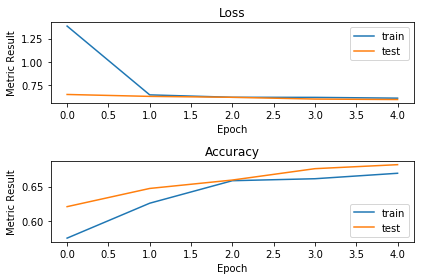

Nodes: 50
Activate 1: sigmoid
Activate 2: sigmoid
Score: 0.7493566449635357
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 37s 17us/step - loss: 0.6582 - acc: 0.6058 - val_loss: 0.6343 - val_acc: 0.6360
Epoch 2/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6250 - acc: 0.6491 - val_loss: 0.6112 - val_acc: 0.6615
Epoch 3/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6109 - acc: 0.6656 - val_loss: 0.5974 - val_acc: 0.6767
Epoch 4/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.5962 - acc: 0.6796 - val_loss: 0.5885 - val_acc: 0.6877
Epoch 5/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.5927 - acc: 0.6819 - val_loss: 0.5940 - val_acc: 0.6899


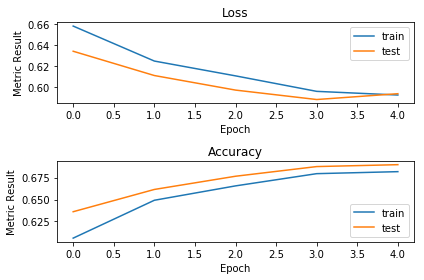

Nodes: 50
Activate 1: sigmoid
Activate 2: tanh
Score: 0.7568705080739574
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.6643 - acc: 0.5997 - val_loss: 0.6436 - val_acc: 0.6274
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6357 - acc: 0.6369 - val_loss: 0.6180 - val_acc: 0.6566
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6185 - acc: 0.6574 - val_loss: 0.6074 - val_acc: 0.6670
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6064 - acc: 0.6700 - val_loss: 0.5956 - val_acc: 0.6795
Epoch 5/5
2250000/2250000 [==============================] - 26s 12us/step - loss: 0.6047 - acc: 0.6718 - val_loss: 0.5929 - val_acc: 0.6826


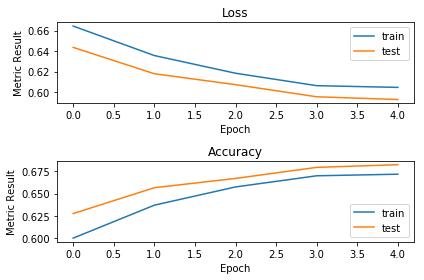

Nodes: 50
Activate 1: sigmoid
Activate 2: elu
Score: 0.7498140347166258
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.8241 - acc: 0.5374 - val_loss: 0.6629 - val_acc: 0.6026
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6641 - acc: 0.5993 - val_loss: 0.6465 - val_acc: 0.6251
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6536 - acc: 0.6152 - val_loss: 0.6424 - val_acc: 0.6319
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6634 - acc: 0.6063 - val_loss: 0.6365 - val_acc: 0.6367
Epoch 5/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6346 - acc: 0.6362 - val_loss: 0.6292 - val_acc: 0.6471


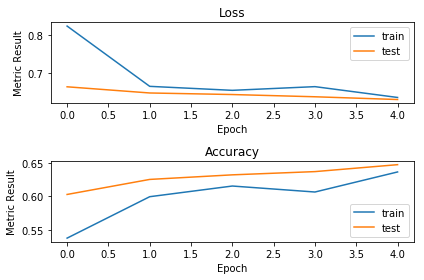

Nodes: 50
Activate 1: sigmoid
Activate 2: selu
Score: 0.7038544402480383
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.6359 - acc: 0.6398 - val_loss: 0.6109 - val_acc: 0.6675
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6112 - acc: 0.6671 - val_loss: 0.5923 - val_acc: 0.6844
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6314 - acc: 0.6506 - val_loss: 0.6051 - val_acc: 0.6765
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6393 - acc: 0.6392 - val_loss: 0.6059 - val_acc: 0.6699
Epoch 5/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6206 - acc: 0.6599 - val_loss: 0.5962 - val_acc: 0.6793


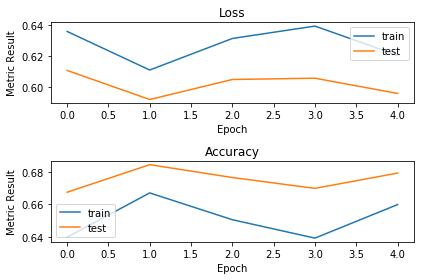

Nodes: 50
Activate 1: tanh
Activate 2: relu
Score: 0.746924045483896
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.6682 - acc: 0.5978 - val_loss: 0.6481 - val_acc: 0.6250
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6593 - acc: 0.6107 - val_loss: 0.6458 - val_acc: 0.6263
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.7516 - acc: 0.5578 - val_loss: 0.6789 - val_acc: 0.5735
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6587 - acc: 0.6061 - val_loss: 0.6433 - val_acc: 0.6286
Epoch 5/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6450 - acc: 0.6263 - val_loss: 0.6365 - val_acc: 0.6370


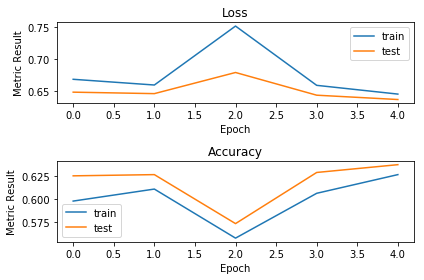

Nodes: 50
Activate 1: tanh
Activate 2: sigmoid
Score: 0.6859574701452221
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.6646 - acc: 0.6032 - val_loss: 0.6461 - val_acc: 0.6294
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6440 - acc: 0.6300 - val_loss: 0.6234 - val_acc: 0.6531
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6254 - acc: 0.6555 - val_loss: 0.5996 - val_acc: 0.6771
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6318 - acc: 0.6495 - val_loss: 0.6401 - val_acc: 0.6358
Epoch 5/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6115 - acc: 0.6668 - val_loss: 0.6005 - val_acc: 0.6746


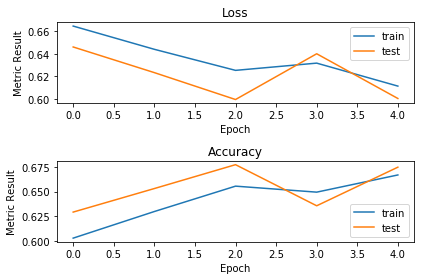

Nodes: 50
Activate 1: tanh
Activate 2: tanh
Score: 0.7398013123413831
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.6680 - acc: 0.6060 - val_loss: 0.6554 - val_acc: 0.6160
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6655 - acc: 0.6093 - val_loss: 0.8690 - val_acc: 0.5587
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 1.3627 - acc: 0.5418 - val_loss: 0.6485 - val_acc: 0.6228
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6474 - acc: 0.6259 - val_loss: 0.6393 - val_acc: 0.6364
Epoch 5/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6467 - acc: 0.6298 - val_loss: 0.6402 - val_acc: 0.6377


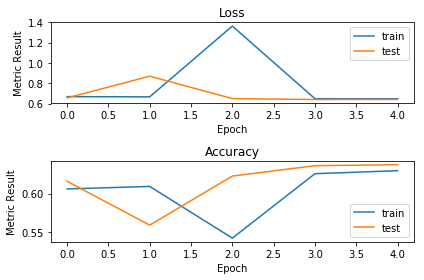

Nodes: 50
Activate 1: tanh
Activate 2: elu
Score: 0.6865933473901018
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.6995 - acc: 0.5850 - val_loss: 0.6442 - val_acc: 0.6312
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6497 - acc: 0.6219 - val_loss: 0.6311 - val_acc: 0.6464
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 7.3342 - acc: 0.0982 - val_loss: 7.5885 - val_acc: 0.1316
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 7.4864 - acc: 0.0039 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


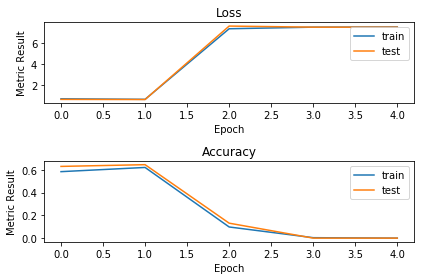

Nodes: 50
Activate 1: tanh
Activate 2: selu
Score: 0.514088368425449
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 41s 18us/step - loss: 0.6731 - acc: 0.6027 - val_loss: 0.6345 - val_acc: 0.6443
Epoch 2/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6409 - acc: 0.6397 - val_loss: 0.6961 - val_acc: 0.5324
Epoch 3/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6381 - acc: 0.6424 - val_loss: 0.6336 - val_acc: 0.6431
Epoch 4/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6234 - acc: 0.6569 - val_loss: 0.6044 - val_acc: 0.6727
Epoch 5/5
2250000/2250000 [==============================] - 27s 12us/step - loss: 0.6353 - acc: 0.6487 - val_loss: 0.6848 - val_acc: 0.5800


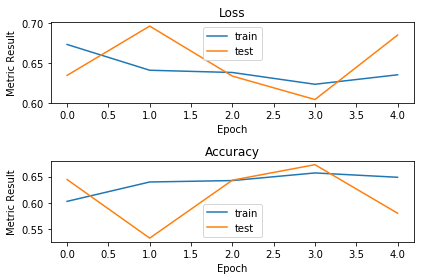

Nodes: 50
Activate 1: elu
Activate 2: relu
Score: 0.5777237313077339
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 41s 18us/step - loss: 0.6598 - acc: 0.6073 - val_loss: 0.6473 - val_acc: 0.6277
Epoch 2/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6536 - acc: 0.6179 - val_loss: 0.6446 - val_acc: 0.6317
Epoch 3/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6430 - acc: 0.6316 - val_loss: 0.6352 - val_acc: 0.6394
Epoch 4/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6309 - acc: 0.6440 - val_loss: 0.6156 - val_acc: 0.6532
Epoch 5/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6074 - acc: 0.6681 - val_loss: 0.6243 - val_acc: 0.6549


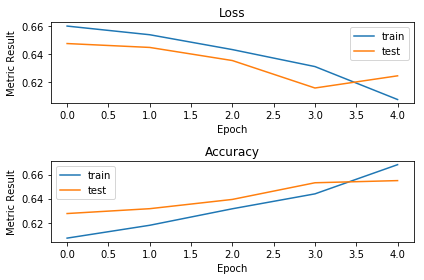

Nodes: 50
Activate 1: elu
Activate 2: sigmoid
Score: 0.7100890352404451
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 41s 18us/step - loss: 0.6538 - acc: 0.6221 - val_loss: 0.7069 - val_acc: 0.5380
Epoch 2/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6455 - acc: 0.6314 - val_loss: 0.6724 - val_acc: 0.5898
Epoch 3/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6574 - acc: 0.6233 - val_loss: 0.6156 - val_acc: 0.6572
Epoch 4/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6794 - acc: 0.6313 - val_loss: 0.6585 - val_acc: 0.6177
Epoch 5/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6381 - acc: 0.6366 - val_loss: 0.6096 - val_acc: 0.6643


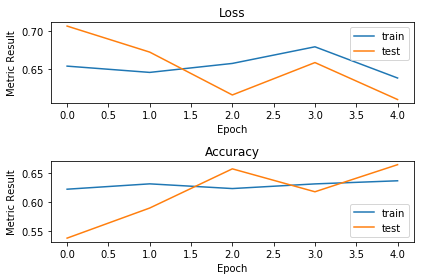

Nodes: 50
Activate 1: elu
Activate 2: tanh
Score: 0.72969220506219
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 41s 18us/step - loss: 0.6759 - acc: 0.6046 - val_loss: 0.6407 - val_acc: 0.6425
Epoch 2/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6475 - acc: 0.6323 - val_loss: 0.6282 - val_acc: 0.6500
Epoch 3/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6419 - acc: 0.6444 - val_loss: 0.6196 - val_acc: 0.6668
Epoch 4/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6435 - acc: 0.6409 - val_loss: 0.6230 - val_acc: 0.6540
Epoch 5/5
2250000/2250000 [==============================] - 28s 12us/step - loss: 0.6505 - acc: 0.6474 - val_loss: 0.6503 - val_acc: 0.6410


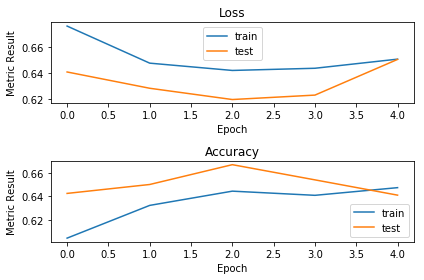

Nodes: 50
Activate 1: elu
Activate 2: elu
Score: 0.6926256850758389
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 42s 19us/step - loss: 0.6672 - acc: 0.6137 - val_loss: 0.6388 - val_acc: 0.6313
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6311 - acc: 0.6468 - val_loss: 0.6104 - val_acc: 0.6669
Epoch 3/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6640 - acc: 0.6309 - val_loss: 0.6227 - val_acc: 0.6485
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6075 - acc: 0.6715 - val_loss: 0.9076 - val_acc: 0.5133
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6745 - acc: 0.6244 - val_loss: 0.6521 - val_acc: 0.6252


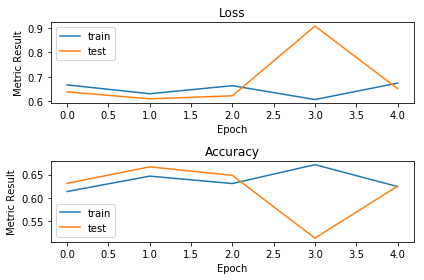

Nodes: 50
Activate 1: elu
Activate 2: selu
Score: 0.6689160282426982
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 42s 19us/step - loss: 0.6599 - acc: 0.6220 - val_loss: 0.6128 - val_acc: 0.6627
Epoch 2/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6228 - acc: 0.6574 - val_loss: 0.6109 - val_acc: 0.6746
Epoch 3/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6840 - acc: 0.6521 - val_loss: 0.6798 - val_acc: 0.5799
Epoch 4/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6817 - acc: 0.6097 - val_loss: 0.6705 - val_acc: 0.5951
Epoch 5/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 1.0337 - acc: 0.5714 - val_loss: 0.6438 - val_acc: 0.6281


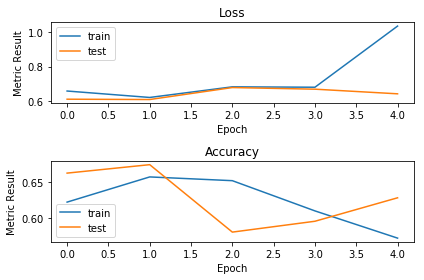

Nodes: 50
Activate 1: selu
Activate 2: relu
Score: 0.6978416781822838
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 42s 19us/step - loss: 0.6509 - acc: 0.6239 - val_loss: 0.6554 - val_acc: 0.6254
Epoch 2/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6258 - acc: 0.6516 - val_loss: 0.6065 - val_acc: 0.6730
Epoch 3/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6305 - acc: 0.6508 - val_loss: 0.6061 - val_acc: 0.6701
Epoch 4/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6117 - acc: 0.6664 - val_loss: 0.5922 - val_acc: 0.6830
Epoch 5/5
2250000/2250000 [==============================] - 28s 13us/step - loss: 0.6256 - acc: 0.6537 - val_loss: 0.6095 - val_acc: 0.6655


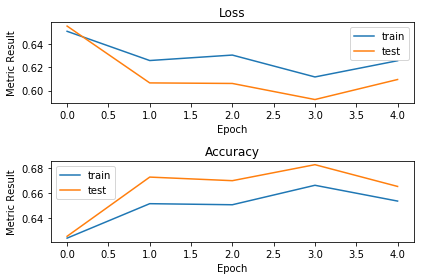

Nodes: 50
Activate 1: selu
Activate 2: sigmoid
Score: 0.7286644467763517
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 43s 19us/step - loss: 0.6628 - acc: 0.6118 - val_loss: 0.6469 - val_acc: 0.6325
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6230 - acc: 0.6561 - val_loss: 0.6040 - val_acc: 0.6769
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6204 - acc: 0.6647 - val_loss: 0.6900 - val_acc: 0.5569
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6401 - acc: 0.6346 - val_loss: 0.6243 - val_acc: 0.6555
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6213 - acc: 0.6599 - val_loss: 0.6934 - val_acc: 0.5306


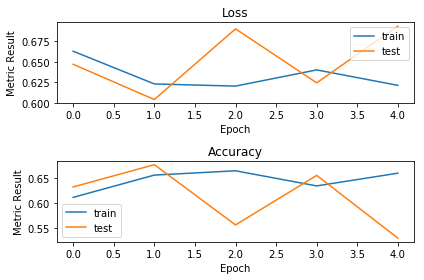

Nodes: 50
Activate 1: selu
Activate 2: tanh
Score: 0.5325937336178909
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 44s 19us/step - loss: 0.6668 - acc: 0.6064 - val_loss: 0.6400 - val_acc: 0.6395
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6500 - acc: 0.6276 - val_loss: 0.6363 - val_acc: 0.6432
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6413 - acc: 0.6394 - val_loss: 0.6117 - val_acc: 0.6670
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6676 - acc: 0.6432 - val_loss: 0.6159 - val_acc: 0.6634
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6305 - acc: 0.6517 - val_loss: 0.6106 - val_acc: 0.6687


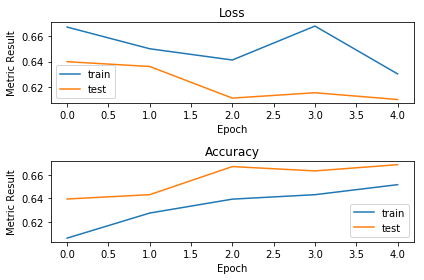

Nodes: 50
Activate 1: selu
Activate 2: elu
Score: 0.735009739732342
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 44s 20us/step - loss: 0.6357 - acc: 0.6410 - val_loss: 0.5989 - val_acc: 0.6780
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6292 - acc: 0.6622 - val_loss: 0.6503 - val_acc: 0.6491
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6360 - acc: 0.6478 - val_loss: 0.5986 - val_acc: 0.6807
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 4.4169 - acc: 0.3542 - val_loss: 8.5503 - val_acc: 6.0000e-05
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 7.8268 - acc: 0.0082 - val_loss: 7.4840 - val_acc: 2.0000e-04


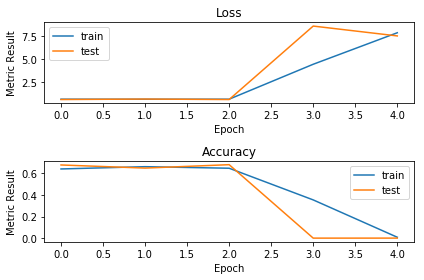

Nodes: 50
Activate 1: selu
Activate 2: selu
Score: 0.49590225051402625
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 43s 19us/step - loss: 0.6535 - acc: 0.6205 - val_loss: 0.6187 - val_acc: 0.6644
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6117 - acc: 0.6672 - val_loss: 0.5931 - val_acc: 0.6831
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.5976 - acc: 0.6770 - val_loss: 0.5849 - val_acc: 0.6880
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6154 - acc: 0.6611 - val_loss: 0.6100 - val_acc: 0.6722
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6063 - acc: 0.6730 - val_loss: 0.5837 - val_acc: 0.6903


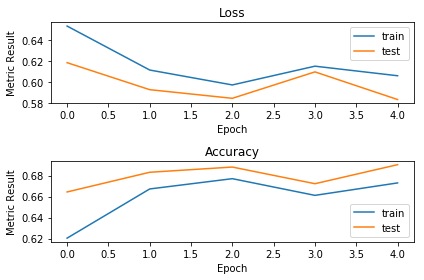

Nodes: 100
Activate 1: relu
Activate 2: relu
Score: 0.7612024020145616
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 44s 20us/step - loss: 0.6646 - acc: 0.6282 - val_loss: 0.6333 - val_acc: 0.6474
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 7.6203 - acc: 0.0746 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 8.5334 - acc: 8.8889e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00


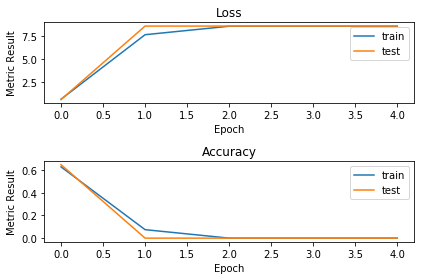

Nodes: 100
Activate 1: relu
Activate 2: sigmoid
Score: 0.49979116230352044
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 44s 20us/step - loss: 0.6619 - acc: 0.6149 - val_loss: 0.6770 - val_acc: 0.5844
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6360 - acc: 0.6431 - val_loss: 0.6282 - val_acc: 0.6531
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6287 - acc: 0.6496 - val_loss: 0.6189 - val_acc: 0.6688
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6162 - acc: 0.6636 - val_loss: 0.6139 - val_acc: 0.6633
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6473 - acc: 0.6329 - val_loss: 0.6137 - val_acc: 0.6670


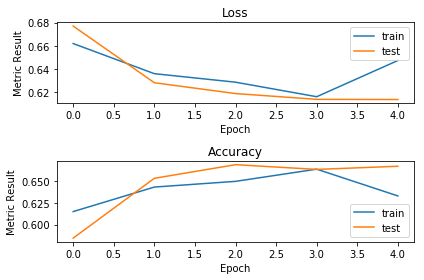

Nodes: 100
Activate 1: relu
Activate 2: tanh
Score: 0.7262776248892547
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 44s 20us/step - loss: 0.6845 - acc: 0.6107 - val_loss: 0.6361 - val_acc: 0.6435
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6511 - acc: 0.6263 - val_loss: 0.6796 - val_acc: 0.5627
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6626 - acc: 0.5996 - val_loss: 0.6447 - val_acc: 0.6246
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6448 - acc: 0.6276 - val_loss: 0.6223 - val_acc: 0.6488
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6378 - acc: 0.6363 - val_loss: 0.6302 - val_acc: 0.6465


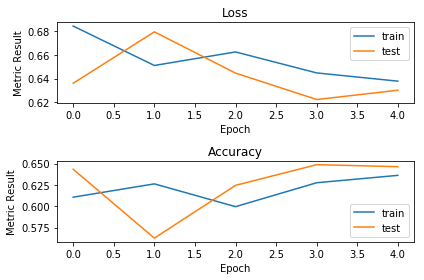

Nodes: 100
Activate 1: relu
Activate 2: elu
Score: 0.6997090154995949
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 45s 20us/step - loss: 0.6386 - acc: 0.6423 - val_loss: 0.6117 - val_acc: 0.6709
Epoch 2/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6252 - acc: 0.6526 - val_loss: 0.6044 - val_acc: 0.6649
Epoch 3/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6308 - acc: 0.6479 - val_loss: 0.6070 - val_acc: 0.6741
Epoch 4/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6040 - acc: 0.6741 - val_loss: 0.5899 - val_acc: 0.6841
Epoch 5/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6170 - acc: 0.6618 - val_loss: 0.6056 - val_acc: 0.6758


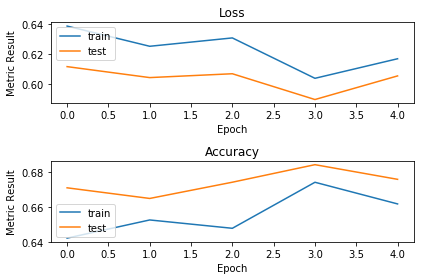

Nodes: 100
Activate 1: relu
Activate 2: selu
Score: 0.7429244827772354
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 45s 20us/step - loss: 0.6549 - acc: 0.6110 - val_loss: 0.6275 - val_acc: 0.6473
Epoch 2/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6281 - acc: 0.6516 - val_loss: 0.6087 - val_acc: 0.6691
Epoch 3/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6089 - acc: 0.6685 - val_loss: 0.5942 - val_acc: 0.6798
Epoch 4/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.5985 - acc: 0.6772 - val_loss: 0.5905 - val_acc: 0.6829
Epoch 5/5
2250000/2250000 [==============================] - 29s 13us/step - loss: 0.6198 - acc: 0.6545 - val_loss: 0.6121 - val_acc: 0.6590


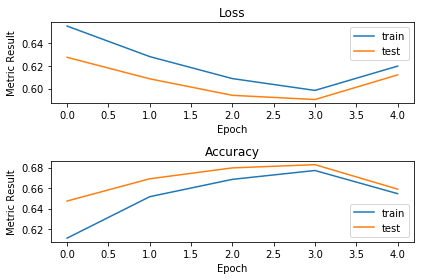

Nodes: 100
Activate 1: sigmoid
Activate 2: relu
Score: 0.7475505586776858
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 45s 20us/step - loss: 8.5334 - acc: 0.3896 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 2/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 8.5334 - acc: 0.3892 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 3/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 8.5334 - acc: 0.3890 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 4/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 8.5334 - acc: 0.3892 - val_loss: 8.5504 - val_acc: 0.4695
Epoch 5/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 8.5334 - acc: 0.3894 - val_loss: 8.5504 - val_acc: 0.4695


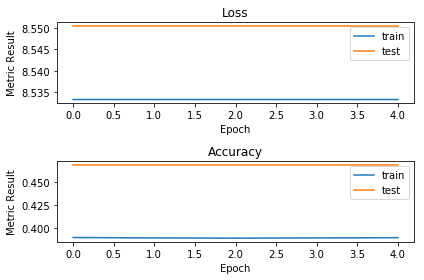

Nodes: 100
Activate 1: sigmoid
Activate 2: sigmoid
Score: 0.5266120451526801
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 47s 21us/step - loss: 8.5334 - acc: 5.2444e-05 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


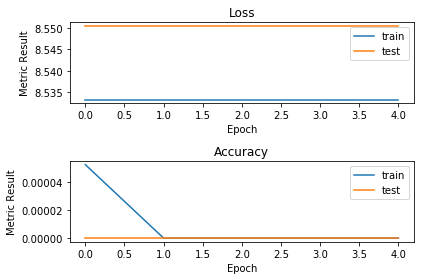

Nodes: 100
Activate 1: sigmoid
Activate 2: tanh
Score: 0.5419153075644272
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 46s 21us/step - loss: 0.7476 - acc: 0.5706 - val_loss: 0.6505 - val_acc: 0.6221
Epoch 2/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6584 - acc: 0.6114 - val_loss: 0.6423 - val_acc: 0.6291
Epoch 3/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6377 - acc: 0.6328 - val_loss: 0.6184 - val_acc: 0.6525
Epoch 4/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6148 - acc: 0.6602 - val_loss: 0.6027 - val_acc: 0.6749
Epoch 5/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6325 - acc: 0.6451 - val_loss: 0.6151 - val_acc: 0.6549


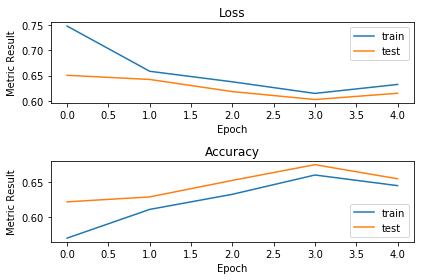

Nodes: 100
Activate 1: sigmoid
Activate 2: elu
Score: 0.7331816905720298
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 47s 21us/step - loss: 0.7542 - acc: 0.5618 - val_loss: 0.6519 - val_acc: 0.6155
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6506 - acc: 0.6177 - val_loss: 0.6364 - val_acc: 0.6352
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6478 - acc: 0.6313 - val_loss: 0.6207 - val_acc: 0.6571
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6222 - acc: 0.6557 - val_loss: 0.6043 - val_acc: 0.6739
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6295 - acc: 0.6491 - val_loss: 0.6004 - val_acc: 0.6768


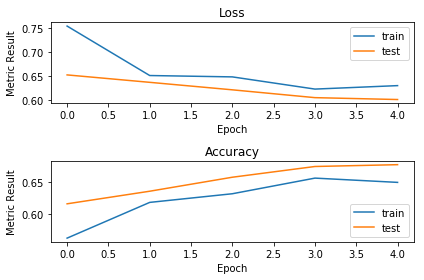

Nodes: 100
Activate 1: sigmoid
Activate 2: selu
Score: 0.7425606345617742
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 48s 21us/step - loss: 0.6498 - acc: 0.6268 - val_loss: 0.6010 - val_acc: 0.6767
Epoch 2/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 0.7133 - acc: 0.5993 - val_loss: 0.6459 - val_acc: 0.6285
Epoch 3/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6804 - acc: 0.5921 - val_loss: 0.6421 - val_acc: 0.6319
Epoch 4/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 0.6402 - acc: 0.6361 - val_loss: 0.6385 - val_acc: 0.6513
Epoch 5/5
2250000/2250000 [==============================] - 30s 13us/step - loss: 0.6487 - acc: 0.6358 - val_loss: 0.6150 - val_acc: 0.6588


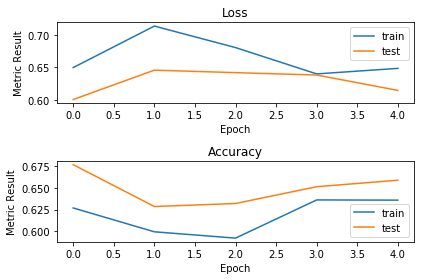

Nodes: 100
Activate 1: tanh
Activate 2: relu
Score: 0.7267292298755957
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 47s 21us/step - loss: 8.5334 - acc: 0.3317 - val_loss: 8.5504 - val_acc: 0.3368
Epoch 2/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 8.5334 - acc: 0.3316 - val_loss: 8.5504 - val_acc: 0.3368
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 8.5334 - acc: 0.3317 - val_loss: 8.5504 - val_acc: 0.3368
Epoch 4/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 8.5334 - acc: 0.3317 - val_loss: 8.5504 - val_acc: 0.3368
Epoch 5/5
2250000/2250000 [==============================] - 30s 14us/step - loss: 8.5334 - acc: 0.3315 - val_loss: 8.5504 - val_acc: 0.3368


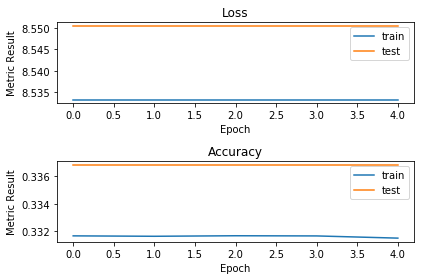

Nodes: 100
Activate 1: tanh
Activate 2: sigmoid
Score: 0.5175483394807778
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 48s 21us/step - loss: 0.6826 - acc: 0.6035 - val_loss: 0.6451 - val_acc: 0.6316
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6472 - acc: 0.6347 - val_loss: 0.6263 - val_acc: 0.6492
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6639 - acc: 0.6286 - val_loss: 0.6153 - val_acc: 0.6588
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6056 - acc: 0.6707 - val_loss: 0.5904 - val_acc: 0.6838
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6177 - acc: 0.6603 - val_loss: 0.6052 - val_acc: 0.6714


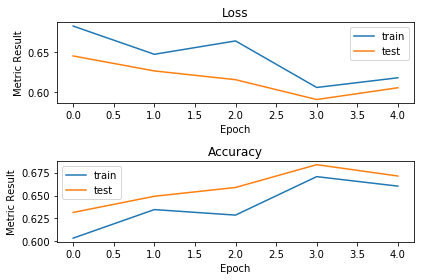

Nodes: 100
Activate 1: tanh
Activate 2: tanh
Score: 0.7348359180956471
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 48s 21us/step - loss: 0.6968 - acc: 0.6024 - val_loss: 0.6439 - val_acc: 0.6328
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6493 - acc: 0.6292 - val_loss: 1.2841 - val_acc: 0.4763
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6797 - acc: 0.6121 - val_loss: 0.6626 - val_acc: 0.6095
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6407 - acc: 0.6392 - val_loss: 0.6240 - val_acc: 0.6586
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6184 - acc: 0.6603 - val_loss: 0.5952 - val_acc: 0.6830


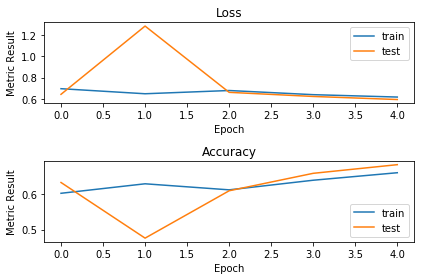

Nodes: 100
Activate 1: tanh
Activate 2: elu
Score: 0.7520238687455726
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 48s 21us/step - loss: 4.4527 - acc: 0.2805 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


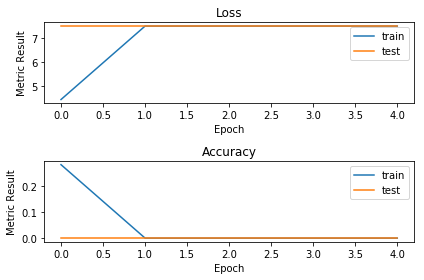

Nodes: 100
Activate 1: tanh
Activate 2: selu
Score: 0.5209791781842302
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 49s 22us/step - loss: 0.7962 - acc: 0.6019 - val_loss: 0.6539 - val_acc: 0.6198
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.7468 - acc: 0.6115 - val_loss: 0.6285 - val_acc: 0.6442
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6357 - acc: 0.6445 - val_loss: 0.6154 - val_acc: 0.6619
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6386 - acc: 0.6425 - val_loss: 0.6846 - val_acc: 0.5876
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6359 - acc: 0.6479 - val_loss: 0.6020 - val_acc: 0.6701


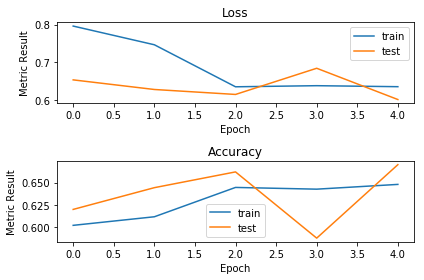

Nodes: 100
Activate 1: elu
Activate 2: relu
Score: 0.7464029549785254
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 49s 22us/step - loss: 0.6627 - acc: 0.6083 - val_loss: 0.6675 - val_acc: 0.5860
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6491 - acc: 0.6268 - val_loss: 0.6307 - val_acc: 0.6473
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6259 - acc: 0.6537 - val_loss: 0.6009 - val_acc: 0.6735
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.5990 - acc: 0.6786 - val_loss: 0.5887 - val_acc: 0.6891
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6089 - acc: 0.6695 - val_loss: 0.5847 - val_acc: 0.6915


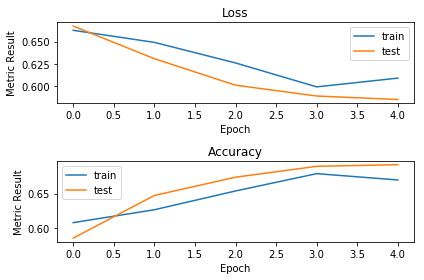

Nodes: 100
Activate 1: elu
Activate 2: sigmoid
Score: 0.7633456968856097
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 50s 22us/step - loss: 0.6786 - acc: 0.6017 - val_loss: 0.6614 - val_acc: 0.6092
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 2.5180 - acc: 0.4452 - val_loss: 0.6455 - val_acc: 0.6276
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6470 - acc: 0.6246 - val_loss: 0.6194 - val_acc: 0.6545
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6194 - acc: 0.6577 - val_loss: 0.6360 - val_acc: 0.6400
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 0.6223 - acc: 0.6556 - val_loss: 0.5942 - val_acc: 0.6792


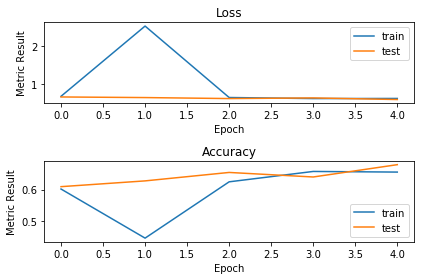

Nodes: 100
Activate 1: elu
Activate 2: tanh
Score: 0.7500503732713367
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 48s 21us/step - loss: 0.6667 - acc: 0.6079 - val_loss: 0.6487 - val_acc: 0.6304
Epoch 2/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 6.5514 - acc: 0.0903 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 31s 14us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


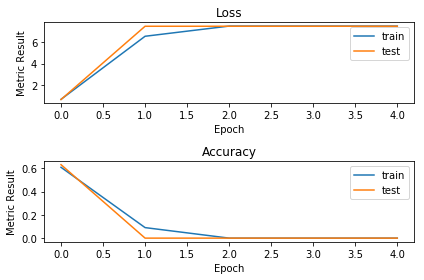

Nodes: 100
Activate 1: elu
Activate 2: elu
Score: 0.476003105389804
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 50s 22us/step - loss: 5.2012 - acc: 0.1906 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 7.5020 - acc: 4.4444e-07 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 7.5020 - acc: 4.4444e-07 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 7.5020 - acc: 4.4444e-07 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 7.5020 - acc: 4.4444e-07 - val_loss: 7.4852 - val_acc: 0.0000e+00


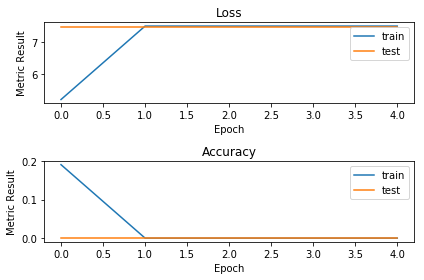

Nodes: 100
Activate 1: elu
Activate 2: selu
Score: 0.46979946169812686
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 50s 22us/step - loss: 0.6437 - acc: 0.6363 - val_loss: 0.6090 - val_acc: 0.6681
Epoch 2/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6365 - acc: 0.6476 - val_loss: 0.6189 - val_acc: 0.6564
Epoch 3/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6505 - acc: 0.6369 - val_loss: 0.6014 - val_acc: 0.6738
Epoch 4/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6070 - acc: 0.6735 - val_loss: 0.5883 - val_acc: 0.6881
Epoch 5/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6222 - acc: 0.6621 - val_loss: 0.6074 - val_acc: 0.6684


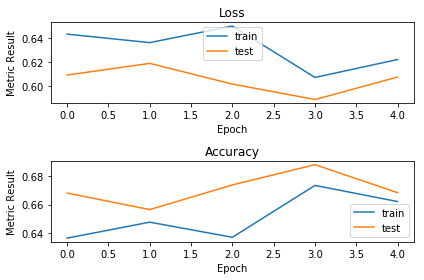

Nodes: 100
Activate 1: selu
Activate 2: relu
Score: 0.7342998735242157
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 51s 23us/step - loss: 0.6564 - acc: 0.6162 - val_loss: 0.9366 - val_acc: 0.5536
Epoch 2/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6450 - acc: 0.6296 - val_loss: 0.6396 - val_acc: 0.6373
Epoch 3/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6213 - acc: 0.6570 - val_loss: 0.6031 - val_acc: 0.6684
Epoch 4/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6057 - acc: 0.6711 - val_loss: 0.5849 - val_acc: 0.6908
Epoch 5/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 0.6004 - acc: 0.6763 - val_loss: 0.5789 - val_acc: 0.6929


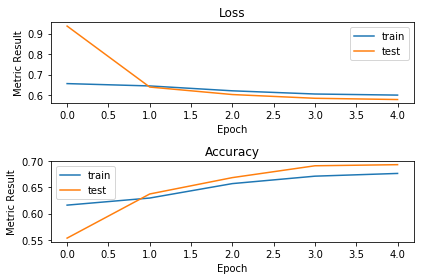

Nodes: 100
Activate 1: selu
Activate 2: sigmoid
Score: 0.7646092494293762
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 51s 23us/step - loss: 2.5865 - acc: 0.4358 - val_loss: 7.4852 - val_acc: 1.6000e-05
Epoch 2/5
2250000/2250000 [==============================] - 33s 14us/step - loss: 7.5020 - acc: 2.1333e-05 - val_loss: 7.4852 - val_acc: 1.6000e-05
Epoch 3/5
2250000/2250000 [==============================] - 33s 14us/step - loss: 7.4972 - acc: 0.0016 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 33s 14us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


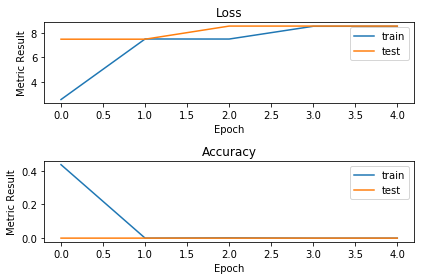

Nodes: 100
Activate 1: selu
Activate 2: tanh
Score: 0.5353028684528697
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 52s 23us/step - loss: 0.6759 - acc: 0.6006 - val_loss: 0.6376 - val_acc: 0.6445
Epoch 2/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 6.1725 - acc: 0.1761 - val_loss: 7.3447 - val_acc: 0.0140
Epoch 3/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 8.2884 - acc: 0.0057 - val_loss: 8.4501 - val_acc: 0.0107
Epoch 4/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 8.0870 - acc: 0.0043 - val_loss: 8.3259 - val_acc: 0.0182
Epoch 5/5
2250000/2250000 [==============================] - 32s 14us/step - loss: 8.5023 - acc: 0.0019 - val_loss: 8.5502 - val_acc: 8.8000e-05


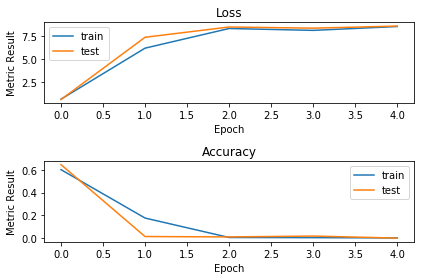

Nodes: 100
Activate 1: selu
Activate 2: elu
Score: 0.4966857898940508
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 51s 23us/step - loss: 5.6732 - acc: 0.2130 - val_loss: 8.5269 - val_acc: 0.0026
Epoch 2/5
2250000/2250000 [==============================] - 33s 15us/step - loss: 8.4896 - acc: 0.0036 - val_loss: 7.4537 - val_acc: 0.0138
Epoch 3/5
2250000/2250000 [==============================] - 33s 15us/step - loss: 8.0831 - acc: 0.0039 - val_loss: 7.4856 - val_acc: 8.0000e-06
Epoch 4/5
2250000/2250000 [==============================] - 33s 15us/step - loss: 7.5021 - acc: 1.1556e-05 - val_loss: 7.4856 - val_acc: 1.2000e-05
Epoch 5/5
2250000/2250000 [==============================] - 33s 15us/step - loss: 7.5022 - acc: 1.2444e-05 - val_loss: 7.4853 - val_acc: 8.0000e-06


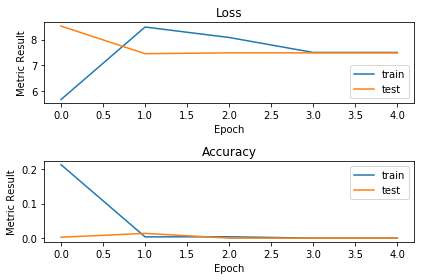

Nodes: 100
Activate 1: selu
Activate 2: selu
Score: 0.4793597480888508
{'Node': 50, 'Activate1': 'relu', 'Activate2': 'relu', 'Score': 0.7777873318875087}



In [15]:
bestResult = {}
bestScore = -1

nodes = [10, 20, 50, 100]
activation = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']


for node in nodes:
    for activate1 in activation:
        for activate2 in activation:
            with tf.device("/cpu:0"):
                model = Sequential()
                model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
                model.add(Dense(node, activation=activate1))
                model.add(Dropout(.10))
                model.add(Dense(node, activation=activate2))
                model.add(Dense(1))
                
                model = multi_gpu_model(model, gpus=2)
                model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

                history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)

                plotMetric(history)

                score = roc_auc_score(y_test,model.predict(x_test))

                print(f"Nodes: {node}")
                print(f"Activate 1: {activate1}")
                print(f"Activate 2: {activate2}")
                print(f"Score: {score}")

                if score > bestScore:
                    bestResult['Node'] = node
                    bestResult['Activate1'] = activate1
                    bestResult['Activate2'] = activate2
                    bestResult['Score'] = score

                    bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 55s 24us/step - loss: 0.7343 - acc: 0.5693 - val_loss: 0.6276 - val_acc: 0.6464
Epoch 2/5
2250000/2250000 [==============================] - 34s 15us/step - loss: 0.6168 - acc: 0.6609 - val_loss: 0.5942 - val_acc: 0.6829
Epoch 3/5
2250000/2250000 [==============================] - 34s 15us/step - loss: 0.6221 - acc: 0.6583 - val_loss: 0.5957 - val_acc: 0.6829
Epoch 4/5
2250000/2250000 [==============================] - 36s 16us/step - loss: 0.6036 - acc: 0.6762 - val_loss: 0.5902 - val_acc: 0.6875
Epoch 5/5
2250000/2250000 [==============================] - 35s 16us/step - loss: 0.5951 - acc: 0.6815 - val_loss: 0.5860 - val_acc: 0.6914


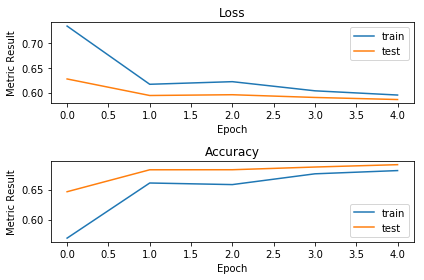

Nodes: 10
Activation: relu
Score: 0.7591953852176927
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 54s 24us/step - loss: 0.6719 - acc: 0.5963 - val_loss: 0.6138 - val_acc: 0.6607
Epoch 2/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.6123 - acc: 0.6670 - val_loss: 0.5898 - val_acc: 0.6868
Epoch 3/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.6059 - acc: 0.6719 - val_loss: 0.5834 - val_acc: 0.6901
Epoch 4/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.5864 - acc: 0.6883 - val_loss: 0.5787 - val_acc: 0.6931
Epoch 5/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.5830 - acc: 0.6913 - val_loss: 0.5700 - val_acc: 0.7011


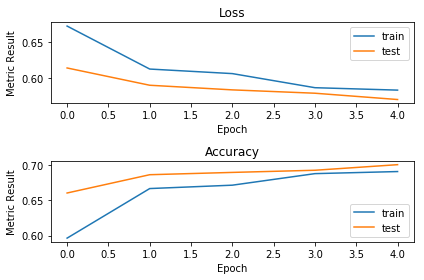

Nodes: 20
Activation: relu
Score: 0.7750175602653823
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 55s 24us/step - loss: 0.6604 - acc: 0.6108 - val_loss: 0.6170 - val_acc: 0.6604
Epoch 2/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.6182 - acc: 0.6581 - val_loss: 0.5974 - val_acc: 0.6761
Epoch 3/5
2250000/2250000 [==============================] - 35s 15us/step - loss: 0.6093 - acc: 0.6669 - val_loss: 0.5958 - val_acc: 0.6787
Epoch 4/5
2250000/2250000 [==============================] - 36s 16us/step - loss: 0.5979 - acc: 0.6782 - val_loss: 0.5883 - val_acc: 0.6861
Epoch 5/5
2250000/2250000 [==============================] - 35s 16us/step - loss: 0.5883 - acc: 0.6872 - val_loss: 0.5728 - val_acc: 0.6980


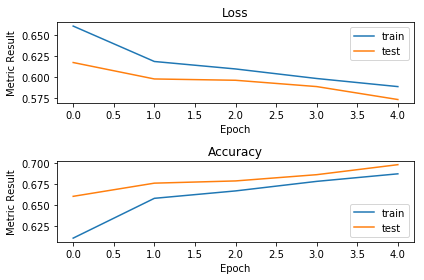

Nodes: 50
Activation: relu
Score: 0.7713943248824451
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 57s 25us/step - loss: 0.6435 - acc: 0.6324 - val_loss: 0.6564 - val_acc: 0.6134
Epoch 2/5
2250000/2250000 [==============================] - 35s 16us/step - loss: 0.5967 - acc: 0.6779 - val_loss: 0.5742 - val_acc: 0.6959
Epoch 3/5
2250000/2250000 [==============================] - 35s 16us/step - loss: 0.5787 - acc: 0.6953 - val_loss: 0.6360 - val_acc: 0.6404
Epoch 4/5
2250000/2250000 [==============================] - 35s 16us/step - loss: 0.5784 - acc: 0.6949 - val_loss: 0.5635 - val_acc: 0.7052
Epoch 5/5
2250000/2250000 [==============================] - 36s 16us/step - loss: 0.5706 - acc: 0.7010 - val_loss: 0.5619 - val_acc: 0.7049


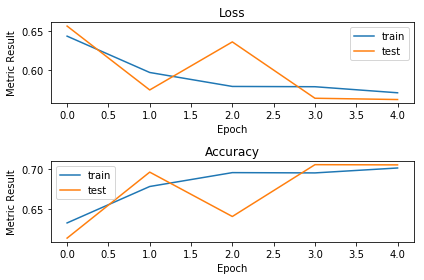

Nodes: 100
Activation: relu
Score: 0.7871082734085111
{'Node': 100, 'Activation': 'relu', 'Score': 0.7871082734085111}



In [16]:
bestResult = {}
bestScore = -1

nodes = [10, 20, 50, 100]
activation = ['relu']

for activate in activation:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))
            
            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)

            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 96s 43us/step - loss: 0.6391 - acc: 0.6354 - val_loss: 0.5845 - val_acc: 0.6875
Epoch 2/5
2250000/2250000 [==============================] - 74s 33us/step - loss: 0.5907 - acc: 0.6837 - val_loss: 0.5646 - val_acc: 0.7035
Epoch 3/5
2250000/2250000 [==============================] - 73s 33us/step - loss: 0.5700 - acc: 0.7021 - val_loss: 0.5534 - val_acc: 0.7136
Epoch 4/5
2250000/2250000 [==============================] - 74s 33us/step - loss: 0.5624 - acc: 0.7081 - val_loss: 0.5484 - val_acc: 0.7166
Epoch 5/5
2250000/2250000 [==============================] - 74s 33us/step - loss: 0.5815 - acc: 0.6921 - val_loss: 0.5448 - val_acc: 0.7205


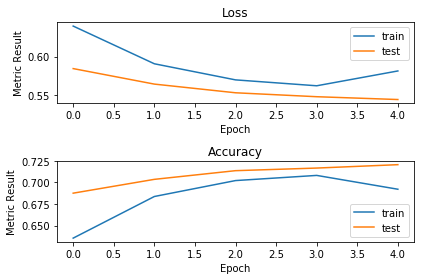

Nodes: 150
Activation: relu
Score: 0.7978802829645901
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 99s 44us/step - loss: 0.6303 - acc: 0.6506 - val_loss: 0.6011 - val_acc: 0.6744
Epoch 2/5
2250000/2250000 [==============================] - 83s 37us/step - loss: 0.5966 - acc: 0.6793 - val_loss: 0.5779 - val_acc: 0.6926
Epoch 3/5
2250000/2250000 [==============================] - 85s 38us/step - loss: 0.5755 - acc: 0.6974 - val_loss: 0.5968 - val_acc: 0.6828
Epoch 4/5
2250000/2250000 [==============================] - 85s 38us/step - loss: 0.5762 - acc: 0.6963 - val_loss: 0.5521 - val_acc: 0.7143
Epoch 5/5
2250000/2250000 [==============================] - 85s 38us/step - loss: 0.5806 - acc: 0.6929 - val_loss: 0.5851 - val_acc: 0.6888


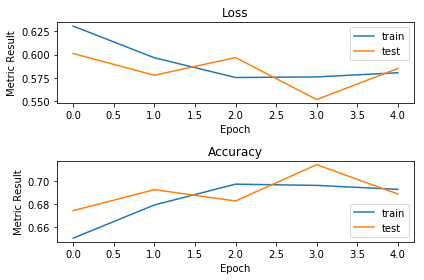

Nodes: 200
Activation: relu
Score: 0.7573908502996843
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 114s 51us/step - loss: 0.6352 - acc: 0.6423 - val_loss: 0.5942 - val_acc: 0.6795
Epoch 2/5
2250000/2250000 [==============================] - 90s 40us/step - loss: 0.6107 - acc: 0.6665 - val_loss: 0.5952 - val_acc: 0.6806
Epoch 3/5
2250000/2250000 [==============================] - 90s 40us/step - loss: 0.5848 - acc: 0.6894 - val_loss: 0.5668 - val_acc: 0.7021
Epoch 4/5
2250000/2250000 [==============================] - 88s 39us/step - loss: 0.5897 - acc: 0.6838 - val_loss: 0.5586 - val_acc: 0.7094
Epoch 5/5
2250000/2250000 [==============================] - 87s 39us/step - loss: 0.5850 - acc: 0.6903 - val_loss: 0.5922 - val_acc: 0.6807


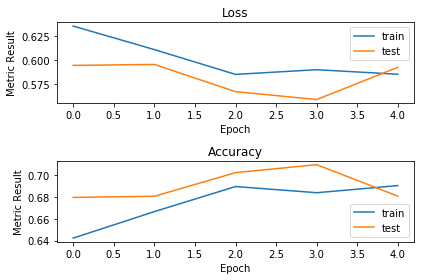

Nodes: 250
Activation: relu
Score: 0.7500560894069874
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 126s 56us/step - loss: 0.6184 - acc: 0.6604 - val_loss: 0.5723 - val_acc: 0.6990
Epoch 2/5
2250000/2250000 [==============================] - 92s 41us/step - loss: 0.5832 - acc: 0.6932 - val_loss: 0.5565 - val_acc: 0.7138
Epoch 3/5
2250000/2250000 [==============================] - 91s 41us/step - loss: 0.5785 - acc: 0.6958 - val_loss: 0.5925 - val_acc: 0.6837
Epoch 4/5
2250000/2250000 [==============================] - 91s 41us/step - loss: 0.5703 - acc: 0.7029 - val_loss: 0.5601 - val_acc: 0.7095
Epoch 5/5
2250000/2250000 [==============================] - 91s 41us/step - loss: 0.5834 - acc: 0.6904 - val_loss: 0.5671 - val_acc: 0.7031


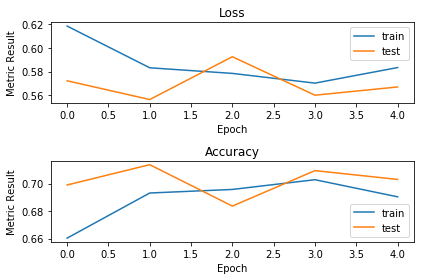

Nodes: 300
Activation: relu
Score: 0.7799938145355223
{'Node': 150, 'Activation': 'relu', 'Score': 0.7978802829645901}



In [19]:
bestResult = {}
bestScore = -1

nodes = [150, 200, 250, 300]
activation = ['relu']

for activate in activation:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))
            
            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)

            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 63s 28us/step - loss: 0.6577 - acc: 0.6064 - val_loss: 0.6391 - val_acc: 0.6300
Epoch 2/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.6196 - acc: 0.6618 - val_loss: 0.5981 - val_acc: 0.6841
Epoch 3/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.6098 - acc: 0.6732 - val_loss: 0.5968 - val_acc: 0.6844
Epoch 4/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.6014 - acc: 0.6804 - val_loss: 0.5865 - val_acc: 0.6922
Epoch 5/5
2250000/2250000 [==============================] - 39s 17us/step - loss: 0.6062 - acc: 0.6707 - val_loss: 0.6208 - val_acc: 0.6612


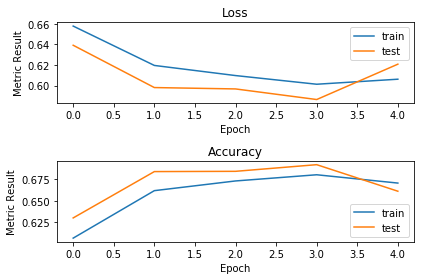

Nodes: 10
Activation: relu
Score: 0.7178735122311259
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 62s 28us/step - loss: 0.7206 - acc: 0.5654 - val_loss: 0.6347 - val_acc: 0.6472
Epoch 2/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.6170 - acc: 0.6640 - val_loss: 0.5956 - val_acc: 0.6825
Epoch 3/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.6022 - acc: 0.6786 - val_loss: 0.5867 - val_acc: 0.6895
Epoch 4/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5934 - acc: 0.6848 - val_loss: 0.5808 - val_acc: 0.6929
Epoch 5/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5942 - acc: 0.6820 - val_loss: 0.5819 - val_acc: 0.6902


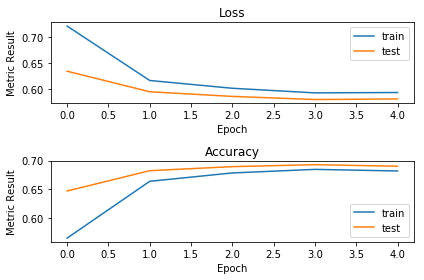

Nodes: 20
Activation: relu
Score: 0.7622819251093897
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 64s 28us/step - loss: 0.6659 - acc: 0.6081 - val_loss: 0.6035 - val_acc: 0.6706
Epoch 2/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5998 - acc: 0.6771 - val_loss: 0.5801 - val_acc: 0.6918
Epoch 3/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5946 - acc: 0.6798 - val_loss: 0.5786 - val_acc: 0.6924
Epoch 4/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5767 - acc: 0.6962 - val_loss: 0.5617 - val_acc: 0.7069
Epoch 5/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5968 - acc: 0.6767 - val_loss: 0.5729 - val_acc: 0.6979


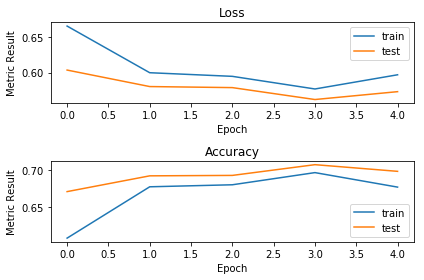

Nodes: 50
Activation: relu
Score: 0.7715908458654861
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 64s 28us/step - loss: 0.6133 - acc: 0.6596 - val_loss: 0.5690 - val_acc: 0.7013
Epoch 2/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.6009 - acc: 0.6743 - val_loss: 0.5911 - val_acc: 0.6822
Epoch 3/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5753 - acc: 0.6973 - val_loss: 0.5765 - val_acc: 0.6975
Epoch 4/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5661 - acc: 0.7054 - val_loss: 0.5579 - val_acc: 0.7104
Epoch 5/5
2250000/2250000 [==============================] - 40s 18us/step - loss: 0.5564 - acc: 0.7125 - val_loss: 0.5341 - val_acc: 0.7274


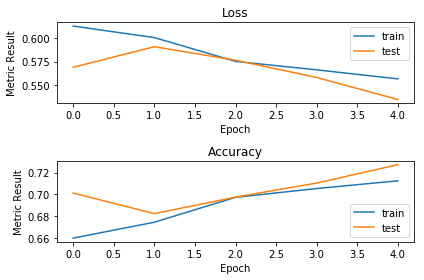

Nodes: 100
Activation: relu
Score: 0.8069312704271172
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 123s 55us/step - loss: 0.6348 - acc: 0.6424 - val_loss: 0.5892 - val_acc: 0.6835
Epoch 2/5
2250000/2250000 [==============================] - 94s 42us/step - loss: 0.5880 - acc: 0.6868 - val_loss: 0.5618 - val_acc: 0.7061
Epoch 3/5
2250000/2250000 [==============================] - 94s 42us/step - loss: 0.5688 - acc: 0.7031 - val_loss: 0.5777 - val_acc: 0.6978
Epoch 4/5
2250000/2250000 [==============================] - 95s 42us/step - loss: 0.5681 - acc: 0.7042 - val_loss: 0.5436 - val_acc: 0.7222
Epoch 5/5
2250000/2250000 [==============================] - 95s 42us/step - loss: 0.5683 - acc: 0.7043 - val_loss: 0.5697 - val_acc: 0.7041


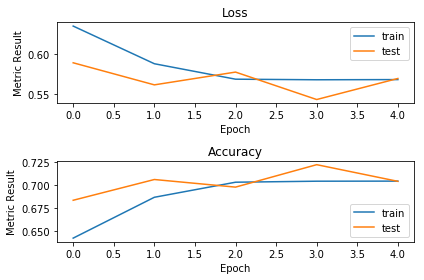

Nodes: 150
Activation: relu
Score: 0.7758739065884975
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 128s 57us/step - loss: 0.6136 - acc: 0.6651 - val_loss: 0.5653 - val_acc: 0.7047
Epoch 2/5
2250000/2250000 [==============================] - 98s 44us/step - loss: 0.5710 - acc: 0.7026 - val_loss: 0.5555 - val_acc: 0.7146
Epoch 3/5
2250000/2250000 [==============================] - 98s 44us/step - loss: 0.5627 - acc: 0.7084 - val_loss: 0.6338 - val_acc: 0.6439
Epoch 4/5
2250000/2250000 [==============================] - 98s 44us/step - loss: 0.5658 - acc: 0.7071 - val_loss: 0.5395 - val_acc: 0.7257
Epoch 5/5
2250000/2250000 [==============================] - 98s 44us/step - loss: 0.5450 - acc: 0.7219 - val_loss: 0.5234 - val_acc: 0.7360


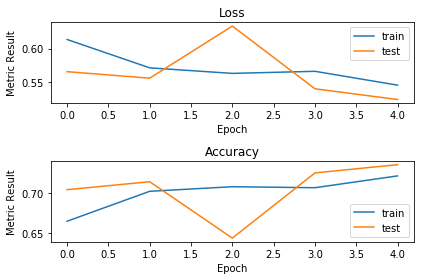

Nodes: 200
Activation: relu
Score: 0.8174650678396455
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 132s 59us/step - loss: 0.6189 - acc: 0.6591 - val_loss: 0.5841 - val_acc: 0.6903
Epoch 2/5
2250000/2250000 [==============================] - 113s 50us/step - loss: 0.5799 - acc: 0.6937 - val_loss: 0.5517 - val_acc: 0.7147
Epoch 3/5
2250000/2250000 [==============================] - 116s 52us/step - loss: 0.5496 - acc: 0.7183 - val_loss: 0.5305 - val_acc: 0.7309
Epoch 4/5
2250000/2250000 [==============================] - 118s 53us/step - loss: 0.5403 - acc: 0.7255 - val_loss: 0.6276 - val_acc: 0.6617
Epoch 5/5
2250000/2250000 [==============================] - 118s 53us/step - loss: 0.5523 - acc: 0.7172 - val_loss: 0.5406 - val_acc: 0.7224


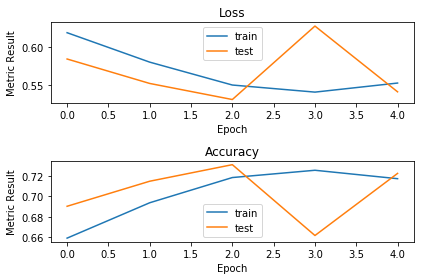

Nodes: 250
Activation: relu
Score: 0.8030805892897399
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 150s 67us/step - loss: 0.6091 - acc: 0.6683 - val_loss: 0.5523 - val_acc: 0.7153
Epoch 2/5
2250000/2250000 [==============================] - 127s 56us/step - loss: 0.5645 - acc: 0.7077 - val_loss: 0.5566 - val_acc: 0.7150
Epoch 3/5
2250000/2250000 [==============================] - 126s 56us/step - loss: 0.5458 - acc: 0.7227 - val_loss: 0.5364 - val_acc: 0.7275
Epoch 4/5
2250000/2250000 [==============================] - 126s 56us/step - loss: 0.5520 - acc: 0.7175 - val_loss: 0.5849 - val_acc: 0.6870
Epoch 5/5
2250000/2250000 [==============================] - 127s 56us/step - loss: 0.5515 - acc: 0.7179 - val_loss: 0.5380 - val_acc: 0.7270


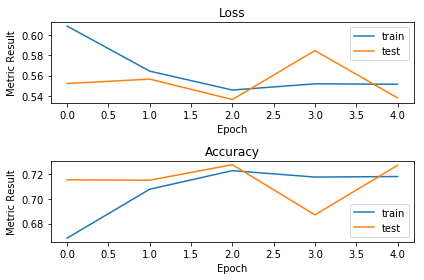

Nodes: 300
Activation: relu
Score: 0.8055379337318244
{'Node': 200, 'Activation': 'relu', 'Score': 0.8174650678396455}



In [20]:
bestResult = {}
bestScore = -1

nodes = [10, 20, 50, 100, 150, 200, 250, 300]
activation = ['relu']


for activate in activation:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))

            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 74s 33us/step - loss: 0.6385 - acc: 0.6358 - val_loss: 0.5817 - val_acc: 0.6883
Epoch 2/5
2250000/2250000 [==============================] - 46s 20us/step - loss: 0.5800 - acc: 0.6940 - val_loss: 0.5548 - val_acc: 0.7145
Epoch 3/5
2250000/2250000 [==============================] - 45s 20us/step - loss: 0.5710 - acc: 0.7016 - val_loss: 0.5512 - val_acc: 0.7161
Epoch 4/5
2250000/2250000 [==============================] - 45s 20us/step - loss: 0.5592 - acc: 0.7106 - val_loss: 0.5853 - val_acc: 0.6913
Epoch 5/5
2250000/2250000 [==============================] - 45s 20us/step - loss: 0.5638 - acc: 0.7065 - val_loss: 0.5360 - val_acc: 0.7279


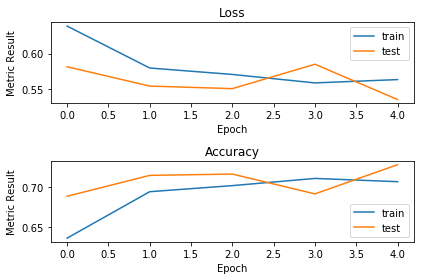

Nodes: 50
Activation: relu
Score: 0.8073403972107821
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 74s 33us/step - loss: 0.6316 - acc: 0.6526 - val_loss: 0.5840 - val_acc: 0.6903
Epoch 2/5
2250000/2250000 [==============================] - 47s 21us/step - loss: 0.5766 - acc: 0.6971 - val_loss: 0.5753 - val_acc: 0.6981
Epoch 3/5
2250000/2250000 [==============================] - 47s 21us/step - loss: 0.5770 - acc: 0.6970 - val_loss: 0.5513 - val_acc: 0.7167
Epoch 4/5
2250000/2250000 [==============================] - 46s 20us/step - loss: 0.5595 - acc: 0.7108 - val_loss: 0.5391 - val_acc: 0.7249
Epoch 5/5
2250000/2250000 [==============================] - 45s 20us/step - loss: 0.5441 - acc: 0.7214 - val_loss: 0.5274 - val_acc: 0.7323


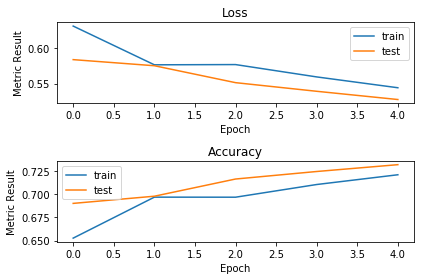

Nodes: 100
Activation: relu
Score: 0.814934724568342
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 148s 66us/step - loss: 0.6109 - acc: 0.6636 - val_loss: 0.5726 - val_acc: 0.7056
Epoch 2/5
2250000/2250000 [==============================] - 119s 53us/step - loss: 0.5867 - acc: 0.6872 - val_loss: 0.5566 - val_acc: 0.7141
Epoch 3/5
2250000/2250000 [==============================] - 119s 53us/step - loss: 0.5617 - acc: 0.7082 - val_loss: 0.5621 - val_acc: 0.7091
Epoch 4/5
2250000/2250000 [==============================] - 119s 53us/step - loss: 0.5542 - acc: 0.7144 - val_loss: 0.5379 - val_acc: 0.7252
Epoch 5/5
2250000/2250000 [==============================] - 119s 53us/step - loss: 0.5589 - acc: 0.7113 - val_loss: 0.5511 - val_acc: 0.7209


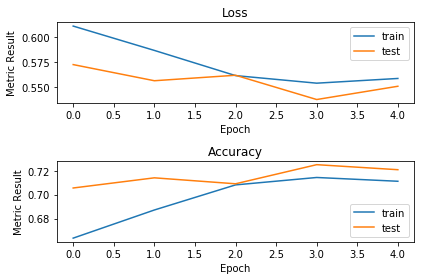

Nodes: 150
Activation: relu
Score: 0.8009312660155583
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 160s 71us/step - loss: 0.6137 - acc: 0.6595 - val_loss: 0.5705 - val_acc: 0.6995
Epoch 2/5
2250000/2250000 [==============================] - 139s 62us/step - loss: 0.5664 - acc: 0.7054 - val_loss: 0.5441 - val_acc: 0.7225
Epoch 3/5
2250000/2250000 [==============================] - 139s 62us/step - loss: 0.5496 - acc: 0.7181 - val_loss: 0.5369 - val_acc: 0.7268
Epoch 4/5
2250000/2250000 [==============================] - 138s 61us/step - loss: 0.5353 - acc: 0.7279 - val_loss: 0.5304 - val_acc: 0.7318
Epoch 5/5
2250000/2250000 [==============================] - 138s 61us/step - loss: 0.5249 - acc: 0.7352 - val_loss: 0.5152 - val_acc: 0.7405


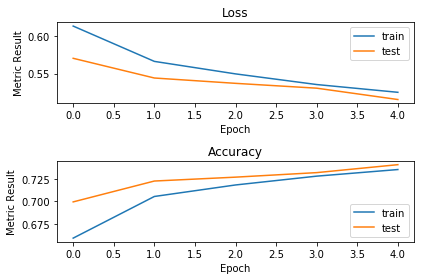

Nodes: 200
Activation: relu
Score: 0.8250858879569185
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 178s 79us/step - loss: 8.5334 - acc: 0.0589 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 145s 64us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 146s 65us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 146s 65us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 146s 65us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


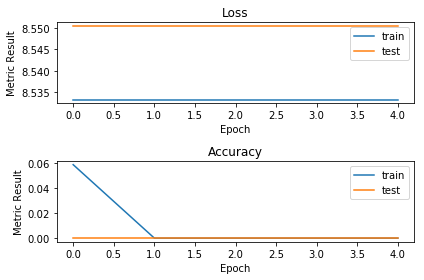

Nodes: 250
Activation: relu
Score: 0.5233544497465099
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 195s 87us/step - loss: 0.6186 - acc: 0.6587 - val_loss: 0.5709 - val_acc: 0.7018
Epoch 2/5
2250000/2250000 [==============================] - 156s 69us/step - loss: 0.5803 - acc: 0.6939 - val_loss: 0.5518 - val_acc: 0.7153
Epoch 3/5
2250000/2250000 [==============================] - 156s 70us/step - loss: 0.5554 - acc: 0.7146 - val_loss: 0.5493 - val_acc: 0.7183
Epoch 4/5
2250000/2250000 [==============================] - 154s 68us/step - loss: 0.5503 - acc: 0.7185 - val_loss: 0.5315 - val_acc: 0.7317
Epoch 5/5
2250000/2250000 [==============================] - 153s 68us/step - loss: 0.5747 - acc: 0.7000 - val_loss: 0.5817 - val_acc: 0.6910


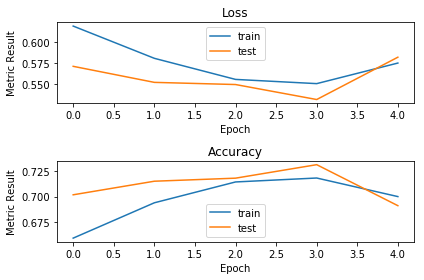

Nodes: 300
Activation: relu
Score: 0.7647548532737442
{'Node': 200, 'Activation': 'relu', 'Score': 0.8250858879569185}



In [21]:
bestResult = {}
bestScore = -1

nodes = [50, 100, 150, 200, 250, 300]
activation = ['relu']


for activate in activation:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))

            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 88s 39us/step - loss: 2.5123 - acc: 0.5638 - val_loss: 7.4852 - val_acc: 0.5238
Epoch 2/5
2250000/2250000 [==============================] - 62s 28us/step - loss: 7.5020 - acc: 0.4922 - val_loss: 7.4852 - val_acc: 0.5247
Epoch 3/5
2250000/2250000 [==============================] - 63s 28us/step - loss: 0.7353 - acc: 0.6142 - val_loss: 0.6232 - val_acc: 0.6478
Epoch 4/5
2250000/2250000 [==============================] - 63s 28us/step - loss: 0.6142 - acc: 0.6616 - val_loss: 0.5949 - val_acc: 0.6781
Epoch 5/5
2250000/2250000 [==============================] - 63s 28us/step - loss: 0.5937 - acc: 0.6829 - val_loss: 0.5843 - val_acc: 0.6903


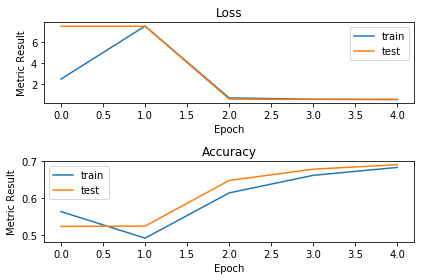

Nodes: 150
Activation: relu
Score: 0.7658475344430828
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 97s 43us/step - loss: 0.6696 - acc: 0.5856 - val_loss: 0.6311 - val_acc: 0.6412
Epoch 2/5
2250000/2250000 [==============================] - 67s 30us/step - loss: 6.5916 - acc: 0.1568 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 68s 30us/step - loss: 8.5334 - acc: 4.4444e-07 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 67s 30us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 67s 30us/step - loss: 8.5334 - acc: 0.0000e+00 - val_loss: 8.5504 - val_acc: 0.0000e+00


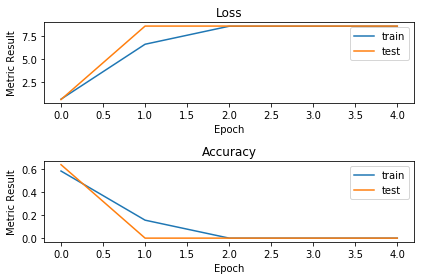

Nodes: 200
Activation: relu
Score: 0.5380419646391723
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 102s 45us/step - loss: 0.6995 - acc: 0.5947 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 72s 32us/step - loss: 7.5020 - acc: 8.8889e-06 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 72s 32us/step - loss: 7.5020 - acc: 1.0667e-05 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 72s 32us/step - loss: 7.5020 - acc: 5.7778e-06 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 72s 32us/step - loss: 7.5020 - acc: 9.3333e-06 - val_loss: 7.4852 - val_acc: 0.0000e+00


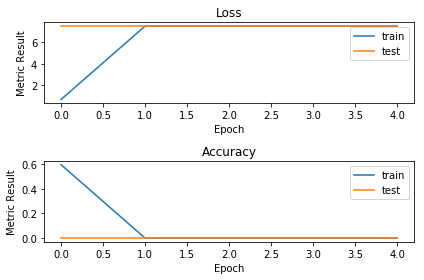

Nodes: 250
Activation: relu
Score: 0.5152172658800304
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 126s 56us/step - loss: 0.6196 - acc: 0.6593 - val_loss: 0.5738 - val_acc: 0.7000
Epoch 2/5
2250000/2250000 [==============================] - 91s 41us/step - loss: 0.5940 - acc: 0.6831 - val_loss: 0.5610 - val_acc: 0.7038
Epoch 3/5
2250000/2250000 [==============================] - 91s 41us/step - loss: 0.5992 - acc: 0.6808 - val_loss: 0.5674 - val_acc: 0.6957
Epoch 4/5
2250000/2250000 [==============================] - 92s 41us/step - loss: 0.5925 - acc: 0.6848 - val_loss: 0.5790 - val_acc: 0.6951
Epoch 5/5
2250000/2250000 [==============================] - 92s 41us/step - loss: 0.6314 - acc: 0.6645 - val_loss: 0.6002 - val_acc: 0.6799


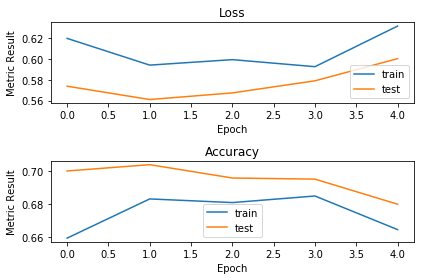

Nodes: 150
Activation: relu
Score: 0.7956340934296098
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 131s 58us/step - loss: 0.6254 - acc: 0.6561 - val_loss: 0.5824 - val_acc: 0.6861
Epoch 2/5
2250000/2250000 [==============================] - 100s 45us/step - loss: 0.6189 - acc: 0.6656 - val_loss: 0.5953 - val_acc: 0.6819
Epoch 3/5
2250000/2250000 [==============================] - 99s 44us/step - loss: 0.6301 - acc: 0.6609 - val_loss: 0.6147 - val_acc: 0.6672
Epoch 4/5
2250000/2250000 [==============================] - 102s 45us/step - loss: 0.6491 - acc: 0.6538 - val_loss: 0.6445 - val_acc: 0.6579
Epoch 5/5
2250000/2250000 [==============================] - 99s 44us/step - loss: 0.6474 - acc: 0.6577 - val_loss: 0.6244 - val_acc: 0.6660


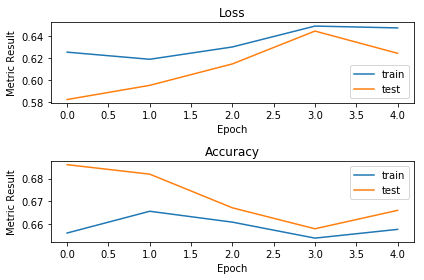

Nodes: 200
Activation: relu
Score: 0.7407199047264748
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 145s 65us/step - loss: 0.6297 - acc: 0.6529 - val_loss: 0.5830 - val_acc: 0.6896
Epoch 2/5
2250000/2250000 [==============================] - 117s 52us/step - loss: 0.6194 - acc: 0.6677 - val_loss: 0.6050 - val_acc: 0.6762
Epoch 3/5
2250000/2250000 [==============================] - 115s 51us/step - loss: 0.6339 - acc: 0.6593 - val_loss: 0.6053 - val_acc: 0.6837
Epoch 4/5
2250000/2250000 [==============================] - 114s 51us/step - loss: 0.6390 - acc: 0.6586 - val_loss: 0.5976 - val_acc: 0.6813
Epoch 5/5
2250000/2250000 [==============================] - 114s 51us/step - loss: 0.6426 - acc: 0.6574 - val_loss: 0.5794 - val_acc: 0.6934


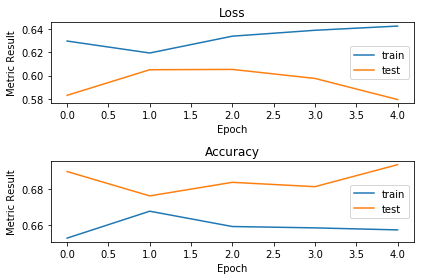

Nodes: 250
Activation: relu
Score: 0.7803132333862591
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 113s 50us/step - loss: 5.9640 - acc: 0.1365 - val_loss: 0.6183 - val_acc: 0.6531
Epoch 2/5
2250000/2250000 [==============================] - 81s 36us/step - loss: 0.5996 - acc: 0.6762 - val_loss: 0.6221 - val_acc: 0.6695
Epoch 3/5
2250000/2250000 [==============================] - 81s 36us/step - loss: 0.5725 - acc: 0.6996 - val_loss: 0.5536 - val_acc: 0.7129
Epoch 4/5
2250000/2250000 [==============================] - 80s 36us/step - loss: 0.5601 - acc: 0.7094 - val_loss: 0.5428 - val_acc: 0.7215
Epoch 5/5
2250000/2250000 [==============================] - 81s 36us/step - loss: 0.5479 - acc: 0.7185 - val_loss: 0.5383 - val_acc: 0.7247


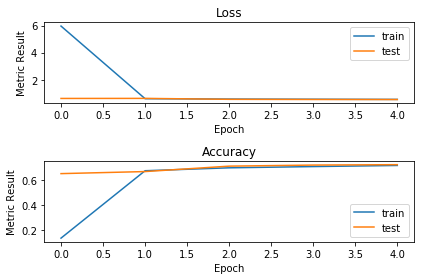

Nodes: 150
Activation: relu
Score: 0.8052027307720656
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 115s 51us/step - loss: 7.5002 - acc: 2.0978e-04 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 86s 38us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 85s 38us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 86s 38us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 85s 38us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


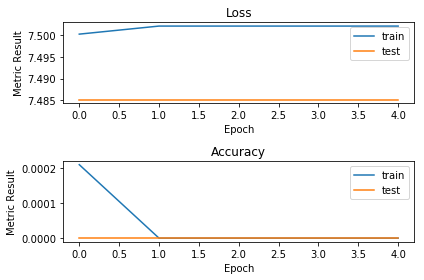

Nodes: 200
Activation: relu
Score: 0.47350955466415534
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 128s 57us/step - loss: 7.4996 - acc: 2.0178e-04 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 2/5
2250000/2250000 [==============================] - 94s 42us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 95s 42us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 95s 42us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 94s 42us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


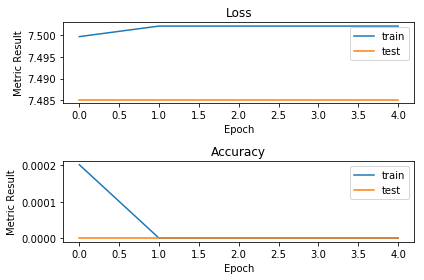

Nodes: 250
Activation: relu
Score: 0.46559089112999896
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 183s 81us/step - loss: 0.6134 - acc: 0.6599 - val_loss: 0.5796 - val_acc: 0.6910
Epoch 2/5
2250000/2250000 [==============================] - 151s 67us/step - loss: 0.5672 - acc: 0.7062 - val_loss: 0.5399 - val_acc: 0.7250
Epoch 3/5
2250000/2250000 [==============================] - 150s 67us/step - loss: 0.5469 - acc: 0.7216 - val_loss: 0.5306 - val_acc: 0.7321
Epoch 4/5
2250000/2250000 [==============================] - 150s 67us/step - loss: 0.5359 - acc: 0.7298 - val_loss: 0.5202 - val_acc: 0.7374
Epoch 5/5
2250000/2250000 [==============================] - 150s 67us/step - loss: 0.5281 - acc: 0.7354 - val_loss: 0.5113 - val_acc: 0.7436


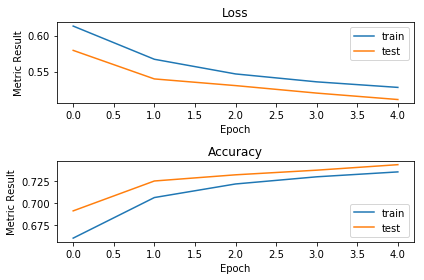

Nodes: 150
Activation: relu
Score: 0.8276490953940442
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 203s 90us/step - loss: 0.6146 - acc: 0.6588 - val_loss: 0.5674 - val_acc: 0.7046
Epoch 2/5
2250000/2250000 [==============================] - 166s 74us/step - loss: 0.5628 - acc: 0.7104 - val_loss: 0.5915 - val_acc: 0.6839
Epoch 3/5
2250000/2250000 [==============================] - 166s 74us/step - loss: 0.5459 - acc: 0.7235 - val_loss: 0.5225 - val_acc: 0.7374
Epoch 4/5
2250000/2250000 [==============================] - 167s 74us/step - loss: 0.5337 - acc: 0.7321 - val_loss: 0.5180 - val_acc: 0.7406
Epoch 5/5
2250000/2250000 [==============================] - 166s 74us/step - loss: 0.5263 - acc: 0.7375 - val_loss: 0.5131 - val_acc: 0.7473


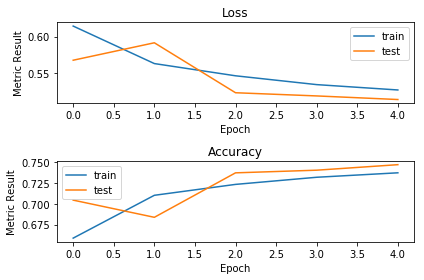

Nodes: 200
Activation: relu
Score: 0.8309300717938368
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 210s 94us/step - loss: 0.6114 - acc: 0.6622 - val_loss: 0.5897 - val_acc: 0.6876
Epoch 2/5
2250000/2250000 [==============================] - 182s 81us/step - loss: 0.5596 - acc: 0.7127 - val_loss: 0.5788 - val_acc: 0.7196
Epoch 3/5
2250000/2250000 [==============================] - 180s 80us/step - loss: 0.5426 - acc: 0.7260 - val_loss: 0.5224 - val_acc: 0.7382
Epoch 4/5
2250000/2250000 [==============================] - 179s 80us/step - loss: 0.5316 - acc: 0.7338 - val_loss: 0.5206 - val_acc: 0.7386
Epoch 5/5
2250000/2250000 [==============================] - 180s 80us/step - loss: 0.5260 - acc: 0.7384 - val_loss: 0.5259 - val_acc: 0.7396


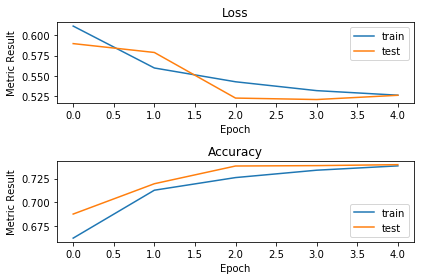

Nodes: 250
Activation: relu
Score: 0.8250817056901859
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 165s 73us/step - loss: 0.6138 - acc: 0.6602 - val_loss: 0.5872 - val_acc: 0.6927
Epoch 2/5
2250000/2250000 [==============================] - 132s 58us/step - loss: 0.5653 - acc: 0.7069 - val_loss: 0.5408 - val_acc: 0.7217
Epoch 3/5
2250000/2250000 [==============================] - 131s 58us/step - loss: 0.5412 - acc: 0.7241 - val_loss: 0.5353 - val_acc: 0.7263
Epoch 4/5
2250000/2250000 [==============================] - 132s 59us/step - loss: 0.5390 - acc: 0.7252 - val_loss: 0.5257 - val_acc: 0.7356
Epoch 5/5
2250000/2250000 [==============================] - 131s 58us/step - loss: 0.5313 - acc: 0.7313 - val_loss: 0.5136 - val_acc: 0.7425


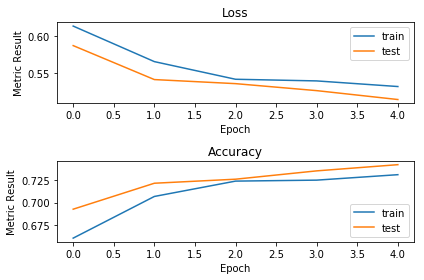

Nodes: 150
Activation: relu
Score: 0.8266004573528751
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 177s 79us/step - loss: 0.6331 - acc: 0.6418 - val_loss: 0.6128 - val_acc: 0.6640
Epoch 2/5
2250000/2250000 [==============================] - 144s 64us/step - loss: 0.6191 - acc: 0.6562 - val_loss: 0.5902 - val_acc: 0.6855
Epoch 3/5
2250000/2250000 [==============================] - 145s 64us/step - loss: 0.5842 - acc: 0.6902 - val_loss: 0.6204 - val_acc: 0.6332
Epoch 4/5
2250000/2250000 [==============================] - 145s 64us/step - loss: 0.5811 - acc: 0.6931 - val_loss: 0.5653 - val_acc: 0.7047
Epoch 5/5
2250000/2250000 [==============================] - 144s 64us/step - loss: 0.5580 - acc: 0.7124 - val_loss: 0.5374 - val_acc: 0.7268


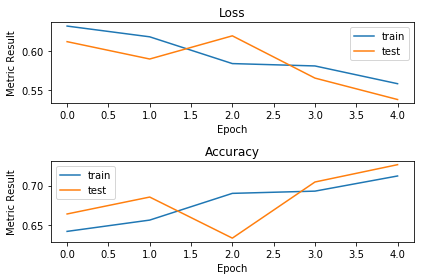

Nodes: 200
Activation: relu
Score: 0.8051781393586588
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 205s 91us/step - loss: 0.6278 - acc: 0.6458 - val_loss: 0.5863 - val_acc: 0.6838
Epoch 2/5
2250000/2250000 [==============================] - 161s 72us/step - loss: 0.5828 - acc: 0.6924 - val_loss: 0.5657 - val_acc: 0.7034
Epoch 3/5
2250000/2250000 [==============================] - 160s 71us/step - loss: 0.5678 - acc: 0.7040 - val_loss: 0.5470 - val_acc: 0.7192
Epoch 4/5
2250000/2250000 [==============================] - 160s 71us/step - loss: 0.5813 - acc: 0.6936 - val_loss: 0.5809 - val_acc: 0.6945
Epoch 5/5
2250000/2250000 [==============================] - 160s 71us/step - loss: 0.5634 - acc: 0.7080 - val_loss: 0.5418 - val_acc: 0.7229


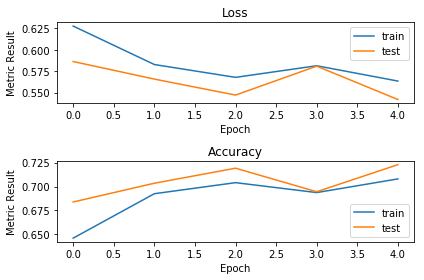

Nodes: 250
Activation: relu
Score: 0.8014032235018302
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 171s 76us/step - loss: 0.6354 - acc: 0.6359 - val_loss: 0.5856 - val_acc: 0.6863
Epoch 2/5
2250000/2250000 [==============================] - 138s 62us/step - loss: 0.5855 - acc: 0.6898 - val_loss: 0.5613 - val_acc: 0.7075
Epoch 3/5
2250000/2250000 [==============================] - 138s 61us/step - loss: 0.5658 - acc: 0.7063 - val_loss: 0.5508 - val_acc: 0.7164
Epoch 4/5
2250000/2250000 [==============================] - 138s 61us/step - loss: 0.5577 - acc: 0.7125 - val_loss: 0.5376 - val_acc: 0.7266
Epoch 5/5
2250000/2250000 [==============================] - 138s 61us/step - loss: 0.5451 - acc: 0.7220 - val_loss: 0.5269 - val_acc: 0.7331


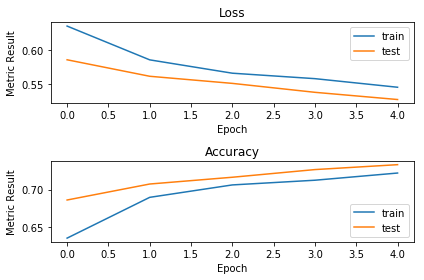

Nodes: 150
Activation: relu
Score: 0.8143804674226423
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 186s 82us/step - loss: 0.6257 - acc: 0.6508 - val_loss: 0.5849 - val_acc: 0.6866
Epoch 2/5
2250000/2250000 [==============================] - 142s 63us/step - loss: 0.5869 - acc: 0.6892 - val_loss: 0.5686 - val_acc: 0.7019
Epoch 3/5
2250000/2250000 [==============================] - 142s 63us/step - loss: 0.5710 - acc: 0.7032 - val_loss: 0.5696 - val_acc: 0.7038
Epoch 4/5
2250000/2250000 [==============================] - 141s 63us/step - loss: 0.5649 - acc: 0.7088 - val_loss: 0.5475 - val_acc: 0.7203
Epoch 5/5
2250000/2250000 [==============================] - 142s 63us/step - loss: 0.5551 - acc: 0.7166 - val_loss: 0.5401 - val_acc: 0.7258


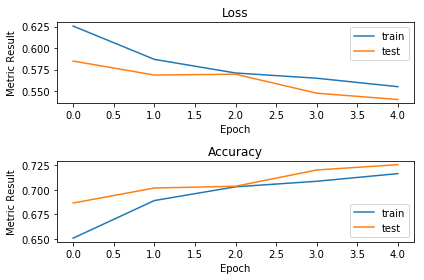

Nodes: 200
Activation: relu
Score: 0.8057473541745556
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 193s 86us/step - loss: 0.6114 - acc: 0.6649 - val_loss: 0.5642 - val_acc: 0.7049
Epoch 2/5
2250000/2250000 [==============================] - 156s 69us/step - loss: 0.5622 - acc: 0.7095 - val_loss: 0.5400 - val_acc: 0.7242
Epoch 3/5
2250000/2250000 [==============================] - 156s 69us/step - loss: 0.5481 - acc: 0.7212 - val_loss: 0.5433 - val_acc: 0.7278
Epoch 4/5
2250000/2250000 [==============================] - 156s 69us/step - loss: 0.5391 - acc: 0.7278 - val_loss: 0.5283 - val_acc: 0.7350
Epoch 5/5
2250000/2250000 [==============================] - 156s 69us/step - loss: 0.5308 - acc: 0.7329 - val_loss: 0.5992 - val_acc: 0.6996


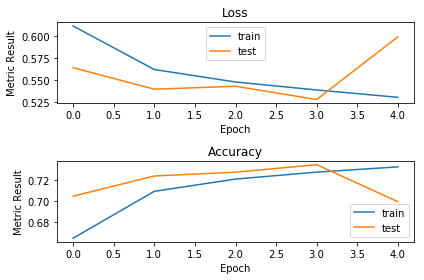

Nodes: 250
Activation: relu
Score: 0.7658926393625682
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 189s 84us/step - loss: 0.6219 - acc: 0.6501 - val_loss: 0.5711 - val_acc: 0.6985
Epoch 2/5
2250000/2250000 [==============================] - 157s 70us/step - loss: 0.5897 - acc: 0.6859 - val_loss: 0.5501 - val_acc: 0.7159
Epoch 3/5
2250000/2250000 [==============================] - 157s 70us/step - loss: 0.5684 - acc: 0.7040 - val_loss: 0.5482 - val_acc: 0.7192
Epoch 4/5
2250000/2250000 [==============================] - 157s 70us/step - loss: 0.5570 - acc: 0.7141 - val_loss: 0.5363 - val_acc: 0.7284
Epoch 5/5
2250000/2250000 [==============================] - 157s 70us/step - loss: 0.5643 - acc: 0.7083 - val_loss: 0.5427 - val_acc: 0.7246


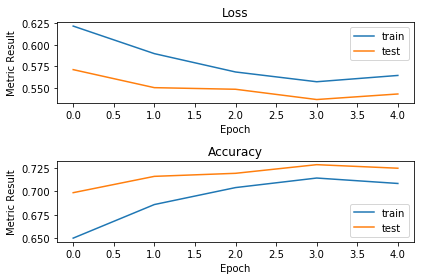

Nodes: 150
Activation: relu
Score: 0.8019187241046081
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 213s 94us/step - loss: 4.6800 - acc: 0.3140 - val_loss: 8.5494 - val_acc: 1.0400e-04
Epoch 2/5
2250000/2250000 [==============================] - 170s 76us/step - loss: 7.7138 - acc: 1.0844e-04 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 3/5
2250000/2250000 [==============================] - 170s 75us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 4/5
2250000/2250000 [==============================] - 170s 75us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00
Epoch 5/5
2250000/2250000 [==============================] - 170s 75us/step - loss: 7.5020 - acc: 0.0000e+00 - val_loss: 7.4852 - val_acc: 0.0000e+00


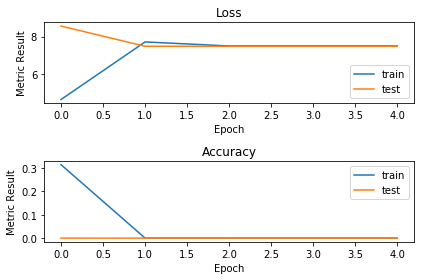

Nodes: 200
Activation: relu
Score: 0.4887356965358577
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 219s 97us/step - loss: 0.6446 - acc: 0.6427 - val_loss: 0.5884 - val_acc: 0.6851
Epoch 2/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5944 - acc: 0.6815 - val_loss: 0.6149 - val_acc: 0.6644
Epoch 3/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.6168 - acc: 0.6595 - val_loss: 0.6148 - val_acc: 0.6646
Epoch 4/5
2250000/2250000 [==============================] - 195s 87us/step - loss: 0.5944 - acc: 0.6820 - val_loss: 0.5719 - val_acc: 0.7015
Epoch 5/5
2250000/2250000 [==============================] - 195s 87us/step - loss: 0.5957 - acc: 0.6814 - val_loss: 0.5749 - val_acc: 0.6978


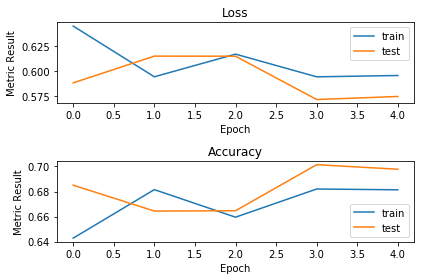

Nodes: 250
Activation: relu
Score: 0.77130364278125
{'Node': 200, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Score': 0.8309300717938368}



In [22]:
bestResult = {}
bestScore = -1

nodes = [150, 200, 250]
activate = 'relu'
optimization = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']


for optimize in optimization:
    for node in nodes:
        with tf.device("/cpu:0"):
            model = Sequential()
            model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dropout(0.10))
            model.add(Dense(node, activation=activate))
            model.add(Dense(1))

            model = multi_gpu_model(model, gpus=2)
            model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

            history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
            plotMetric(history)

            score = roc_auc_score(y_test,model.predict(x_test))

            print(f"Nodes: {node}")
            print(f"Activation: {activate}")
            print(f"Score: {score}")

            if score > bestScore:
                bestResult['Node'] = node
                bestResult['Activation'] = activate
                bestResult['Optimization'] = optimize
                bestResult['Score'] = score

                bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 231s 102us/step - loss: 0.6112 - acc: 0.6617 - val_loss: 0.5756 - val_acc: 0.6977
Epoch 2/5
2250000/2250000 [==============================] - 185s 82us/step - loss: 0.5614 - acc: 0.7115 - val_loss: 0.5359 - val_acc: 0.7296
Epoch 3/5
2250000/2250000 [==============================] - 185s 82us/step - loss: 0.5441 - acc: 0.7245 - val_loss: 0.5276 - val_acc: 0.7364
Epoch 4/5
2250000/2250000 [==============================] - 185s 82us/step - loss: 0.5329 - acc: 0.7330 - val_loss: 0.5249 - val_acc: 0.7413
Epoch 5/5
2250000/2250000 [==============================] - 185s 82us/step - loss: 0.5258 - acc: 0.7375 - val_loss: 0.5151 - val_acc: 0.7435


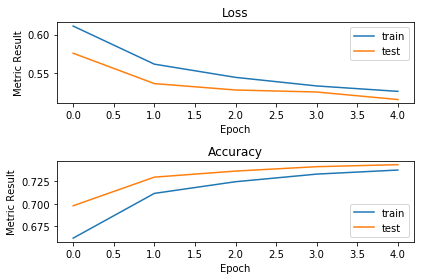

Nodes: 250
Activation: relu
Score: 0.8289257997512385
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 225s 100us/step - loss: 0.6143 - acc: 0.6611 - val_loss: 0.5728 - val_acc: 0.7024
Epoch 2/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5598 - acc: 0.7125 - val_loss: 0.5332 - val_acc: 0.7302
Epoch 3/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5401 - acc: 0.7273 - val_loss: 0.5196 - val_acc: 0.7380
Epoch 4/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5288 - acc: 0.7355 - val_loss: 0.5116 - val_acc: 0.7456
Epoch 5/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5225 - acc: 0.7402 - val_loss: 0.5330 - val_acc: 0.7438


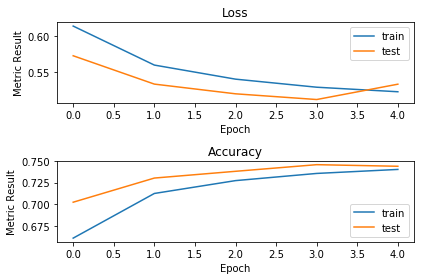

Nodes: 250
Activation: relu
Score: 0.8309111569026926
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 230s 102us/step - loss: 0.6166 - acc: 0.6599 - val_loss: 0.5647 - val_acc: 0.7059
Epoch 2/5
2250000/2250000 [==============================] - 186s 83us/step - loss: 0.5585 - acc: 0.7133 - val_loss: 0.5312 - val_acc: 0.7308
Epoch 3/5
2250000/2250000 [==============================] - 186s 83us/step - loss: 0.5384 - acc: 0.7283 - val_loss: 0.5181 - val_acc: 0.7398
Epoch 4/5
2250000/2250000 [==============================] - 186s 83us/step - loss: 0.5299 - acc: 0.7348 - val_loss: 0.5121 - val_acc: 0.7459
Epoch 5/5
2250000/2250000 [==============================] - 187s 83us/step - loss: 0.5221 - acc: 0.7404 - val_loss: 0.5125 - val_acc: 0.7495


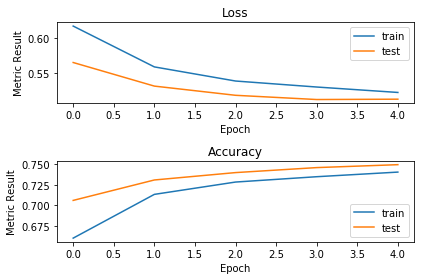

Nodes: 250
Activation: relu
Score: 0.8335267381193638
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 236s 105us/step - loss: 0.6194 - acc: 0.6540 - val_loss: 0.5663 - val_acc: 0.7042
Epoch 2/5
2250000/2250000 [==============================] - 203s 90us/step - loss: 0.5650 - acc: 0.7084 - val_loss: 0.5676 - val_acc: 0.7130
Epoch 3/5
2250000/2250000 [==============================] - 203s 90us/step - loss: 0.5416 - acc: 0.7267 - val_loss: 0.5207 - val_acc: 0.7368
Epoch 4/5
2250000/2250000 [==============================] - 203s 90us/step - loss: 0.5324 - acc: 0.7330 - val_loss: 0.5144 - val_acc: 0.7435
Epoch 5/5
2250000/2250000 [==============================] - 203s 90us/step - loss: 0.5259 - acc: 0.7376 - val_loss: 0.5088 - val_acc: 0.7455


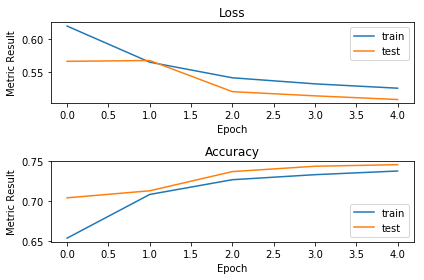

Nodes: 250
Activation: relu
Score: 0.8297210352991704
{'Node': 250, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Batch': 10000, 'Score': 0.8335267381193638}



In [23]:
bestResult = {}
bestScore = -1

nodes = [250]
activate = 'relu'
optimize = 'Adadelta'
batchSize = [500, 1000, 10000, 100000]


for size in batchSize:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Optimization'] = optimize
            bestResult['Batch'] = size
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 237s 105us/step - loss: 0.6170 - acc: 0.6600 - val_loss: 0.5769 - val_acc: 0.6959
Epoch 2/5
2250000/2250000 [==============================] - 194s 86us/step - loss: 0.5647 - acc: 0.7089 - val_loss: 0.5415 - val_acc: 0.7250
Epoch 3/5
2250000/2250000 [==============================] - 194s 86us/step - loss: 0.5437 - acc: 0.7254 - val_loss: 0.5203 - val_acc: 0.7368
Epoch 4/5
2250000/2250000 [==============================] - 194s 86us/step - loss: 0.5331 - acc: 0.7325 - val_loss: 0.5183 - val_acc: 0.7439
Epoch 5/5
2250000/2250000 [==============================] - 194s 86us/step - loss: 0.5271 - acc: 0.7374 - val_loss: 0.5198 - val_acc: 0.7428


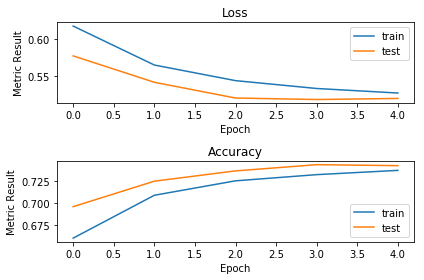

Nodes: 250
Activation: relu
Score: 0.8253860249689071
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 241s 107us/step - loss: 0.6169 - acc: 0.6573 - val_loss: 0.5644 - val_acc: 0.7048
Epoch 2/5
2250000/2250000 [==============================] - 205s 91us/step - loss: 0.5624 - acc: 0.7103 - val_loss: 0.5383 - val_acc: 0.7253
Epoch 3/5
2250000/2250000 [==============================] - 205s 91us/step - loss: 0.5419 - acc: 0.7261 - val_loss: 0.5230 - val_acc: 0.7394
Epoch 4/5
2250000/2250000 [==============================] - 205s 91us/step - loss: 0.5307 - acc: 0.7341 - val_loss: 0.5165 - val_acc: 0.7444
Epoch 5/5
2250000/2250000 [==============================] - 205s 91us/step - loss: 0.5240 - acc: 0.7391 - val_loss: 0.5045 - val_acc: 0.7497


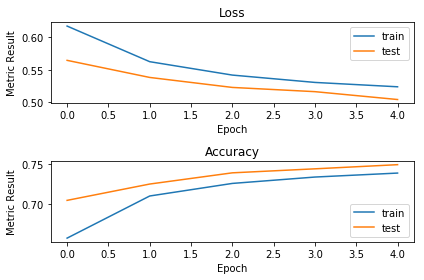

Nodes: 250
Activation: relu
Score: 0.8329545203357278
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 243s 108us/step - loss: 0.6124 - acc: 0.6609 - val_loss: 0.5657 - val_acc: 0.7044
Epoch 2/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5627 - acc: 0.7102 - val_loss: 0.5709 - val_acc: 0.7025
Epoch 3/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5435 - acc: 0.7247 - val_loss: 0.5217 - val_acc: 0.7386
Epoch 4/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5300 - acc: 0.7335 - val_loss: 0.5222 - val_acc: 0.7394
Epoch 5/5
2250000/2250000 [==============================] - 196s 87us/step - loss: 0.5236 - acc: 0.7388 - val_loss: 0.5360 - val_acc: 0.7280


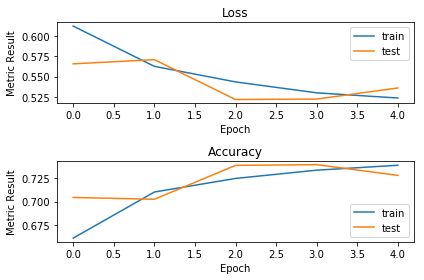

Nodes: 250
Activation: relu
Score: 0.8111590963528245
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 241s 107us/step - loss: 0.6185 - acc: 0.6578 - val_loss: 0.5660 - val_acc: 0.7070
Epoch 2/5
2250000/2250000 [==============================] - 212s 94us/step - loss: 0.5631 - acc: 0.7100 - val_loss: 0.5397 - val_acc: 0.7256
Epoch 3/5
2250000/2250000 [==============================] - 212s 94us/step - loss: 0.5426 - acc: 0.7258 - val_loss: 0.5338 - val_acc: 0.7310
Epoch 4/5
2250000/2250000 [==============================] - 212s 94us/step - loss: 0.5304 - acc: 0.7342 - val_loss: 0.5174 - val_acc: 0.7410
Epoch 5/5
2250000/2250000 [==============================] - 212s 94us/step - loss: 0.5239 - acc: 0.7386 - val_loss: 0.5068 - val_acc: 0.7480


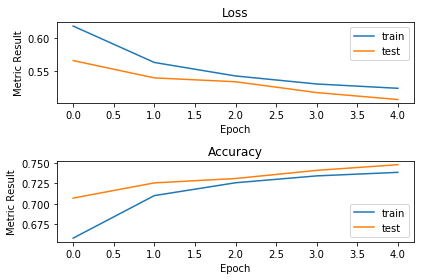

Nodes: 250
Activation: relu
Score: 0.8319007455338073
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 251s 112us/step - loss: 0.6123 - acc: 0.6619 - val_loss: 0.5602 - val_acc: 0.7093
Epoch 2/5
2250000/2250000 [==============================] - 201s 89us/step - loss: 0.5607 - acc: 0.7116 - val_loss: 0.5509 - val_acc: 0.7156
Epoch 3/5
2250000/2250000 [==============================] - 201s 89us/step - loss: 0.5421 - acc: 0.7261 - val_loss: 0.5241 - val_acc: 0.7390
Epoch 4/5
2250000/2250000 [==============================] - 201s 89us/step - loss: 0.5322 - acc: 0.7331 - val_loss: 0.5114 - val_acc: 0.7447
Epoch 5/5
2250000/2250000 [==============================] - 201s 89us/step - loss: 0.5246 - acc: 0.7385 - val_loss: 0.5111 - val_acc: 0.7453


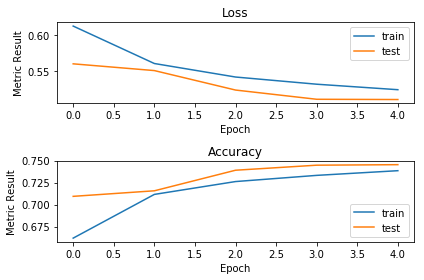

Nodes: 250
Activation: relu
Score: 0.8303245470012153
{'Node': 250, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Batch': 900, 'Score': 0.8329545203357278}



In [24]:
bestResult = {}
bestScore = -1

nodes = [250]
activate = 'relu'
optimize = 'Adadelta'
batchSize = [800, 900, 1000, 1100, 1200]


for size in batchSize:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Optimization'] = optimize
            bestResult['Batch'] = size
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 251s 111us/step - loss: 0.6165 - acc: 0.6571 - val_loss: 0.5635 - val_acc: 0.7075
Epoch 2/5
2250000/2250000 [==============================] - 217s 96us/step - loss: 0.5642 - acc: 0.7088 - val_loss: 0.5395 - val_acc: 0.7280
Epoch 3/5
2250000/2250000 [==============================] - 217s 96us/step - loss: 0.5445 - acc: 0.7240 - val_loss: 0.5207 - val_acc: 0.7383
Epoch 4/5
2250000/2250000 [==============================] - 216s 96us/step - loss: 0.5326 - acc: 0.7335 - val_loss: 0.5133 - val_acc: 0.7445
Epoch 5/5
2250000/2250000 [==============================] - 217s 96us/step - loss: 0.5257 - acc: 0.7380 - val_loss: 0.5148 - val_acc: 0.7450


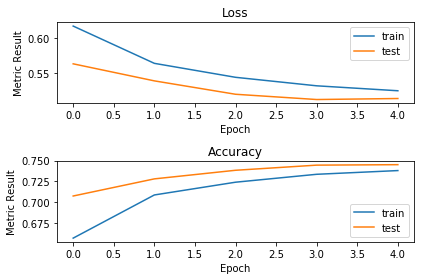

Nodes: 250
Activation: relu
Score: 0.8294910724209483
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 254s 113us/step - loss: 0.6126 - acc: 0.6614 - val_loss: 0.5585 - val_acc: 0.7100
Epoch 2/5
2250000/2250000 [==============================] - 209s 93us/step - loss: 0.5605 - acc: 0.7120 - val_loss: 0.5355 - val_acc: 0.7279
Epoch 3/5
2250000/2250000 [==============================] - 209s 93us/step - loss: 0.5420 - acc: 0.7265 - val_loss: 0.5209 - val_acc: 0.7395
Epoch 4/5
2250000/2250000 [==============================] - 209s 93us/step - loss: 0.5319 - acc: 0.7335 - val_loss: 0.5100 - val_acc: 0.7468
Epoch 5/5
2250000/2250000 [==============================] - 209s 93us/step - loss: 0.5245 - acc: 0.7388 - val_loss: 0.5109 - val_acc: 0.7474


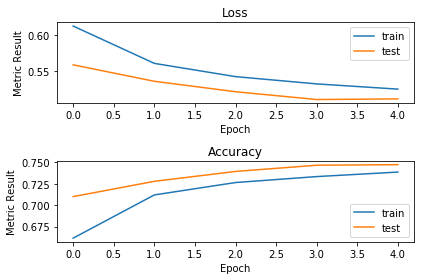

Nodes: 250
Activation: relu
Score: 0.8328804000101516
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 264s 118us/step - loss: 0.6121 - acc: 0.6638 - val_loss: 0.5750 - val_acc: 0.6988
Epoch 2/5
2250000/2250000 [==============================] - 219s 97us/step - loss: 0.5633 - acc: 0.7102 - val_loss: 0.5389 - val_acc: 0.7273
Epoch 3/5
2250000/2250000 [==============================] - 219s 97us/step - loss: 0.5437 - acc: 0.7251 - val_loss: 0.5217 - val_acc: 0.7390
Epoch 4/5
2250000/2250000 [==============================] - 219s 97us/step - loss: 0.5330 - acc: 0.7331 - val_loss: 0.5148 - val_acc: 0.7439
Epoch 5/5
2250000/2250000 [==============================] - 220s 98us/step - loss: 0.5255 - acc: 0.7383 - val_loss: 0.5393 - val_acc: 0.7265


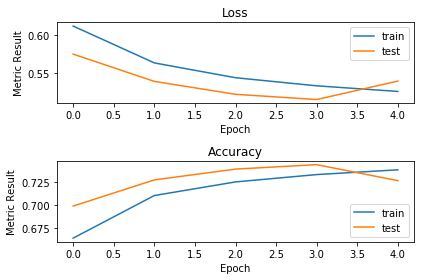

Nodes: 250
Activation: relu
Score: 0.8133953408965452
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 257s 114us/step - loss: 0.6131 - acc: 0.6620 - val_loss: 0.5654 - val_acc: 0.7065
Epoch 2/5
2250000/2250000 [==============================] - 221s 98us/step - loss: 0.5649 - acc: 0.7090 - val_loss: 0.5398 - val_acc: 0.7269
Epoch 3/5
2250000/2250000 [==============================] - 221s 98us/step - loss: 0.5440 - acc: 0.7245 - val_loss: 0.5363 - val_acc: 0.7294
Epoch 4/5
2250000/2250000 [==============================] - 221s 98us/step - loss: 0.5313 - acc: 0.7334 - val_loss: 0.5200 - val_acc: 0.7398
Epoch 5/5
2250000/2250000 [==============================] - 221s 98us/step - loss: 0.5248 - acc: 0.7383 - val_loss: 0.5045 - val_acc: 0.7492


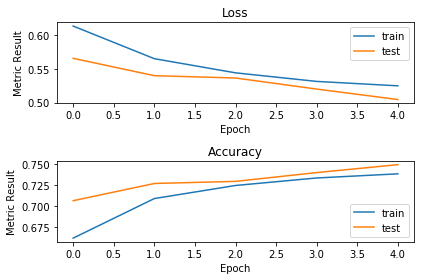

Nodes: 250
Activation: relu
Score: 0.833145686335207
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 270s 120us/step - loss: 0.6201 - acc: 0.6569 - val_loss: 0.5628 - val_acc: 0.7093
Epoch 2/5
2250000/2250000 [==============================] - 222s 99us/step - loss: 0.5618 - acc: 0.7113 - val_loss: 0.5344 - val_acc: 0.7273
Epoch 3/5
2250000/2250000 [==============================] - 222s 99us/step - loss: 0.5416 - acc: 0.7263 - val_loss: 0.5218 - val_acc: 0.7407
Epoch 4/5
2250000/2250000 [==============================] - 222s 99us/step - loss: 0.5327 - acc: 0.7332 - val_loss: 0.5482 - val_acc: 0.7184
Epoch 5/5
2250000/2250000 [==============================] - 222s 99us/step - loss: 0.5254 - acc: 0.7380 - val_loss: 0.5121 - val_acc: 0.7465


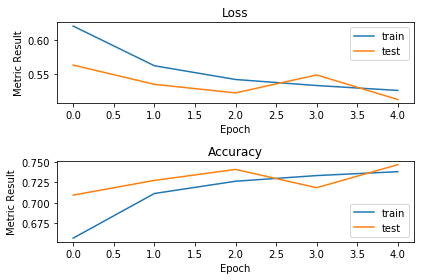

Nodes: 250
Activation: relu
Score: 0.8296769626636418
{'Node': 250, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Batch': 800, 'Score': 0.833145686335207}



In [25]:
bestResult = {}
bestScore = -1

nodes = [250]
activate = 'relu'
optimize = 'Adadelta'
batchSize = [600, 700, 750, 800, 850]


for size in batchSize:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer='uniform'))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Optimization'] = optimize
            bestResult['Batch'] = size
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 267s 119us/step - loss: 0.6168 - acc: 0.6632 - val_loss: 0.5599 - val_acc: 0.7123
Epoch 2/5
2250000/2250000 [==============================] - 220s 98us/step - loss: 0.5564 - acc: 0.7154 - val_loss: 0.6081 - val_acc: 0.6826
Epoch 3/5
2250000/2250000 [==============================] - 220s 98us/step - loss: 0.5399 - acc: 0.7275 - val_loss: 0.5226 - val_acc: 0.7395
Epoch 4/5
2250000/2250000 [==============================] - 220s 98us/step - loss: 0.5297 - acc: 0.7348 - val_loss: 0.5124 - val_acc: 0.7459
Epoch 5/5
2250000/2250000 [==============================] - 220s 98us/step - loss: 0.5241 - acc: 0.7387 - val_loss: 0.5300 - val_acc: 0.7370


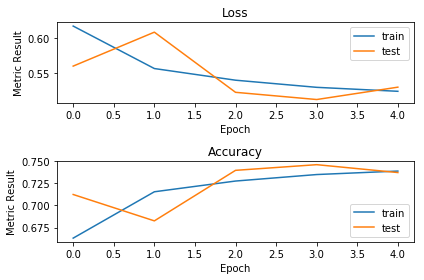

Nodes: 250
Activation: relu
Score: 0.8306393768235516
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 271s 120us/step - loss: 0.6154 - acc: 0.6590 - val_loss: 0.5685 - val_acc: 0.7041
Epoch 2/5
2250000/2250000 [==============================] - 228s 102us/step - loss: 0.5630 - acc: 0.7097 - val_loss: 0.5517 - val_acc: 0.7163
Epoch 3/5
2250000/2250000 [==============================] - 228s 102us/step - loss: 0.5439 - acc: 0.7244 - val_loss: 0.5225 - val_acc: 0.7371
Epoch 4/5
2250000/2250000 [==============================] - 228s 101us/step - loss: 0.5316 - acc: 0.7333 - val_loss: 0.5304 - val_acc: 0.7325
Epoch 5/5
2250000/2250000 [==============================] - 228s 101us/step - loss: 0.5250 - acc: 0.7384 - val_loss: 0.5087 - val_acc: 0.7479


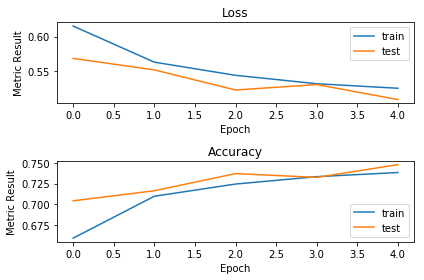

Nodes: 250
Activation: relu
Score: 0.8331553697336187
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 269s 120us/step - loss: 0.6422 - acc: 0.6520 - val_loss: 0.5719 - val_acc: 0.7038
Epoch 2/5
2250000/2250000 [==============================] - 231s 103us/step - loss: 0.5648 - acc: 0.7092 - val_loss: 0.5371 - val_acc: 0.7278
Epoch 3/5
2250000/2250000 [==============================] - 228s 102us/step - loss: 0.5454 - acc: 0.7244 - val_loss: 0.5303 - val_acc: 0.7377
Epoch 4/5
2250000/2250000 [==============================] - 228s 101us/step - loss: 0.5370 - acc: 0.7309 - val_loss: 0.5234 - val_acc: 0.7379
Epoch 5/5
2250000/2250000 [==============================] - 228s 101us/step - loss: 0.5293 - acc: 0.7366 - val_loss: 0.5149 - val_acc: 0.7455


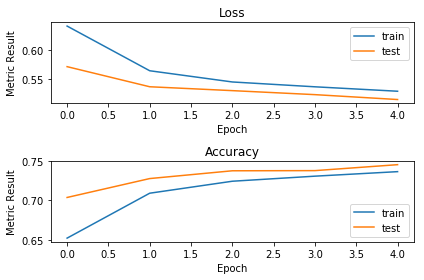

Nodes: 250
Activation: relu
Score: 0.8304468774141494
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 278s 124us/step - loss: 0.7691 - acc: 0.6436 - val_loss: 0.5627 - val_acc: 0.7092
Epoch 2/5
2250000/2250000 [==============================] - 232s 103us/step - loss: 0.5619 - acc: 0.7116 - val_loss: 0.5337 - val_acc: 0.7302
Epoch 3/5
2250000/2250000 [==============================] - 233s 103us/step - loss: 0.5429 - acc: 0.7267 - val_loss: 0.5251 - val_acc: 0.7386
Epoch 4/5
2250000/2250000 [==============================] - 232s 103us/step - loss: 0.5338 - acc: 0.7333 - val_loss: 0.5149 - val_acc: 0.7423
Epoch 5/5
2250000/2250000 [==============================] - 232s 103us/step - loss: 0.5270 - acc: 0.7385 - val_loss: 0.5234 - val_acc: 0.7378


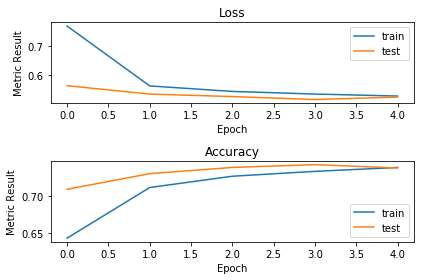

Nodes: 250
Activation: relu
Score: 0.8180229877748689
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 274s 122us/step - loss: 0.6252 - acc: 0.6578 - val_loss: 0.5635 - val_acc: 0.7060
Epoch 2/5
2250000/2250000 [==============================] - 234s 104us/step - loss: 0.5645 - acc: 0.7098 - val_loss: 0.5517 - val_acc: 0.7219
Epoch 3/5
2250000/2250000 [==============================] - 234s 104us/step - loss: 0.5457 - acc: 0.7248 - val_loss: 0.5296 - val_acc: 0.7337
Epoch 4/5
2250000/2250000 [==============================] - 234s 104us/step - loss: 0.5358 - acc: 0.7313 - val_loss: 0.5165 - val_acc: 0.7421
Epoch 5/5
2250000/2250000 [==============================] - 233s 104us/step - loss: 0.5279 - acc: 0.7367 - val_loss: 0.5153 - val_acc: 0.7447


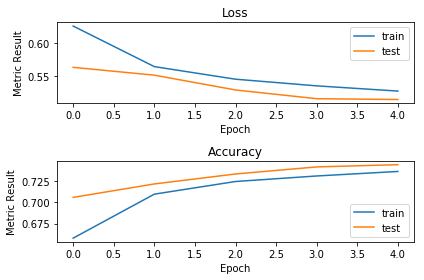

Nodes: 250
Activation: relu
Score: 0.8276619205314728
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 282s 125us/step - loss: 0.6168 - acc: 0.6593 - val_loss: 0.5653 - val_acc: 0.7052
Epoch 2/5
2250000/2250000 [==============================] - 237s 105us/step - loss: 0.5604 - acc: 0.7125 - val_loss: 0.5404 - val_acc: 0.7286
Epoch 3/5
2250000/2250000 [==============================] - 237s 105us/step - loss: 0.5415 - acc: 0.7270 - val_loss: 0.5237 - val_acc: 0.7361
Epoch 4/5
2250000/2250000 [==============================] - 237s 105us/step - loss: 0.5329 - acc: 0.7336 - val_loss: 0.5154 - val_acc: 0.7412
Epoch 5/5
2250000/2250000 [==============================] - 237s 105us/step - loss: 0.5254 - acc: 0.7380 - val_loss: 0.5076 - val_acc: 0.7484


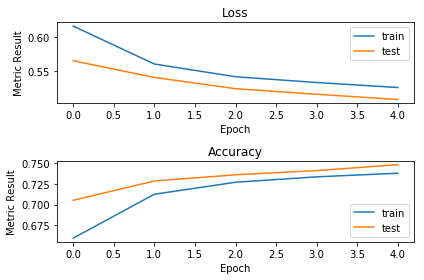

Nodes: 250
Activation: relu
Score: 0.8328084109089382
Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 288s 128us/step - loss: 0.6136 - acc: 0.6631 - val_loss: 0.5641 - val_acc: 0.7075
Epoch 2/5
2250000/2250000 [==============================] - 238s 106us/step - loss: 0.5637 - acc: 0.7098 - val_loss: 0.5398 - val_acc: 0.7244
Epoch 3/5
2250000/2250000 [==============================] - 239s 106us/step - loss: 0.5417 - acc: 0.7262 - val_loss: 0.5239 - val_acc: 0.7377
Epoch 4/5
2250000/2250000 [==============================] - 239s 106us/step - loss: 0.5295 - acc: 0.7352 - val_loss: 0.5179 - val_acc: 0.7416
Epoch 5/5
2250000/2250000 [==============================] - 238s 106us/step - loss: 0.5234 - acc: 0.7392 - val_loss: 0.5065 - val_acc: 0.7482


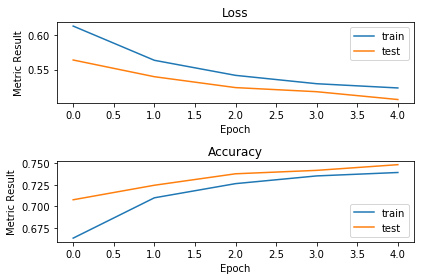

Nodes: 250
Activation: relu
Score: 0.8322886400230547
{'Node': 250, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Batch': 800, 'Initialization': 'random_uniform', 'Score': 0.8331553697336187}



In [26]:
bestResult = {}
bestScore = -1

nodes = [250]
activate = 'relu'
optimize = 'Adadelta'
batchSize = 800
initializers = ['random_normal', 'random_uniform', 'VarianceScaling', 'lecun_normal',
                'lecun_uniform', 'glorot_normal', 'glorot_uniform']

for initiate in initializers:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Optimization'] = optimize
            bestResult['Batch'] = batchSize
            bestResult['Initialization'] = initiate
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/5
2250000/2250000 [==============================] - 271s 120us/step - loss: 0.6131 - acc: 0.6638 - val_loss: 0.5609 - val_acc: 0.7064
Epoch 2/5
2250000/2250000 [==============================] - 214s 95us/step - loss: 0.5582 - acc: 0.7139 - val_loss: 0.5311 - val_acc: 0.7322
Epoch 3/5
2250000/2250000 [==============================] - 214s 95us/step - loss: 0.5389 - acc: 0.7282 - val_loss: 0.5156 - val_acc: 0.7414
Epoch 4/5
2250000/2250000 [==============================] - 214s 95us/step - loss: 0.5280 - acc: 0.7360 - val_loss: 0.5112 - val_acc: 0.7461
Epoch 5/5
2250000/2250000 [==============================] - 214s 95us/step - loss: 0.5226 - acc: 0.7402 - val_loss: 0.5124 - val_acc: 0.7454


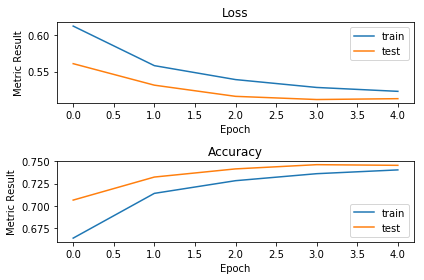

Nodes: 250
Activation: relu
Score: 0.8275444632154682
{'Node': 250, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Batch': 800, 'Initialization': 'glorot_uniform', 'Score': 0.8275444632154682}



In [27]:
bestResult = {}
bestScore = -1

nodes = [250]
activate = 'relu'
optimize = 'Adadelta'
batchSize = 800
initiate = 'glorot_uniform'


with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
    model.add(Dense(node, activation=activate, kernel_initializer=initiate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate, kernel_initializer=initiate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate, kernel_initializer=initiate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate, kernel_initializer=initiate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate, kernel_initializer=initiate))
    model.add(Dense(1))

    model = multi_gpu_model(model, gpus=2)
    model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

    history = model.fit(x, y, epochs=5, batch_size=1000, validation_split=.1)
        
    plotMetric(history)

    score = roc_auc_score(y_test,model.predict(x_test))

    print(f"Nodes: {node}")
    print(f"Activation: {activate}")
    print(f"Score: {score}")

    if score > bestScore:
        bestResult['Node'] = node
        bestResult['Activation'] = activate
        bestResult['Optimization'] = optimize
        bestResult['Batch'] = batchSize
        bestResult['Initialization'] = initiate
        bestResult['Score'] = score

        bestScore = score

print(f"{bestResult}\n")

Train on 2250000 samples, validate on 250000 samples
Epoch 1/10
2250000/2250000 [==============================] - 284s 126us/step - loss: 0.6179 - acc: 0.6591 - val_loss: 0.5682 - val_acc: 0.7047
Epoch 2/10
2250000/2250000 [==============================] - 238s 106us/step - loss: 0.5599 - acc: 0.7129 - val_loss: 0.5402 - val_acc: 0.7254
Epoch 3/10
2250000/2250000 [==============================] - 242s 108us/step - loss: 0.5404 - acc: 0.7276 - val_loss: 0.5199 - val_acc: 0.7391
Epoch 4/10
2250000/2250000 [==============================] - 240s 107us/step - loss: 0.5290 - acc: 0.7355 - val_loss: 0.5126 - val_acc: 0.7447
Epoch 5/10
2250000/2250000 [==============================] - 241s 107us/step - loss: 0.5226 - acc: 0.7402 - val_loss: 0.5168 - val_acc: 0.7461
Epoch 6/10
2250000/2250000 [==============================] - 245s 109us/step - loss: 0.5190 - acc: 0.7430 - val_loss: 0.5090 - val_acc: 0.7491
Epoch 7/10
2250000/2250000 [==============================] - 244s 108us/step - los

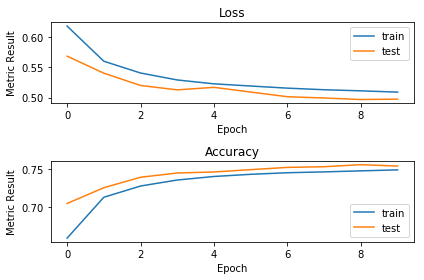

Nodes: 250
Activation: relu
Score: 0.8396029560487981
Train on 2250000 samples, validate on 250000 samples
Epoch 1/15
2250000/2250000 [==============================] - 291s 129us/step - loss: 0.6144 - acc: 0.6622 - val_loss: 0.5694 - val_acc: 0.7028
Epoch 2/15
2250000/2250000 [==============================] - 234s 104us/step - loss: 0.5555 - acc: 0.7158 - val_loss: 0.5292 - val_acc: 0.7338
Epoch 3/15
2250000/2250000 [==============================] - 238s 106us/step - loss: 0.5371 - acc: 0.7299 - val_loss: 0.5175 - val_acc: 0.7408
Epoch 4/15
2250000/2250000 [==============================] - 236s 105us/step - loss: 0.5285 - acc: 0.7356 - val_loss: 0.5190 - val_acc: 0.7400
Epoch 5/15
2250000/2250000 [==============================] - 236s 105us/step - loss: 0.5230 - acc: 0.7400 - val_loss: 0.5144 - val_acc: 0.7457
Epoch 6/15
2250000/2250000 [==============================] - 236s 105us/step - loss: 0.5184 - acc: 0.7428 - val_loss: 0.5064 - val_acc: 0.7513
Epoch 7/15
2250000/2250000 [=

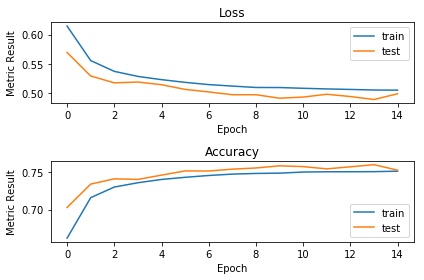

Nodes: 250
Activation: relu
Score: 0.8406557137539005
Train on 2250000 samples, validate on 250000 samples
Epoch 1/20
2250000/2250000 [==============================] - 305s 135us/step - loss: 0.6205 - acc: 0.6573 - val_loss: 0.5648 - val_acc: 0.7051
Epoch 2/20
2250000/2250000 [==============================] - 256s 114us/step - loss: 0.5586 - acc: 0.7134 - val_loss: 0.5297 - val_acc: 0.7323
Epoch 3/20
2250000/2250000 [==============================] - 253s 112us/step - loss: 0.5387 - acc: 0.7288 - val_loss: 0.5241 - val_acc: 0.7380
Epoch 4/20
2250000/2250000 [==============================] - 252s 112us/step - loss: 0.5310 - acc: 0.7342 - val_loss: 0.5221 - val_acc: 0.7383
Epoch 5/20
2250000/2250000 [==============================] - 252s 112us/step - loss: 0.5237 - acc: 0.7391 - val_loss: 0.5198 - val_acc: 0.7384
Epoch 6/20
2250000/2250000 [==============================] - 251s 112us/step - loss: 0.5187 - acc: 0.7425 - val_loss: 0.5045 - val_acc: 0.7500
Epoch 7/20
2250000/2250000 [=

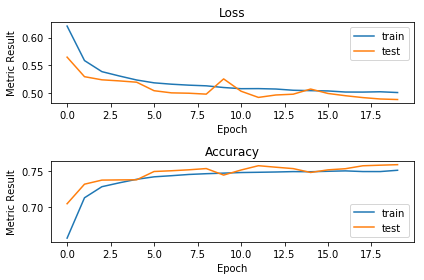

Nodes: 250
Activation: relu
Score: 0.8469696359567603
{'Node': 250, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Batch': 800, 'Initialization': 'glorot_uniform', 'Epochs': 20, 'Score': 0.8469696359567603}



In [28]:
bestResult = {}
bestScore = -1

nodes = [250]
activate = 'relu'
optimize = 'Adadelta'
batchSize = 800
initiate = 'glorot_uniform'
epochs = [10, 15, 20]

for epoch in epochs:
    with tf.device("/cpu:0"):
        model = Sequential()
        model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dropout(0.10))
        model.add(Dense(node, activation=activate))
        model.add(Dense(1))

        model = multi_gpu_model(model, gpus=2)
        model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

        history = model.fit(x, y, epochs=epoch, batch_size=1000, validation_split=.1)
        
        plotMetric(history)

        score = roc_auc_score(y_test,model.predict(x_test))

        print(f"Nodes: {node}")
        print(f"Activation: {activate}")
        print(f"Score: {score}")

        if score > bestScore:
            bestResult['Node'] = node
            bestResult['Activation'] = activate
            bestResult['Optimization'] = optimize
            bestResult['Batch'] = batchSize
            bestResult['Initialization'] = initiate
            bestResult['Epochs'] = epoch
            bestResult['Score'] = score

            bestScore = score

print(f"{bestResult}\n")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 2250000 samples, validate on 250000 samples
Epoch 1/20
2250000/2250000 [==============================] - 20s 9us/step - loss: 0.6159 - acc: 0.6606 - val_loss: 0.5638 - val_acc: 0.7074
Epoch 2/20
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.5596 - acc: 0.7127 - val_loss: 0.5338 - val_acc: 0.7294
Epoch 3/20
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.5432 - acc: 0.7256 - val_loss: 0.5242 - val_acc: 0.7385
Epoch 4/20
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.5312 - acc: 0.7346 - val_loss: 0.5173 - val_acc: 0.7415
Epoch 5/20
2250000/2250000 [==============================] - 17s 8us/step - loss: 0.5242 - acc: 0.7388 - val_loss: 0.5070 - val_acc: 0.7480
Epoch 6

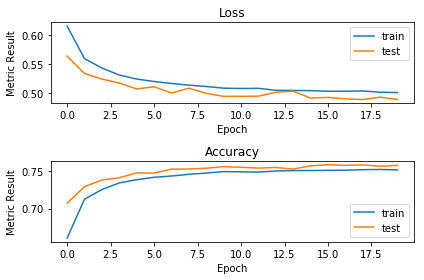

Nodes: 250
Activation: relu
Score: 0.8472317874540709
{'Node': 250, 'Activation': 'relu', 'Optimization': 'Adadelta', 'Batch': 800, 'Initialization': 'glorot_uniform', 'Epochs': 20, 'Score': 0.8472317874540709}



In [4]:
bestResult = {}
bestScore = -1

node = 250
activate = 'relu'
optimize = 'Adadelta'
batchSize = 800
initiate = 'glorot_uniform'
epoch = 20

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Dense(node, input_dim=x.shape[1], kernel_initializer=initiate))
    model.add(Dense(node, activation=activate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate))
    model.add(Dropout(0.10))
    model.add(Dense(node, activation=activate))
    model.add(Dense(1))

    model = multi_gpu_model(model, gpus=2)
    model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer=optimize)

    history = model.fit(x, y, epochs=epoch, batch_size=1000, validation_split=.1)
        
    plotMetric(history)

    score = roc_auc_score(y_test,model.predict(x_test))

    print(f"Nodes: {node}")
    print(f"Activation: {activate}")
    print(f"Score: {score}")

    if score > bestScore:
        bestResult['Node'] = node
        bestResult['Activation'] = activate
        bestResult['Optimization'] = optimize
        bestResult['Batch'] = batchSize
        bestResult['Initialization'] = initiate
        bestResult['Epochs'] = epoch
        bestResult['Score'] = score

        bestScore = score

print(f"{bestResult}\n")